# Chronic Kidney Disease Analysis and Prediction

### Reading the dataset

##### Data Dictionary
1. age - age
2. bp - blood pressure
3. sg - specific gravity
4. al - albumin
5. su - sugar
6. rbc - red blood cells
7. pc - pus cell
8. pcc - pus cell clumps
9. ba - bacteria
10. bgr - blood glucose random
11. bu - blood urea
12. sc - serum creatinine
13. sod - sodium
14. pot - potassium
15. hemo - hemoglobin
16. pcv - packed cell volume
17. wc - white blood cell count
18. rc - red blood cell count
19. htn - hypertension
20. dm - diabetes mellitus
21. cad - coronary artery disease
22. appet - appetite
23. pe - pedal edema
24. ane - anemia
25. classification - class (ckd , notckd)



<a id="1"></a>
# Import packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
# Import data

In [2]:
df_orig = pd.read_csv('/content/kidney_disease.csv')

In [3]:
df_orig.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
df_orig.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
df_orig.shape

(400, 26)

In [7]:
(df_orig.isnull().sum() / df_orig.shape[0] * 100.00).round(2)

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [8]:
df_orig.shape

(400, 26)

<a id="3"></a>
# Data Cleaning

## Transform column names

In [9]:
df_orig.drop('id', axis = 1, inplace = True)
df_orig.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [10]:
df_orig.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


## Analyze categorical columns

In [11]:
df_orig['packed_cell_volume'] = pd.to_numeric(df_orig['packed_cell_volume'], errors='coerce')
df_orig['white_blood_cell_count'] = pd.to_numeric(df_orig['white_blood_cell_count'], errors='coerce')
df_orig['red_blood_cell_count'] = pd.to_numeric(df_orig['red_blood_cell_count'], errors='coerce')

In [12]:
cat_col=[col for col in df_orig.columns if df_orig[col].dtype=='object']
for col in cat_col:
    print('{} has {} values '.format(col,df_orig[col].unique()))
    print('\n')

red_blood_cells has [nan 'normal' 'abnormal'] values 


pus_cell has ['normal' 'abnormal' nan] values 


pus_cell_clumps has ['notpresent' 'present' nan] values 


bacteria has ['notpresent' 'present' nan] values 


hypertension has ['yes' 'no' nan] values 


diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 


coronary_artery_disease has ['no' 'yes' '\tno' nan] values 


appetite has ['good' 'poor' nan] values 


peda_edema has ['no' 'yes' nan] values 


aanemia has ['no' 'yes' nan] values 


class has ['ckd' 'ckd\t' 'notckd'] values 




In [13]:
df_orig['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df_orig['coronary_artery_disease'] = df_orig['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df_orig['class'] = df_orig['class'].replace(to_replace = 'ckd\t', value = 'ckd')

df_orig['class'] = df_orig['class'].replace(to_replace = 'notckd', value = 'not ckd')


for col in cat_col:
    print('{} has {} values  '.format(col, df_orig[col].unique()))
    print('\n')

red_blood_cells has [nan 'normal' 'abnormal'] values  


pus_cell has ['normal' 'abnormal' nan] values  


pus_cell_clumps has ['notpresent' 'present' nan] values  


bacteria has ['notpresent' 'present' nan] values  


hypertension has ['yes' 'no' nan] values  


diabetes_mellitus has ['yes' 'no' nan] values  


coronary_artery_disease has ['no' 'yes' nan] values  


appetite has ['good' 'poor' nan] values  


peda_edema has ['no' 'yes' nan] values  


aanemia has ['no' 'yes' nan] values  


class has ['ckd' 'not ckd'] values  




In [14]:
df_orig['class'] = df_orig['class'].map({'ckd': 0, 'not ckd': 1})
df_orig['class'] = pd.to_numeric(df_orig['class'], errors='coerce')
cat_cols = [col for col in df_orig.columns if df_orig[col].dtype == 'object']
for col in cat_cols:
    print(f"{col} has {df_orig[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values



In [15]:
categorical_cols = [col for col in df_orig.columns if df_orig[col].dtype == 'object']
numerical_cols = [col for col in df_orig.columns if df_orig[col].dtype != 'object']
numerical_cols = numerical_cols[:-1]
print(categorical_cols)
print(numerical_cols)

['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia']
['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


## Replace NaN values

1) replace nan with mode for categorical values and mean for numerical:

In [16]:
df_orig_1 = df_orig

def mean_value_imputation(feature):
    mean = df_orig[feature].mean()
    df_orig[feature] = df_orig[feature].fillna(mean)
    
    
for col in numerical_cols:
    mean_value_imputation(col)

In [17]:
def impute_mode(feature):
    mode = df_orig[feature].mode()[0]
    df_orig[feature] = df_orig[feature].fillna(mode)
    
for col in cat_cols:
    impute_mode(col)

In [18]:
(df_orig.isnull().sum() / df_orig.shape[0] * 100.00).round(2)

age                        0.0
blood_pressure             0.0
specific_gravity           0.0
albumin                    0.0
sugar                      0.0
red_blood_cells            0.0
pus_cell                   0.0
pus_cell_clumps            0.0
bacteria                   0.0
blood_glucose_random       0.0
blood_urea                 0.0
serum_creatinine           0.0
sodium                     0.0
potassium                  0.0
haemoglobin                0.0
packed_cell_volume         0.0
white_blood_cell_count     0.0
red_blood_cell_count       0.0
hypertension               0.0
diabetes_mellitus          0.0
coronary_artery_disease    0.0
appetite                   0.0
peda_edema                 0.0
aanemia                    0.0
class                      0.0
dtype: float64

2) use knn to replace nan values:

In [19]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=11)
imputer.fit_transform(df_orig_1[numerical_cols])

def impute_mode(feature):
    mode = df_orig_1[feature].mode()[0]
    df_orig_1[feature] = df_orig_1[feature].fillna(mode)
    
for col in categorical_cols:
    impute_mode(col)

In [20]:
(df_orig_1.isnull().sum() / df_orig_1.shape[0] * 100.00).round(2)

age                        0.0
blood_pressure             0.0
specific_gravity           0.0
albumin                    0.0
sugar                      0.0
red_blood_cells            0.0
pus_cell                   0.0
pus_cell_clumps            0.0
bacteria                   0.0
blood_glucose_random       0.0
blood_urea                 0.0
serum_creatinine           0.0
sodium                     0.0
potassium                  0.0
haemoglobin                0.0
packed_cell_volume         0.0
white_blood_cell_count     0.0
red_blood_cell_count       0.0
hypertension               0.0
diabetes_mellitus          0.0
coronary_artery_disease    0.0
appetite                   0.0
peda_edema                 0.0
aanemia                    0.0
class                      0.0
dtype: float64

Both methods work fine, but knn would be better for model accuracy.

<a id="4"></a>
# EDA

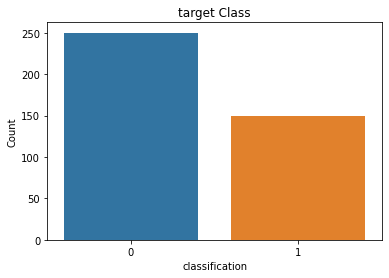

In [21]:
sns.countplot(x='class',data=df_orig)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()

In [22]:
# Percentage of values classified as ckd vs notckd

print('Percent of chronic kidney disease sample: ',round(len(df_orig[df_orig['class']=='ckd'])/len(df_orig['class'])*100,2),"%")
print('Percent of not a chronic kidney disease sample: ',round(len(df_orig[df_orig['class']=='notckd'])/len(df_orig['class'])*100,2),"%")

Percent of chronic kidney disease sample:  0.0 %
Percent of not a chronic kidney disease sample:  0.0 %


### Coorelation matrix

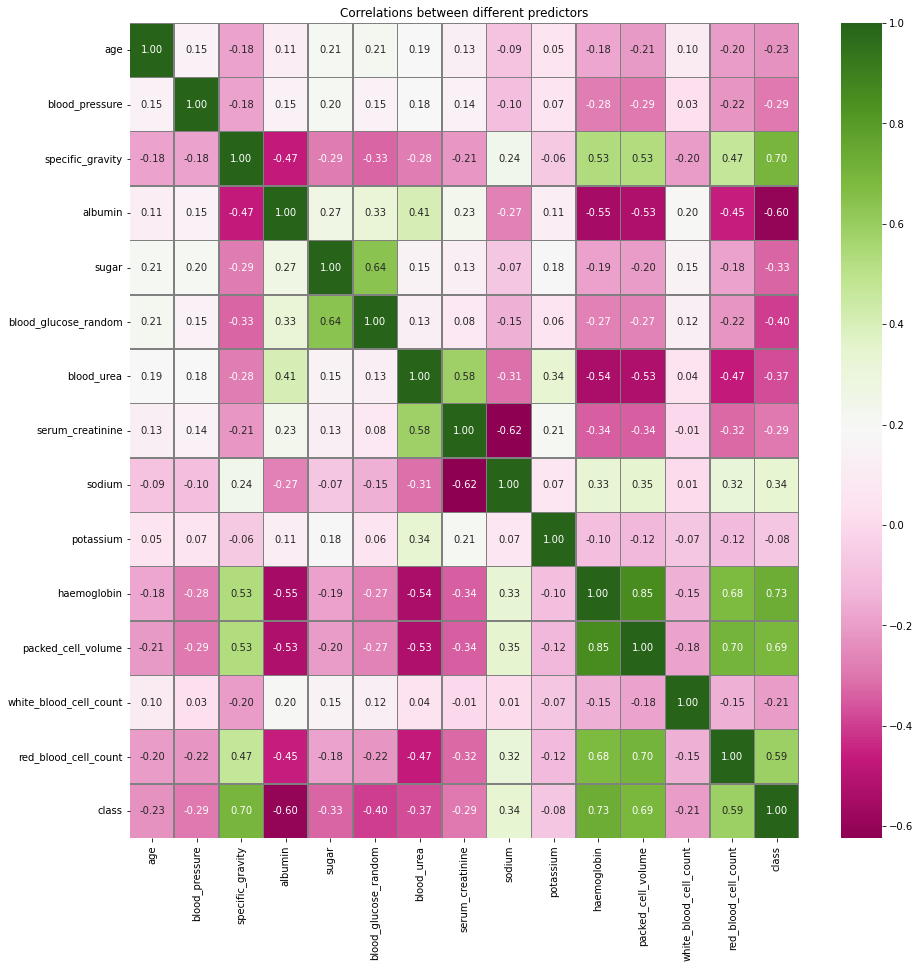

In [23]:
corr_df = df_orig.corr()
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="gray",cmap="PiYG")
plt.title('Correlations between different predictors')
plt.show()

## Positive Correlation
hemoglobin -> specific_gravity , sodium,  red_blood_cell_count<br>
serum creatinine -> albumin, blood urea <br>
blood_glucose_random -> sugar <br>



## Negative Correlation
albumin -> hemoglobin <br>
serum creatinine -> sodium <br>
blood_urea -> hemoglobin, red_blood_cell_count<br>

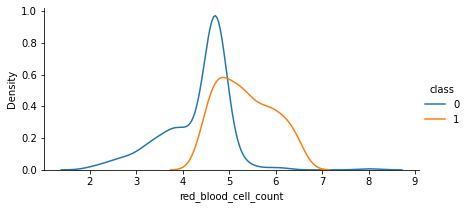

In [24]:
# KDE (Kernel density estimation) for visualizing distribution of observation
grid = sns.FacetGrid(df_orig, hue="class", aspect = 2)
grid.map(sns.kdeplot, 'red_blood_cell_count')
grid.add_legend()

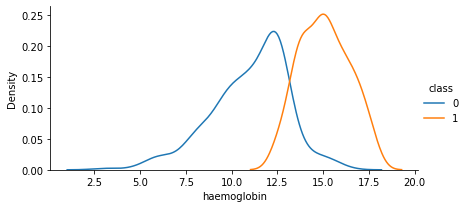

In [25]:
grid = sns.FacetGrid(df_orig, hue="class", aspect = 2)
grid.map(sns.kdeplot, 'haemoglobin')
grid.add_legend()

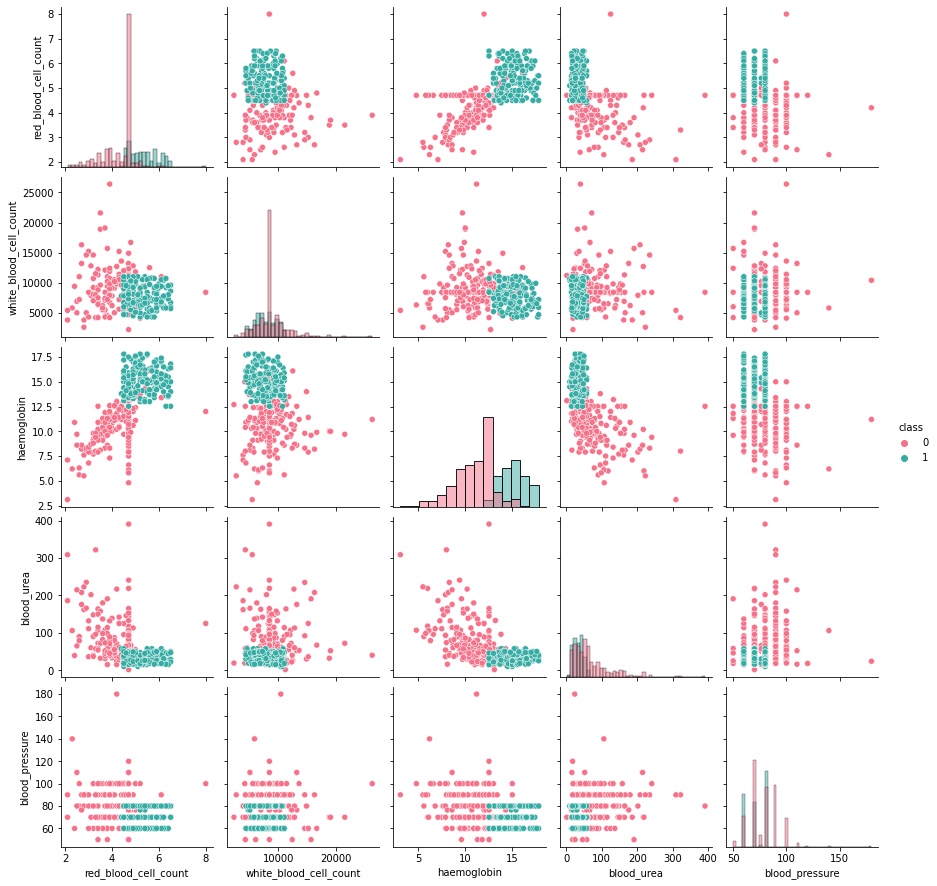

In [26]:
# Pairplot
req_columns = ['red_blood_cell_count','white_blood_cell_count','haemoglobin','class','blood_urea','blood_pressure']
sns.pairplot(df_orig[req_columns],diag_kind='hist',hue="class",palette='husl')
plt.show()

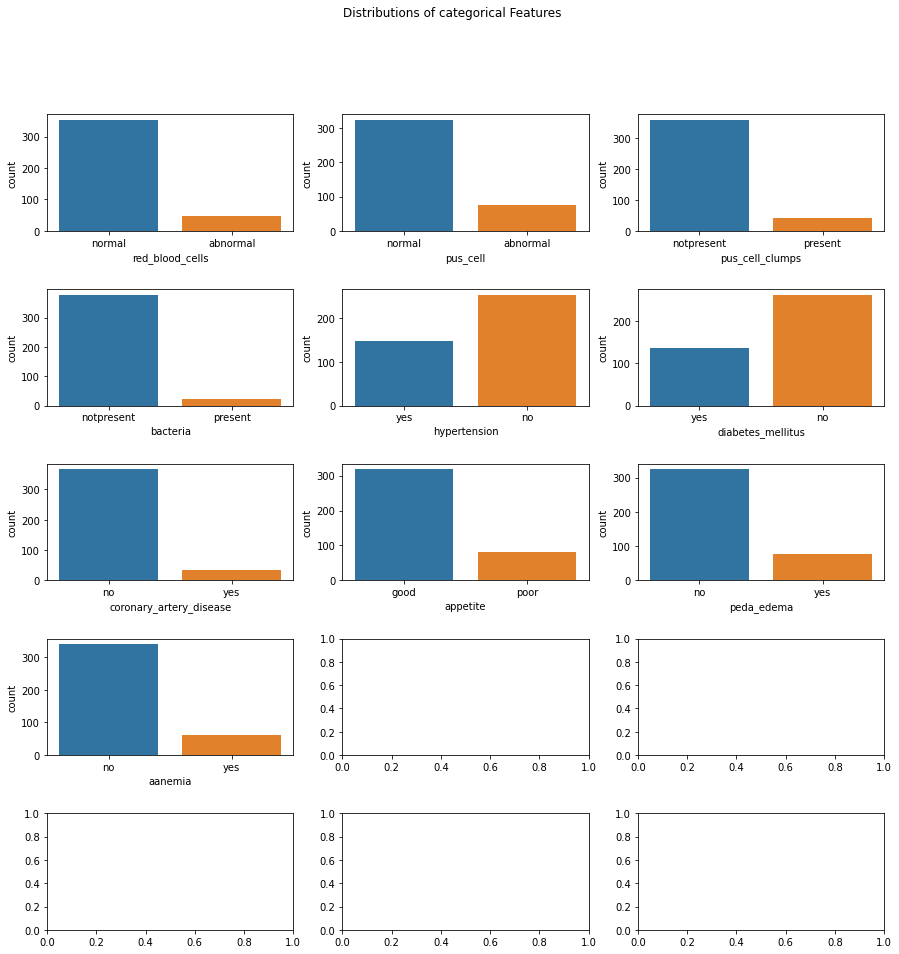

In [27]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of categorical Features')


for ax, feats in zip(axes.flatten(), categorical_cols):
    sns.countplot(df_orig[feats], ax=ax)

## Dealing with Outliers

In [28]:
import numpy as np
# IQR
def IQR_outliers(col):

    Q1 = np.percentile(df_orig[col], 25,
                       interpolation = 'midpoint')

    Q3 = np.percentile(df_orig[col], 75,
                       interpolation = 'midpoint')
    
    per_95 = np.percentile(df_orig[col], 95,
                       interpolation = 'midpoint')
    
    IQR = Q3 - Q1
    
    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR
    
    df_orig[col] = np.where(df_orig[col] > upper, per_95, df_orig[col])
    df_orig[col] = np.where(df_orig[col] < lower, lower, df_orig[col])

    return df_orig



for col in numerical_cols:
    df_orig = IQR_outliers(col)

### Check outliers

In [29]:
num_cols1 = numerical_cols[:-2]
fig = px.box(df_orig[num_cols1], y=num_cols1)
fig.show()

In [30]:
fig = px.box(df_orig['white_blood_cell_count'], y='white_blood_cell_count')
fig.show()

In [31]:
fig = px.box(df_orig['red_blood_cell_count'], y='red_blood_cell_count')
fig.show()

## Use LabelEncoder for categorical values

In [32]:
for col in cat_cols:
    print(f"{col} has {df_orig[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories



In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df_orig[col] = le.fit_transform(df_orig[col])

In [34]:
df_orig.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.0200,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,0,0,0,0
1,9.0,55.0,1.0200,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,0,0,0,0
2,62.0,80.0,1.0100,2.0,3.0,1,1,0,0,303.000000,...,31.0,7500.0,4.707435,0,1,0,1,0,1,0
3,48.0,70.0,1.0075,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,1,1,1,0
4,51.0,80.0,1.0100,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,0,0,0,0


In [35]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    int64  
 6   pus_cell                 400 non-null    int64  
 7   pus_cell_clumps          400 non-null    int64  
 8   bacteria                 400 non-null    int64  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

In [36]:
from sklearn.model_selection import train_test_split
df, df_test = train_test_split(df_orig, test_size = 0.15, random_state = 42)

## Split the train/test data

In [37]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

X_test = df_test[ind_col]
y_test = df_test[dep_col]

In [38]:
print(X.shape)
print(X_test.shape)

(340, 24)
(60, 24)


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.20, random_state = 0)

<a id="6"></a>
# Perform PCA on data

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=24)
principalComponents = pca.fit_transform(X_train)
print (pca.explained_variance_ratio_.cumsum())

[0.99815566 0.99945531 0.9998701  0.9999449  0.99997971 0.99999282
 0.99999755 0.99999867 0.99999914 0.99999943 0.99999959 0.99999968
 0.99999974 0.99999979 0.99999984 0.99999987 0.9999999  0.99999992
 0.99999995 0.99999996 0.99999998 0.99999999 1.         1.        ]


*The PCA did not improve model perfomance so I did not use it, n_components = 24 remains the best if we use it.*

In [41]:
pca.fit(X_train)
X_valid_new = pca.transform(X_valid)

In [42]:
#pca.fit(X_train)
X_train_new = pca.transform(X_train)

In [43]:
X_train_new.shape

(272, 24)

In [44]:
X_valid_new.shape

(68, 24)

In [45]:
print(X_valid_new)

[[-9.67724432e+02 -1.93592687e+01 -1.52994433e+01 ...  3.32811497e-02
   3.13587954e-02 -5.05382073e-03]
 [ 2.23206350e+03 -7.81216685e+01  2.08000382e+01 ... -5.94053545e-02
  -2.94029912e-01  6.15268299e-03]
 [ 1.33293973e+03  1.43274418e+02 -3.78953973e+01 ...  7.70050148e-02
  -4.25982031e-02 -2.94547634e-03]
 ...
 [ 9.32177776e+02 -4.15719528e+01 -2.54938204e+01 ...  2.61335867e-02
   4.79425610e-04 -8.07666544e-04]
 [ 1.63204649e+03 -7.54960477e+01  3.71971995e+00 ... -3.00288570e-03
  -2.79640518e-02 -7.44410095e-04]
 [ 1.43204022e+03 -8.28178977e+01 -5.56503546e-01 ... -2.21844603e-02
  -6.04133567e-02  1.78931981e-03]]


### KMeans Clustering

Let's check best k for kmeans clustering:

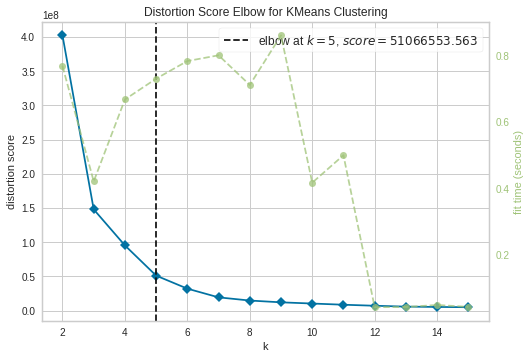

In [46]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KElbowVisualizer(KMeans(), k=15)
model.fit(X_train)
model.show()

In [47]:
from sklearn.cluster import KMeans
kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
)
X_clustered = kmeans.fit_transform(X_train)
                        
from sklearn.metrics import silhouette_score
score = silhouette_score(X_clustered, kmeans.labels_)
print(score)

0.670474305649468


# Modeling

<a id="7"></a>
# Build the Decision Tree model

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

dtc = DecisionTreeClassifier()
dtc.fit(X_train_new, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_valid, dtc.predict(X_valid_new))
dtc_acc_test = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train_new))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc_test} \n")
print(f"Validation Accuracy of Decision Tree Classifier is {accuracy_score(y_valid, dtc.predict(X_valid_new))}")

print(f"Confusion Matrix :- \n{confusion_matrix(y_valid, dtc.predict(X_valid_new))}\n")
print(f"Classification Report :- \n {classification_report(y_valid, dtc.predict(X_valid_new))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.6833333333333333 

Validation Accuracy of Decision Tree Classifier is 0.8235294117647058
Confusion Matrix :- 
[[26  3]
 [ 9 30]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.91      0.77      0.83        39

    accuracy                           0.82        68
   macro avg       0.83      0.83      0.82        68
weighted avg       0.84      0.82      0.82        68



<a id="9"></a>
# Feature Importance

                    feature  importance
1            blood_pressure    0.271274
5           red_blood_cells    0.261041
8                  bacteria    0.125436
2          specific_gravity    0.105514
7           pus_cell_clumps    0.105430
9      blood_glucose_random    0.033282
21                 appetite    0.031006
23                  aanemia    0.030695
12                   sodium    0.015895
10               blood_urea    0.015459
13                potassium    0.004968
6                  pus_cell    0.000000
11         serum_creatinine    0.000000
4                     sugar    0.000000
14              haemoglobin    0.000000
15       packed_cell_volume    0.000000
16   white_blood_cell_count    0.000000
17     red_blood_cell_count    0.000000
18             hypertension    0.000000
19        diabetes_mellitus    0.000000
20  coronary_artery_disease    0.000000
3                   albumin    0.000000
22               peda_edema    0.000000
0                       age    0.000000


Text(0.5, 1.0, 'Feature Importance')

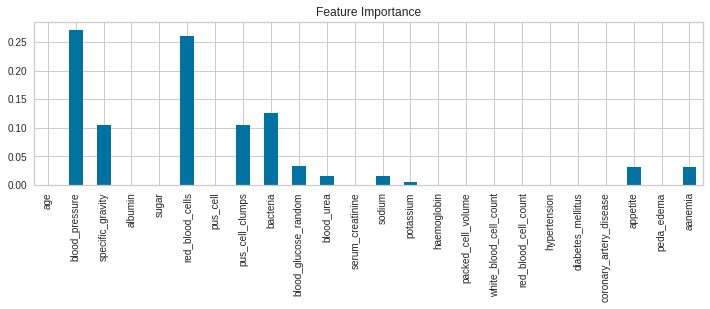

In [49]:
plt.figure(figsize=(12,3))
features = X_test.columns.values.tolist()
importance = dtc.feature_importances_.tolist()
ft_imp = pd.DataFrame()
ft_imp['feature'] = features
ft_imp['importance'] = importance
ft_imp.sort_values(by=['importance'], ascending = False, inplace=True)
print(ft_imp)
feature_series = pd.Series(data=importance,index=features)
feature_series.plot.bar()
plt.title('Feature Importance')

<a id="10"></a>
# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 7, n_estimators = 12)
rd_clf.fit(X_train_new, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_valid, rd_clf.predict(X_valid_new))
rd_clf_acc_test = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train_new))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc_test} \n")
print(f"Validation Accuracy of Random Forest Classifier is {accuracy_score(y_valid, rd_clf.predict(X_valid_new))}")

print(f"Confusion Matrix :- \n{confusion_matrix(y_valid, rd_clf.predict(X_valid_new))}\n")
print(f"Classification Report :- \n {classification_report(y_valid, rd_clf.predict(X_valid_new))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.6833333333333333 

Validation Accuracy of Random Forest Classifier is 0.9705882352941176
Confusion Matrix :- 
[[29  0]
 [ 2 37]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       1.00      0.95      0.97        39

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68



<a id="11"></a>
# XGBoost

In [51]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train_new, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_valid, xgb.predict(X_valid_new))


print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train_new))}")
print(f"Validation Accuracy of XgBoost is {accuracy_score(y_valid, xgb.predict(X_valid_new))} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_valid, xgb.predict(X_valid_new))}\n")
print(f"Classification Report :- \n {classification_report(y_valid, xgb.predict(X_valid_new))}")

Training Accuracy of XgBoost is 1.0
Validation Accuracy of XgBoost is 0.9558823529411765 

Confusion Matrix :- 
[[29  0]
 [ 3 36]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        29
           1       1.00      0.92      0.96        39

    accuracy                           0.96        68
   macro avg       0.95      0.96      0.96        68
weighted avg       0.96      0.96      0.96        68



<a id="12"></a>
# TabNet

In [ ]:
!pip install pytorch-tabnet

In [ ]:
!pip install optuna

In [54]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import KFold
import torch as torch
import optuna
from optuna import Trial

In [55]:
EPOCHS = 30
BATCH_SIZE = 32

def objective(trial):
    # parameter set by optuna
    N_D = trial.suggest_int('N_D', 8, 32)
    N_A = N_D
    GAMMA = trial.suggest_float('GAMMA', 1.0, 2.0)
    N_STEPS = trial.suggest_int('N_STEPS', 1, 3, 1)
    LAMBDA_SPARSE = trial.suggest_loguniform("LAMBDA_SPARSE", 1e-5, 1e-1)
    
    # changes
    # introduced lambda-sparse
    clf = TabNetClassifier(
                       optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":4,
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='sparsemax',
                          n_d = N_D,
                          n_a = N_A,
                          gamma = GAMMA,
                          n_steps = N_STEPS,
                          lambda_sparse = LAMBDA_SPARSE)
    
    clf.fit(X_train_new, y_train,
        eval_set=[(X_train_new, y_train),(X_valid_new, y_valid)],
        max_epochs = EPOCHS,
        batch_size = BATCH_SIZE,
        patience = 5,
        eval_name=['train', 'valid'],
        eval_metric=['auc']
           )
    
    # changed, now score is max val_uac
    score = np.max(clf.history['valid_auc'])
    
    return score

In [56]:
study = optuna.create_study(direction='maximize', study_name = 'tabnet-study')

study.optimize(objective, n_trials=150, timeout = 3600*8)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-12-01 08:08:08,221] A new study created in memory with name: tabnet-study


epoch 0  | loss: 0.47495 | train_auc: 0.63653 | valid_auc: 0.74889 |  0:00:00s
epoch 1  | loss: 0.37847 | train_auc: 0.807   | valid_auc: 0.88948 |  0:00:00s
epoch 2  | loss: 0.25773 | train_auc: 0.86184 | valid_auc: 0.89655 |  0:00:00s
epoch 3  | loss: 0.17278 | train_auc: 0.92349 | valid_auc: 0.96286 |  0:00:00s
epoch 4  | loss: 0.0872  | train_auc: 0.95598 | valid_auc: 0.97082 |  0:00:00s
epoch 5  | loss: 0.06862 | train_auc: 0.98357 | valid_auc: 0.97436 |  0:00:00s
epoch 6  | loss: 0.06267 | train_auc: 0.98717 | valid_auc: 0.95712 |  0:00:00s
epoch 7  | loss: 0.02876 | train_auc: 0.98216 | valid_auc: 0.94253 |  0:00:01s
epoch 8  | loss: 0.01631 | train_auc: 0.98614 | valid_auc: 0.92485 |  0:00:01s


[I 2022-12-01 08:08:09,742] Trial 0 finished with value: 0.9743589743589743 and parameters: {'N_D': 32, 'GAMMA': 1.6708896503974693, 'N_STEPS': 1, 'LAMBDA_SPARSE': 7.774895048297748e-05}. Best is trial 0 with value: 0.9743589743589743.


epoch 9  | loss: 0.03464 | train_auc: 0.98279 | valid_auc: 0.91777 |  0:00:01s
epoch 10 | loss: 0.06822 | train_auc: 0.99082 | valid_auc: 0.916   |  0:00:01s

Early stopping occurred at epoch 10 with best_epoch = 5 and best_valid_auc = 0.97436
epoch 0  | loss: 0.602   | train_auc: 0.66262 | valid_auc: 0.49867 |  0:00:00s
epoch 1  | loss: 0.48698 | train_auc: 0.76226 | valid_auc: 0.6649  |  0:00:00s
epoch 2  | loss: 0.46578 | train_auc: 0.82597 | valid_auc: 0.82051 |  0:00:00s
epoch 3  | loss: 0.38364 | train_auc: 0.8808  | valid_auc: 0.80902 |  0:00:00s
epoch 4  | loss: 0.36181 | train_auc: 0.85888 | valid_auc: 0.8771  |  0:00:01s
epoch 5  | loss: 0.32271 | train_auc: 0.87355 | valid_auc: 0.88594 |  0:00:01s
epoch 6  | loss: 0.29353 | train_auc: 0.925   | valid_auc: 0.87887 |  0:00:01s
epoch 7  | loss: 0.20281 | train_auc: 0.9587  | valid_auc: 0.91335 |  0:00:01s
epoch 8  | loss: 0.26365 | train_auc: 0.96757 | valid_auc: 0.89567 |  0:00:01s
epoch 9  | loss: 0.16049 | train_auc: 0.9715 

[I 2022-12-01 08:08:15,037] Trial 1 finished with value: 0.9708222811671088 and parameters: {'N_D': 16, 'GAMMA': 1.7677322657197234, 'N_STEPS': 3, 'LAMBDA_SPARSE': 0.004512185446561491}. Best is trial 0 with value: 0.9743589743589743.


epoch 26 | loss: 0.13461 | train_auc: 0.99369 | valid_auc: 0.9664  |  0:00:05s

Early stopping occurred at epoch 26 with best_epoch = 21 and best_valid_auc = 0.97082
epoch 0  | loss: 0.78166 | train_auc: 0.59088 | valid_auc: 0.48099 |  0:00:00s
epoch 1  | loss: 0.53232 | train_auc: 0.68327 | valid_auc: 0.61362 |  0:00:00s
epoch 2  | loss: 0.50269 | train_auc: 0.81081 | valid_auc: 0.77719 |  0:00:00s
epoch 3  | loss: 0.44688 | train_auc: 0.8218  | valid_auc: 0.81344 |  0:00:00s
epoch 4  | loss: 0.39536 | train_auc: 0.86733 | valid_auc: 0.83554 |  0:00:00s
epoch 5  | loss: 0.35685 | train_auc: 0.88001 | valid_auc: 0.83378 |  0:00:01s
epoch 6  | loss: 0.30188 | train_auc: 0.9247  | valid_auc: 0.85146 |  0:00:01s
epoch 7  | loss: 0.30651 | train_auc: 0.9436  | valid_auc: 0.8771  |  0:00:01s
epoch 8  | loss: 0.24483 | train_auc: 0.94831 | valid_auc: 0.91777 |  0:00:01s
epoch 9  | loss: 0.26843 | train_auc: 0.96232 | valid_auc: 0.93899 |  0:00:02s
epoch 10 | loss: 0.24946 | train_auc: 0.9678

[I 2022-12-01 08:08:23,079] Trial 2 finished with value: 0.9814323607427056 and parameters: {'N_D': 10, 'GAMMA': 1.3082239863104945, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.00013770497536103773}. Best is trial 2 with value: 0.9814323607427056.


epoch 29 | loss: 0.08957 | train_auc: 0.99746 | valid_auc: 0.98143 |  0:00:07s
Stop training because you reached max_epochs = 30 with best_epoch = 29 and best_valid_auc = 0.98143
epoch 0  | loss: 0.65592 | train_auc: 0.71159 | valid_auc: 0.67197 |  0:00:00s
epoch 1  | loss: 0.47287 | train_auc: 0.82914 | valid_auc: 0.78868 |  0:00:00s
epoch 2  | loss: 0.39169 | train_auc: 0.88982 | valid_auc: 0.90628 |  0:00:00s
epoch 3  | loss: 0.31489 | train_auc: 0.89514 | valid_auc: 0.88506 |  0:00:00s
epoch 4  | loss: 0.27214 | train_auc: 0.95405 | valid_auc: 0.95491 |  0:00:01s
epoch 5  | loss: 0.23801 | train_auc: 0.98219 | valid_auc: 0.96463 |  0:00:01s
epoch 6  | loss: 0.18697 | train_auc: 0.982   | valid_auc: 0.96375 |  0:00:01s
epoch 7  | loss: 0.17611 | train_auc: 0.9808  | valid_auc: 0.96021 |  0:00:01s
epoch 8  | loss: 0.14363 | train_auc: 0.98125 | valid_auc: 0.90097 |  0:00:02s
epoch 9  | loss: 0.12741 | train_auc: 0.98225 | valid_auc: 0.90716 |  0:00:02s
epoch 10 | loss: 0.13894 | trai

[I 2022-12-01 08:08:25,704] Trial 3 finished with value: 0.964633068081344 and parameters: {'N_D': 19, 'GAMMA': 1.9919129355909067, 'N_STEPS': 1, 'LAMBDA_SPARSE': 0.00019136198982433372}. Best is trial 2 with value: 0.9814323607427056.


epoch 0  | loss: 0.61639 | train_auc: 0.72101 | valid_auc: 0.72591 |  0:00:00s
epoch 1  | loss: 0.47549 | train_auc: 0.81105 | valid_auc: 0.76172 |  0:00:00s
epoch 2  | loss: 0.35069 | train_auc: 0.87929 | valid_auc: 0.84129 |  0:00:00s
epoch 3  | loss: 0.29568 | train_auc: 0.94251 | valid_auc: 0.88373 |  0:00:00s
epoch 4  | loss: 0.23059 | train_auc: 0.95556 | valid_auc: 0.87224 |  0:00:01s
epoch 5  | loss: 0.13048 | train_auc: 0.97542 | valid_auc: 0.90451 |  0:00:01s
epoch 6  | loss: 0.12307 | train_auc: 0.99281 | valid_auc: 0.93457 |  0:00:01s
epoch 7  | loss: 0.06881 | train_auc: 0.99375 | valid_auc: 0.89346 |  0:00:01s
epoch 8  | loss: 0.09021 | train_auc: 0.99632 | valid_auc: 0.90186 |  0:00:01s
epoch 9  | loss: 0.06774 | train_auc: 0.99577 | valid_auc: 0.92042 |  0:00:02s
epoch 10 | loss: 0.04395 | train_auc: 0.9933  | valid_auc: 0.93722 |  0:00:02s
epoch 11 | loss: 0.06585 | train_auc: 0.99598 | valid_auc: 0.95314 |  0:00:02s
epoch 12 | loss: 0.00929 | train_auc: 0.99607 | vali

[I 2022-12-01 08:08:31,127] Trial 4 finished with value: 0.9920424403183024 and parameters: {'N_D': 15, 'GAMMA': 1.8297998001830367, 'N_STEPS': 1, 'LAMBDA_SPARSE': 7.017566556394043e-05}. Best is trial 4 with value: 0.9920424403183024.


epoch 23 | loss: 0.01248 | train_auc: 0.99825 | valid_auc: 0.97613 |  0:00:05s

Early stopping occurred at epoch 23 with best_epoch = 18 and best_valid_auc = 0.99204
epoch 0  | loss: 0.62107 | train_auc: 0.62971 | valid_auc: 0.65075 |  0:00:00s
epoch 1  | loss: 0.5427  | train_auc: 0.74064 | valid_auc: 0.70999 |  0:00:00s
epoch 2  | loss: 0.47028 | train_auc: 0.78394 | valid_auc: 0.7595  |  0:00:00s
epoch 3  | loss: 0.34181 | train_auc: 0.83406 | valid_auc: 0.77719 |  0:00:00s
epoch 4  | loss: 0.29313 | train_auc: 0.84789 | valid_auc: 0.7878  |  0:00:01s
epoch 5  | loss: 0.30134 | train_auc: 0.90193 | valid_auc: 0.83908 |  0:00:01s
epoch 6  | loss: 0.23213 | train_auc: 0.925   | valid_auc: 0.86914 |  0:00:01s
epoch 7  | loss: 0.19684 | train_auc: 0.96039 | valid_auc: 0.90716 |  0:00:01s
epoch 8  | loss: 0.18094 | train_auc: 0.97325 | valid_auc: 0.88948 |  0:00:01s
epoch 9  | loss: 0.15319 | train_auc: 0.9744  | valid_auc: 0.88417 |  0:00:02s
epoch 10 | loss: 0.14136 | train_auc: 0.9782

[I 2022-12-01 08:08:33,840] Trial 5 finished with value: 0.9071618037135278 and parameters: {'N_D': 13, 'GAMMA': 1.8471583332751282, 'N_STEPS': 1, 'LAMBDA_SPARSE': 4.378318227239166e-05}. Best is trial 4 with value: 0.9920424403183024.


epoch 12 | loss: 0.11026 | train_auc: 0.97615 | valid_auc: 0.89655 |  0:00:02s

Early stopping occurred at epoch 12 with best_epoch = 7 and best_valid_auc = 0.90716
epoch 0  | loss: 0.6692  | train_auc: 0.55688 | valid_auc: 0.59505 |  0:00:00s
epoch 1  | loss: 0.5423  | train_auc: 0.69263 | valid_auc: 0.542   |  0:00:00s
epoch 2  | loss: 0.43118 | train_auc: 0.81522 | valid_auc: 0.75774 |  0:00:01s
epoch 3  | loss: 0.32612 | train_auc: 0.91419 | valid_auc: 0.79222 |  0:00:01s
epoch 4  | loss: 0.26656 | train_auc: 0.8936  | valid_auc: 0.80813 |  0:00:02s
epoch 5  | loss: 0.29708 | train_auc: 0.93931 | valid_auc: 0.86561 |  0:00:02s
epoch 6  | loss: 0.31621 | train_auc: 0.95272 | valid_auc: 0.8824  |  0:00:03s
epoch 7  | loss: 0.28201 | train_auc: 0.96467 | valid_auc: 0.89655 |  0:00:03s
epoch 8  | loss: 0.19041 | train_auc: 0.96461 | valid_auc: 0.91247 |  0:00:04s
epoch 9  | loss: 0.21306 | train_auc: 0.95272 | valid_auc: 0.89567 |  0:00:04s
epoch 10 | loss: 0.17618 | train_auc: 0.97144

[I 2022-12-01 08:08:43,446] Trial 6 finished with value: 0.9787798408488063 and parameters: {'N_D': 14, 'GAMMA': 1.3321991563624915, 'N_STEPS': 3, 'LAMBDA_SPARSE': 0.001937044857896715}. Best is trial 4 with value: 0.9920424403183024.


epoch 20 | loss: 0.13683 | train_auc: 0.97699 | valid_auc: 0.93811 |  0:00:09s

Early stopping occurred at epoch 20 with best_epoch = 15 and best_valid_auc = 0.97878
epoch 0  | loss: 1.14268 | train_auc: 0.48883 | valid_auc: 0.458   |  0:00:00s
epoch 1  | loss: 0.72158 | train_auc: 0.55622 | valid_auc: 0.47569 |  0:00:00s
epoch 2  | loss: 0.58586 | train_auc: 0.69167 | valid_auc: 0.61892 |  0:00:01s
epoch 3  | loss: 0.48336 | train_auc: 0.79203 | valid_auc: 0.71176 |  0:00:01s
epoch 4  | loss: 0.46368 | train_auc: 0.81455 | valid_auc: 0.75862 |  0:00:01s
epoch 5  | loss: 0.44216 | train_auc: 0.87192 | valid_auc: 0.83378 |  0:00:02s
epoch 6  | loss: 0.35986 | train_auc: 0.90103 | valid_auc: 0.81609 |  0:00:02s
epoch 7  | loss: 0.30599 | train_auc: 0.9067  | valid_auc: 0.78073 |  0:00:03s
epoch 8  | loss: 0.3183  | train_auc: 0.91606 | valid_auc: 0.80813 |  0:00:03s
epoch 9  | loss: 0.26505 | train_auc: 0.92959 | valid_auc: 0.82317 |  0:00:03s
epoch 10 | loss: 0.29188 | train_auc: 0.9297

[I 2022-12-01 08:08:47,415] Trial 7 finished with value: 0.8337754199823164 and parameters: {'N_D': 8, 'GAMMA': 1.140013506780483, 'N_STEPS': 3, 'LAMBDA_SPARSE': 0.00545843635846011}. Best is trial 4 with value: 0.9920424403183024.


epoch 0  | loss: 1.05915 | train_auc: 0.6314  | valid_auc: 0.69142 |  0:00:00s
epoch 1  | loss: 0.56153 | train_auc: 0.71812 | valid_auc: 0.71264 |  0:00:00s
epoch 2  | loss: 0.50198 | train_auc: 0.81443 | valid_auc: 0.82405 |  0:00:00s
epoch 3  | loss: 0.32965 | train_auc: 0.89124 | valid_auc: 0.93015 |  0:00:00s
epoch 4  | loss: 0.24536 | train_auc: 0.95048 | valid_auc: 0.96552 |  0:00:00s
epoch 5  | loss: 0.12939 | train_auc: 0.96975 | valid_auc: 0.97966 |  0:00:00s
epoch 6  | loss: 0.12912 | train_auc: 0.99043 | valid_auc: 0.95225 |  0:00:01s
epoch 7  | loss: 0.14457 | train_auc: 0.99028 | valid_auc: 0.93546 |  0:00:01s
epoch 8  | loss: 0.24362 | train_auc: 0.9945  | valid_auc: 0.93546 |  0:00:01s
epoch 9  | loss: 0.09662 | train_auc: 0.99813 | valid_auc: 0.92706 |  0:00:01s


[I 2022-12-01 08:08:49,178] Trial 8 finished with value: 0.9796640141467727 and parameters: {'N_D': 28, 'GAMMA': 1.03761559507365, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.07148812052106594}. Best is trial 4 with value: 0.9920424403183024.


epoch 10 | loss: 0.08612 | train_auc: 0.99529 | valid_auc: 0.95402 |  0:00:01s

Early stopping occurred at epoch 10 with best_epoch = 5 and best_valid_auc = 0.97966
epoch 0  | loss: 0.69964 | train_auc: 0.73581 | valid_auc: 0.74889 |  0:00:00s
epoch 1  | loss: 0.51639 | train_auc: 0.77038 | valid_auc: 0.77719 |  0:00:00s
epoch 2  | loss: 0.41664 | train_auc: 0.90794 | valid_auc: 0.8771  |  0:00:00s
epoch 3  | loss: 0.30723 | train_auc: 0.92808 | valid_auc: 0.89744 |  0:00:00s
epoch 4  | loss: 0.22585 | train_auc: 0.94894 | valid_auc: 0.86605 |  0:00:00s
epoch 5  | loss: 0.2213  | train_auc: 0.96504 | valid_auc: 0.8824  |  0:00:00s
epoch 6  | loss: 0.12369 | train_auc: 0.98161 | valid_auc: 0.89478 |  0:00:00s
epoch 7  | loss: 0.14607 | train_auc: 0.98693 | valid_auc: 0.9023  |  0:00:00s
epoch 8  | loss: 0.11136 | train_auc: 0.983   | valid_auc: 0.91424 |  0:00:00s
epoch 9  | loss: 0.1195  | train_auc: 0.99218 | valid_auc: 0.90451 |  0:00:01s
epoch 10 | loss: 0.07649 | train_auc: 0.9962 

[I 2022-12-01 08:08:50,619] Trial 9 finished with value: 0.9142351900972591 and parameters: {'N_D': 19, 'GAMMA': 1.4386652364577222, 'N_STEPS': 1, 'LAMBDA_SPARSE': 0.06188196300778389}. Best is trial 4 with value: 0.9920424403183024.


epoch 13 | loss: 0.04703 | train_auc: 0.99819 | valid_auc: 0.90716 |  0:00:01s

Early stopping occurred at epoch 13 with best_epoch = 8 and best_valid_auc = 0.91424
epoch 0  | loss: 1.48633 | train_auc: 0.58871 | valid_auc: 0.61273 |  0:00:00s
epoch 1  | loss: 0.52047 | train_auc: 0.7128  | valid_auc: 0.60477 |  0:00:00s
epoch 2  | loss: 0.38358 | train_auc: 0.82603 | valid_auc: 0.70999 |  0:00:00s
epoch 3  | loss: 0.36156 | train_auc: 0.81872 | valid_auc: 0.68966 |  0:00:00s
epoch 4  | loss: 0.36267 | train_auc: 0.82989 | valid_auc: 0.79664 |  0:00:00s
epoch 5  | loss: 0.32669 | train_auc: 0.92307 | valid_auc: 0.8382  |  0:00:00s
epoch 6  | loss: 0.29088 | train_auc: 0.94342 | valid_auc: 0.90451 |  0:00:01s
epoch 7  | loss: 0.25178 | train_auc: 0.94607 | valid_auc: 0.89567 |  0:00:01s
epoch 8  | loss: 0.18968 | train_auc: 0.93665 | valid_auc: 0.84085 |  0:00:01s
epoch 9  | loss: 0.15815 | train_auc: 0.96522 | valid_auc: 0.89744 |  0:00:01s
epoch 10 | loss: 0.14172 | train_auc: 0.97802

[I 2022-12-01 08:08:54,318] Trial 10 finished with value: 0.9920424403183024 and parameters: {'N_D': 26, 'GAMMA': 1.6172266732923273, 'N_STEPS': 2, 'LAMBDA_SPARSE': 1.2893136261312817e-05}. Best is trial 4 with value: 0.9920424403183024.


epoch 22 | loss: 0.04677 | train_auc: 0.99432 | valid_auc: 0.98143 |  0:00:03s
epoch 23 | loss: 0.04359 | train_auc: 0.99481 | valid_auc: 0.96817 |  0:00:03s

Early stopping occurred at epoch 23 with best_epoch = 18 and best_valid_auc = 0.99204
epoch 0  | loss: 0.6705  | train_auc: 0.64843 | valid_auc: 0.47392 |  0:00:00s
epoch 1  | loss: 0.42766 | train_auc: 0.79595 | valid_auc: 0.63749 |  0:00:00s
epoch 2  | loss: 0.31987 | train_auc: 0.84946 | valid_auc: 0.74447 |  0:00:00s
epoch 3  | loss: 0.23483 | train_auc: 0.93128 | valid_auc: 0.82317 |  0:00:00s
epoch 4  | loss: 0.1842  | train_auc: 0.96926 | valid_auc: 0.83112 |  0:00:00s
epoch 5  | loss: 0.16421 | train_auc: 0.97989 | valid_auc: 0.87224 |  0:00:00s
epoch 6  | loss: 0.2546  | train_auc: 0.97772 | valid_auc: 0.89036 |  0:00:01s
epoch 7  | loss: 0.10141 | train_auc: 0.98889 | valid_auc: 0.88771 |  0:00:01s
epoch 8  | loss: 0.17772 | train_auc: 0.99136 | valid_auc: 0.89302 |  0:00:01s
epoch 9  | loss: 0.12733 | train_auc: 0.9839

[I 2022-12-01 08:08:58,910] Trial 11 finished with value: 0.9938107869142352 and parameters: {'N_D': 24, 'GAMMA': 1.612338849491949, 'N_STEPS': 2, 'LAMBDA_SPARSE': 1.0407163355824717e-05}. Best is trial 11 with value: 0.9938107869142352.


epoch 28 | loss: 0.01515 | train_auc: 0.99692 | valid_auc: 0.99204 |  0:00:04s
epoch 29 | loss: 0.00473 | train_auc: 0.99746 | valid_auc: 0.9832  |  0:00:04s
Stop training because you reached max_epochs = 30 with best_epoch = 26 and best_valid_auc = 0.99381
epoch 0  | loss: 0.70366 | train_auc: 0.55743 | valid_auc: 0.48276 |  0:00:00s
epoch 1  | loss: 0.39842 | train_auc: 0.76793 | valid_auc: 0.74889 |  0:00:00s
epoch 2  | loss: 0.3746  | train_auc: 0.84535 | valid_auc: 0.83731 |  0:00:00s
epoch 3  | loss: 0.23348 | train_auc: 0.91479 | valid_auc: 0.92573 |  0:00:00s
epoch 4  | loss: 0.19204 | train_auc: 0.94185 | valid_auc: 0.95137 |  0:00:00s
epoch 5  | loss: 0.1793  | train_auc: 0.97277 | valid_auc: 0.92485 |  0:00:00s
epoch 6  | loss: 0.1415  | train_auc: 0.97989 | valid_auc: 0.93015 |  0:00:01s
epoch 7  | loss: 0.09344 | train_auc: 0.98992 | valid_auc: 0.8992  |  0:00:01s


[I 2022-12-01 08:09:00,471] Trial 12 finished with value: 0.9513704686118479 and parameters: {'N_D': 24, 'GAMMA': 1.9167810617969483, 'N_STEPS': 2, 'LAMBDA_SPARSE': 1.2447412290807609e-05}. Best is trial 11 with value: 0.9938107869142352.


epoch 8  | loss: 0.20638 | train_auc: 0.99463 | valid_auc: 0.91689 |  0:00:01s
epoch 9  | loss: 0.08867 | train_auc: 0.99577 | valid_auc: 0.94872 |  0:00:01s

Early stopping occurred at epoch 9 with best_epoch = 4 and best_valid_auc = 0.95137
epoch 0  | loss: 0.60255 | train_auc: 0.56727 | valid_auc: 0.61538 |  0:00:00s
epoch 1  | loss: 0.45013 | train_auc: 0.77023 | valid_auc: 0.89478 |  0:00:00s
epoch 2  | loss: 0.3931  | train_auc: 0.84994 | valid_auc: 0.9328  |  0:00:00s
epoch 3  | loss: 0.27786 | train_auc: 0.91558 | valid_auc: 0.94783 |  0:00:00s
epoch 4  | loss: 0.18766 | train_auc: 0.98237 | valid_auc: 0.90716 |  0:00:00s
epoch 5  | loss: 0.10628 | train_auc: 0.98297 | valid_auc: 0.91247 |  0:00:00s
epoch 6  | loss: 0.09084 | train_auc: 0.99136 | valid_auc: 0.98408 |  0:00:00s
epoch 7  | loss: 0.09513 | train_auc: 0.98545 | valid_auc: 0.97259 |  0:00:00s
epoch 8  | loss: 0.05478 | train_auc: 0.97844 | valid_auc: 0.96994 |  0:00:00s
epoch 9  | loss: 0.07471 | train_auc: 0.9837  

[I 2022-12-01 08:09:01,771] Trial 13 finished with value: 0.9840848806366047 and parameters: {'N_D': 22, 'GAMMA': 1.6352651437348362, 'N_STEPS': 1, 'LAMBDA_SPARSE': 0.00039070592468101804}. Best is trial 11 with value: 0.9938107869142352.


epoch 10 | loss: 0.06806 | train_auc: 0.98116 | valid_auc: 0.96021 |  0:00:01s
epoch 11 | loss: 0.06552 | train_auc: 0.99565 | valid_auc: 0.95933 |  0:00:01s

Early stopping occurred at epoch 11 with best_epoch = 6 and best_valid_auc = 0.98408
epoch 0  | loss: 0.75947 | train_auc: 0.73496 | valid_auc: 0.67286 |  0:00:00s
epoch 1  | loss: 0.45956 | train_auc: 0.76624 | valid_auc: 0.66225 |  0:00:00s
epoch 2  | loss: 0.34814 | train_auc: 0.82811 | valid_auc: 0.76127 |  0:00:00s
epoch 3  | loss: 0.32761 | train_auc: 0.84523 | valid_auc: 0.86384 |  0:00:00s
epoch 4  | loss: 0.28433 | train_auc: 0.92989 | valid_auc: 0.85676 |  0:00:00s
epoch 5  | loss: 0.26705 | train_auc: 0.92856 | valid_auc: 0.85676 |  0:00:00s
epoch 6  | loss: 0.24911 | train_auc: 0.95743 | valid_auc: 0.87533 |  0:00:01s
epoch 7  | loss: 0.21233 | train_auc: 0.97639 | valid_auc: 0.89832 |  0:00:01s
epoch 8  | loss: 0.16581 | train_auc: 0.97524 | valid_auc: 0.88771 |  0:00:01s
epoch 9  | loss: 0.25314 | train_auc: 0.97778

[I 2022-12-01 08:09:06,332] Trial 14 finished with value: 0.9849690539345712 and parameters: {'N_D': 17, 'GAMMA': 1.7554035666774017, 'N_STEPS': 2, 'LAMBDA_SPARSE': 2.642640451573571e-05}. Best is trial 11 with value: 0.9938107869142352.


epoch 0  | loss: 0.61117 | train_auc: 0.6026  | valid_auc: 0.56499 |  0:00:00s
epoch 1  | loss: 0.36687 | train_auc: 0.85972 | valid_auc: 0.86561 |  0:00:00s
epoch 2  | loss: 0.25285 | train_auc: 0.94849 | valid_auc: 0.9107  |  0:00:00s
epoch 3  | loss: 0.16428 | train_auc: 0.96643 | valid_auc: 0.96552 |  0:00:00s
epoch 4  | loss: 0.06452 | train_auc: 0.95115 | valid_auc: 0.96817 |  0:00:00s
epoch 5  | loss: 0.11532 | train_auc: 0.96981 | valid_auc: 0.95756 |  0:00:00s
epoch 6  | loss: 0.08006 | train_auc: 0.97409 | valid_auc: 0.95491 |  0:00:00s
epoch 7  | loss: 0.10816 | train_auc: 0.98949 | valid_auc: 0.94341 |  0:00:00s
epoch 8  | loss: 0.08284 | train_auc: 0.99632 | valid_auc: 0.98232 |  0:00:00s
epoch 9  | loss: 0.1342  | train_auc: 0.99559 | valid_auc: 0.98055 |  0:00:01s
epoch 10 | loss: 0.0566  | train_auc: 0.99426 | valid_auc: 0.9832  |  0:00:01s
epoch 11 | loss: 0.07916 | train_auc: 0.99233 | valid_auc: 0.98408 |  0:00:01s
epoch 12 | loss: 0.03185 | train_auc: 0.9933  | vali

[I 2022-12-01 08:09:08,148] Trial 15 finished with value: 0.9840848806366047 and parameters: {'N_D': 28, 'GAMMA': 1.5570819407240055, 'N_STEPS': 1, 'LAMBDA_SPARSE': 0.00042841859076525997}. Best is trial 11 with value: 0.9938107869142352.


epoch 15 | loss: 0.03006 | train_auc: 0.99396 | valid_auc: 0.9832  |  0:00:01s
epoch 16 | loss: 0.02051 | train_auc: 0.99577 | valid_auc: 0.9779  |  0:00:01s

Early stopping occurred at epoch 16 with best_epoch = 11 and best_valid_auc = 0.98408
epoch 0  | loss: 0.70781 | train_auc: 0.66769 | valid_auc: 0.55836 |  0:00:00s
epoch 1  | loss: 0.53613 | train_auc: 0.71099 | valid_auc: 0.43236 |  0:00:00s
epoch 2  | loss: 0.42448 | train_auc: 0.74897 | valid_auc: 0.69496 |  0:00:00s
epoch 3  | loss: 0.31352 | train_auc: 0.87101 | valid_auc: 0.75862 |  0:00:00s
epoch 4  | loss: 0.29892 | train_auc: 0.91612 | valid_auc: 0.74094 |  0:00:00s
epoch 5  | loss: 0.25447 | train_auc: 0.86781 | valid_auc: 0.75155 |  0:00:01s
epoch 6  | loss: 0.2115  | train_auc: 0.89547 | valid_auc: 0.77188 |  0:00:01s
epoch 7  | loss: 0.19524 | train_auc: 0.91014 | valid_auc: 0.81344 |  0:00:01s
epoch 8  | loss: 0.1867  | train_auc: 0.93792 | valid_auc: 0.80371 |  0:00:01s
epoch 9  | loss: 0.20224 | train_auc: 0.9476

[I 2022-12-01 08:09:12,841] Trial 16 finished with value: 0.9469496021220158 and parameters: {'N_D': 21, 'GAMMA': 1.4301877710358102, 'N_STEPS': 3, 'LAMBDA_SPARSE': 1.0069562553839618e-05}. Best is trial 11 with value: 0.9938107869142352.


epoch 22 | loss: 0.12746 | train_auc: 0.98484 | valid_auc: 0.92927 |  0:00:04s

Early stopping occurred at epoch 22 with best_epoch = 17 and best_valid_auc = 0.94695
epoch 0  | loss: 0.61741 | train_auc: 0.73333 | valid_auc: 0.72502 |  0:00:00s
epoch 1  | loss: 0.44284 | train_auc: 0.73339 | valid_auc: 0.58444 |  0:00:00s
epoch 2  | loss: 0.44814 | train_auc: 0.8474  | valid_auc: 0.77011 |  0:00:00s
epoch 3  | loss: 0.32334 | train_auc: 0.91063 | valid_auc: 0.89744 |  0:00:00s
epoch 4  | loss: 0.24653 | train_auc: 0.92591 | valid_auc: 0.86561 |  0:00:00s
epoch 5  | loss: 0.19213 | train_auc: 0.93599 | valid_auc: 0.86118 |  0:00:00s
epoch 6  | loss: 0.20411 | train_auc: 0.95447 | valid_auc: 0.92661 |  0:00:00s
epoch 7  | loss: 0.20746 | train_auc: 0.97035 | valid_auc: 0.93192 |  0:00:01s
epoch 8  | loss: 0.15571 | train_auc: 0.96467 | valid_auc: 0.93546 |  0:00:01s
epoch 9  | loss: 0.17676 | train_auc: 0.98919 | valid_auc: 0.96905 |  0:00:01s
epoch 10 | loss: 0.14621 | train_auc: 0.9963

[I 2022-12-01 08:09:15,339] Trial 17 finished with value: 0.9832007073386384 and parameters: {'N_D': 12, 'GAMMA': 1.7631779120482272, 'N_STEPS': 2, 'LAMBDA_SPARSE': 4.141593065635389e-05}. Best is trial 11 with value: 0.9938107869142352.


epoch 16 | loss: 0.0762  | train_auc: 0.99964 | valid_auc: 0.98055 |  0:00:02s

Early stopping occurred at epoch 16 with best_epoch = 11 and best_valid_auc = 0.9832
epoch 0  | loss: 0.55872 | train_auc: 0.59692 | valid_auc: 0.53581 |  0:00:00s
epoch 1  | loss: 0.4606  | train_auc: 0.71806 | valid_auc: 0.78426 |  0:00:00s
epoch 2  | loss: 0.32274 | train_auc: 0.88249 | valid_auc: 0.79752 |  0:00:00s
epoch 3  | loss: 0.23334 | train_auc: 0.94143 | valid_auc: 0.83201 |  0:00:00s
epoch 4  | loss: 0.1166  | train_auc: 0.97521 | valid_auc: 0.93546 |  0:00:00s
epoch 5  | loss: 0.10392 | train_auc: 0.98502 | valid_auc: 0.97524 |  0:00:00s
epoch 6  | loss: 0.03143 | train_auc: 0.99149 | valid_auc: 0.96154 |  0:00:00s
epoch 7  | loss: 0.05488 | train_auc: 0.99173 | valid_auc: 0.98939 |  0:00:00s
epoch 8  | loss: 0.10844 | train_auc: 0.99405 | valid_auc: 0.98055 |  0:00:00s
epoch 9  | loss: 0.06318 | train_auc: 0.99529 | valid_auc: 0.9779  |  0:00:01s
epoch 10 | loss: 0.09757 | train_auc: 0.9901 

[I 2022-12-01 08:09:16,730] Trial 18 finished with value: 0.9893899204244032 and parameters: {'N_D': 24, 'GAMMA': 1.8561493405325398, 'N_STEPS': 1, 'LAMBDA_SPARSE': 0.0001384207338755155}. Best is trial 11 with value: 0.9938107869142352.


epoch 11 | loss: 0.09066 | train_auc: 0.99293 | valid_auc: 0.94916 |  0:00:01s
epoch 12 | loss: 0.02984 | train_auc: 0.9962  | valid_auc: 0.9779  |  0:00:01s

Early stopping occurred at epoch 12 with best_epoch = 7 and best_valid_auc = 0.98939
epoch 0  | loss: 0.60629 | train_auc: 0.6096  | valid_auc: 0.48364 |  0:00:00s
epoch 1  | loss: 0.46834 | train_auc: 0.77657 | valid_auc: 0.83378 |  0:00:00s
epoch 2  | loss: 0.37262 | train_auc: 0.77603 | valid_auc: 0.67728 |  0:00:00s
epoch 3  | loss: 0.33315 | train_auc: 0.84946 | valid_auc: 0.78249 |  0:00:00s
epoch 4  | loss: 0.25332 | train_auc: 0.91854 | valid_auc: 0.9443  |  0:00:00s
epoch 5  | loss: 0.25835 | train_auc: 0.94928 | valid_auc: 0.96375 |  0:00:00s
epoch 6  | loss: 0.25679 | train_auc: 0.95912 | valid_auc: 0.9611  |  0:00:01s
epoch 7  | loss: 0.24366 | train_auc: 0.96896 | valid_auc: 0.9443  |  0:00:01s
epoch 8  | loss: 0.35196 | train_auc: 0.97995 | valid_auc: 0.93103 |  0:00:01s
epoch 9  | loss: 0.23752 | train_auc: 0.97585

[I 2022-12-01 08:09:18,381] Trial 19 finished with value: 0.9637488947833776 and parameters: {'N_D': 16, 'GAMMA': 1.4900934012448115, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0005637013848092003}. Best is trial 11 with value: 0.9938107869142352.


epoch 10 | loss: 0.22202 | train_auc: 0.97808 | valid_auc: 0.92838 |  0:00:01s

Early stopping occurred at epoch 10 with best_epoch = 5 and best_valid_auc = 0.96375
epoch 0  | loss: 0.6684  | train_auc: 0.58074 | valid_auc: 0.6366  |  0:00:00s
epoch 1  | loss: 0.55454 | train_auc: 0.58877 | valid_auc: 0.63307 |  0:00:00s
epoch 2  | loss: 0.40593 | train_auc: 0.71576 | valid_auc: 0.67197 |  0:00:00s
epoch 3  | loss: 0.40372 | train_auc: 0.85    | valid_auc: 0.72767 |  0:00:00s
epoch 4  | loss: 0.27162 | train_auc: 0.90205 | valid_auc: 0.78426 |  0:00:01s
epoch 5  | loss: 0.26593 | train_auc: 0.87766 | valid_auc: 0.8382  |  0:00:01s
epoch 6  | loss: 0.38245 | train_auc: 0.83563 | valid_auc: 0.74447 |  0:00:01s
epoch 7  | loss: 0.24223 | train_auc: 0.93865 | valid_auc: 0.89213 |  0:00:01s
epoch 8  | loss: 0.24485 | train_auc: 0.96123 | valid_auc: 0.88948 |  0:00:01s
epoch 9  | loss: 0.18668 | train_auc: 0.9628  | valid_auc: 0.90274 |  0:00:02s
epoch 10 | loss: 0.21847 | train_auc: 0.9567 

[I 2022-12-01 08:09:24,571] Trial 20 finished with value: 0.9858532272325375 and parameters: {'N_D': 31, 'GAMMA': 1.9623596171285635, 'N_STEPS': 3, 'LAMBDA_SPARSE': 0.019485811861428948}. Best is trial 11 with value: 0.9938107869142352.


epoch 29 | loss: 0.04129 | train_auc: 0.99783 | valid_auc: 0.98408 |  0:00:06s
Stop training because you reached max_epochs = 30 with best_epoch = 26 and best_valid_auc = 0.98585
epoch 0  | loss: 1.51624 | train_auc: 0.65393 | valid_auc: 0.54642 |  0:00:00s
epoch 1  | loss: 0.5457  | train_auc: 0.71522 | valid_auc: 0.62511 |  0:00:00s
epoch 2  | loss: 0.43636 | train_auc: 0.80344 | valid_auc: 0.83643 |  0:00:00s
epoch 3  | loss: 0.37999 | train_auc: 0.86141 | valid_auc: 0.72414 |  0:00:00s
epoch 4  | loss: 0.33195 | train_auc: 0.89432 | valid_auc: 0.76216 |  0:00:00s
epoch 5  | loss: 0.27703 | train_auc: 0.9067  | valid_auc: 0.82317 |  0:00:00s
epoch 6  | loss: 0.21627 | train_auc: 0.9311  | valid_auc: 0.84969 |  0:00:01s
epoch 7  | loss: 0.22961 | train_auc: 0.95223 | valid_auc: 0.91777 |  0:00:01s
epoch 8  | loss: 0.16619 | train_auc: 0.95906 | valid_auc: 0.96729 |  0:00:01s
epoch 9  | loss: 0.1489  | train_auc: 0.96256 | valid_auc: 0.89655 |  0:00:01s
epoch 10 | loss: 0.11369 | trai

[I 2022-12-01 08:09:26,729] Trial 21 finished with value: 0.9672855879752431 and parameters: {'N_D': 26, 'GAMMA': 1.6190194750124731, 'N_STEPS': 2, 'LAMBDA_SPARSE': 2.0507191145113194e-05}. Best is trial 11 with value: 0.9938107869142352.


epoch 12 | loss: 0.19615 | train_auc: 0.9846  | valid_auc: 0.95314 |  0:00:01s
epoch 13 | loss: 0.1833  | train_auc: 0.9885  | valid_auc: 0.95933 |  0:00:02s

Early stopping occurred at epoch 13 with best_epoch = 8 and best_valid_auc = 0.96729
epoch 0  | loss: 0.60154 | train_auc: 0.69831 | valid_auc: 0.69231 |  0:00:00s
epoch 1  | loss: 0.39482 | train_auc: 0.72585 | valid_auc: 0.65694 |  0:00:00s
epoch 2  | loss: 0.35244 | train_auc: 0.82023 | valid_auc: 0.81079 |  0:00:00s
epoch 3  | loss: 0.25921 | train_auc: 0.84275 | valid_auc: 0.83731 |  0:00:00s
epoch 4  | loss: 0.20449 | train_auc: 0.90791 | valid_auc: 0.80725 |  0:00:00s
epoch 5  | loss: 0.15452 | train_auc: 0.94209 | valid_auc: 0.79929 |  0:00:00s
epoch 6  | loss: 0.16045 | train_auc: 0.97711 | valid_auc: 0.86561 |  0:00:01s
epoch 7  | loss: 0.17757 | train_auc: 0.98955 | valid_auc: 0.90451 |  0:00:01s
epoch 8  | loss: 0.13182 | train_auc: 0.97796 | valid_auc: 0.9328  |  0:00:01s
epoch 9  | loss: 0.08388 | train_auc: 0.98545

[I 2022-12-01 08:09:31,338] Trial 22 finished with value: 0.986737400530504 and parameters: {'N_D': 23, 'GAMMA': 1.6811950067203294, 'N_STEPS': 2, 'LAMBDA_SPARSE': 1.0279701581729633e-05}. Best is trial 11 with value: 0.9938107869142352.


epoch 28 | loss: 0.02868 | train_auc: 0.99837 | valid_auc: 0.98497 |  0:00:04s
epoch 29 | loss: 0.03405 | train_auc: 0.99861 | valid_auc: 0.98497 |  0:00:04s
Stop training because you reached max_epochs = 30 with best_epoch = 27 and best_valid_auc = 0.98674
epoch 0  | loss: 0.97044 | train_auc: 0.6212  | valid_auc: 0.6366  |  0:00:00s
epoch 1  | loss: 0.40254 | train_auc: 0.75236 | valid_auc: 0.72414 |  0:00:00s
epoch 2  | loss: 0.38059 | train_auc: 0.88261 | valid_auc: 0.82317 |  0:00:00s
epoch 3  | loss: 0.3004  | train_auc: 0.93786 | valid_auc: 0.85013 |  0:00:00s
epoch 4  | loss: 0.24857 | train_auc: 0.92899 | valid_auc: 0.86074 |  0:00:00s
epoch 5  | loss: 0.25562 | train_auc: 0.91588 | valid_auc: 0.87798 |  0:00:00s
epoch 6  | loss: 0.21902 | train_auc: 0.95109 | valid_auc: 0.8519  |  0:00:01s
epoch 7  | loss: 0.2775  | train_auc: 0.95679 | valid_auc: 0.87445 |  0:00:01s
epoch 8  | loss: 0.118   | train_auc: 0.96809 | valid_auc: 0.87179 |  0:00:01s
epoch 9  | loss: 0.18337 | trai

[I 2022-12-01 08:09:35,466] Trial 23 finished with value: 0.9442970822281167 and parameters: {'N_D': 27, 'GAMMA': 1.5737538765170842, 'N_STEPS': 2, 'LAMBDA_SPARSE': 5.947477317239097e-05}. Best is trial 11 with value: 0.9938107869142352.


epoch 26 | loss: 0.08166 | train_auc: 0.99704 | valid_auc: 0.90451 |  0:00:04s

Early stopping occurred at epoch 26 with best_epoch = 21 and best_valid_auc = 0.9443
epoch 0  | loss: 0.70572 | train_auc: 0.67796 | valid_auc: 0.70911 |  0:00:00s
epoch 1  | loss: 0.48525 | train_auc: 0.73545 | valid_auc: 0.68523 |  0:00:00s
epoch 2  | loss: 0.37137 | train_auc: 0.92059 | valid_auc: 0.75685 |  0:00:00s
epoch 3  | loss: 0.21678 | train_auc: 0.95305 | valid_auc: 0.855   |  0:00:00s
epoch 4  | loss: 0.1457  | train_auc: 0.9769  | valid_auc: 0.92971 |  0:00:00s
epoch 5  | loss: 0.10498 | train_auc: 0.98261 | valid_auc: 0.95137 |  0:00:00s
epoch 6  | loss: 0.07058 | train_auc: 0.99073 | valid_auc: 0.96286 |  0:00:00s
epoch 7  | loss: 0.03643 | train_auc: 0.99505 | valid_auc: 0.98408 |  0:00:00s
epoch 8  | loss: 0.03578 | train_auc: 0.9946  | valid_auc: 0.97966 |  0:00:00s
epoch 9  | loss: 0.07101 | train_auc: 0.99378 | valid_auc: 0.97524 |  0:00:01s
epoch 10 | loss: 0.0358  | train_auc: 0.99764

[I 2022-12-01 08:09:36,844] Trial 24 finished with value: 0.9840848806366047 and parameters: {'N_D': 25, 'GAMMA': 1.8247015107707603, 'N_STEPS': 1, 'LAMBDA_SPARSE': 2.554403978360385e-05}. Best is trial 11 with value: 0.9938107869142352.


epoch 11 | loss: 0.0416  | train_auc: 0.99764 | valid_auc: 0.9779  |  0:00:01s
epoch 12 | loss: 0.04036 | train_auc: 0.99746 | valid_auc: 0.9779  |  0:00:01s

Early stopping occurred at epoch 12 with best_epoch = 7 and best_valid_auc = 0.98408
epoch 0  | loss: 0.80849 | train_auc: 0.68481 | valid_auc: 0.6649  |  0:00:00s
epoch 1  | loss: 0.46321 | train_auc: 0.8055  | valid_auc: 0.72237 |  0:00:00s
epoch 2  | loss: 0.32946 | train_auc: 0.83454 | valid_auc: 0.79752 |  0:00:00s
epoch 3  | loss: 0.33278 | train_auc: 0.86165 | valid_auc: 0.90097 |  0:00:00s
epoch 4  | loss: 0.2829  | train_auc: 0.87959 | valid_auc: 0.85676 |  0:00:00s
epoch 5  | loss: 0.25822 | train_auc: 0.90169 | valid_auc: 0.90981 |  0:00:00s
epoch 6  | loss: 0.20523 | train_auc: 0.9305  | valid_auc: 0.97259 |  0:00:01s
epoch 7  | loss: 0.20843 | train_auc: 0.93883 | valid_auc: 0.97436 |  0:00:01s
epoch 8  | loss: 0.19592 | train_auc: 0.94915 | valid_auc: 0.97524 |  0:00:01s
epoch 9  | loss: 0.1393  | train_auc: 0.96467

[I 2022-12-01 08:09:40,593] Trial 25 finished with value: 0.9982316534040673 and parameters: {'N_D': 30, 'GAMMA': 1.734795403137419, 'N_STEPS': 2, 'LAMBDA_SPARSE': 2.2911232112263086e-05}. Best is trial 25 with value: 0.9982316534040673.


epoch 22 | loss: 0.0458  | train_auc: 0.9942  | valid_auc: 0.99646 |  0:00:03s
epoch 23 | loss: 0.02867 | train_auc: 0.99511 | valid_auc: 0.99735 |  0:00:03s

Early stopping occurred at epoch 23 with best_epoch = 18 and best_valid_auc = 0.99823
epoch 0  | loss: 0.76426 | train_auc: 0.68907 | valid_auc: 0.59859 |  0:00:00s
epoch 1  | loss: 0.40297 | train_auc: 0.78539 | valid_auc: 0.67993 |  0:00:00s
epoch 2  | loss: 0.38029 | train_auc: 0.81851 | valid_auc: 0.66313 |  0:00:00s
epoch 3  | loss: 0.30279 | train_auc: 0.86781 | valid_auc: 0.77454 |  0:00:00s
epoch 4  | loss: 0.31713 | train_auc: 0.9183  | valid_auc: 0.81167 |  0:00:00s
epoch 5  | loss: 0.23693 | train_auc: 0.92095 | valid_auc: 0.87975 |  0:00:01s
epoch 6  | loss: 0.15026 | train_auc: 0.91932 | valid_auc: 0.88329 |  0:00:01s
epoch 7  | loss: 0.2001  | train_auc: 0.95809 | valid_auc: 0.92573 |  0:00:01s
epoch 8  | loss: 0.18169 | train_auc: 0.96534 | valid_auc: 0.92661 |  0:00:01s
epoch 9  | loss: 0.2244  | train_auc: 0.9679

[I 2022-12-01 08:09:44,293] Trial 26 finished with value: 0.9911582670203359 and parameters: {'N_D': 30, 'GAMMA': 1.7213658887399832, 'N_STEPS': 3, 'LAMBDA_SPARSE': 9.857958212201562e-05}. Best is trial 25 with value: 0.9982316534040673.


epoch 0  | loss: 0.71261 | train_auc: 0.7385  | valid_auc: 0.69496 |  0:00:00s
epoch 1  | loss: 0.50911 | train_auc: 0.69668 | valid_auc: 0.63042 |  0:00:00s
epoch 2  | loss: 0.39899 | train_auc: 0.80085 | valid_auc: 0.76746 |  0:00:00s
epoch 3  | loss: 0.36861 | train_auc: 0.87319 | valid_auc: 0.75995 |  0:00:00s
epoch 4  | loss: 0.25639 | train_auc: 0.89816 | valid_auc: 0.85102 |  0:00:00s
epoch 5  | loss: 0.25938 | train_auc: 0.9199  | valid_auc: 0.83245 |  0:00:00s
epoch 6  | loss: 0.22665 | train_auc: 0.94227 | valid_auc: 0.79399 |  0:00:01s
epoch 7  | loss: 0.23209 | train_auc: 0.96377 | valid_auc: 0.80283 |  0:00:01s
epoch 8  | loss: 0.19337 | train_auc: 0.97373 | valid_auc: 0.87975 |  0:00:01s
epoch 9  | loss: 0.16878 | train_auc: 0.97506 | valid_auc: 0.93192 |  0:00:01s
epoch 10 | loss: 0.18157 | train_auc: 0.98116 | valid_auc: 0.9611  |  0:00:01s
epoch 11 | loss: 0.09255 | train_auc: 0.97615 | valid_auc: 0.95844 |  0:00:01s
epoch 12 | loss: 0.07381 | train_auc: 0.97826 | vali

[I 2022-12-01 08:09:48,687] Trial 27 finished with value: 0.9938107869142352 and parameters: {'N_D': 18, 'GAMMA': 1.8962413150799071, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.00028002912349894837}. Best is trial 25 with value: 0.9982316534040673.


epoch 28 | loss: 0.07294 | train_auc: 0.99396 | valid_auc: 0.98851 |  0:00:04s
epoch 29 | loss: 0.07859 | train_auc: 0.99432 | valid_auc: 0.99027 |  0:00:04s

Early stopping occurred at epoch 29 with best_epoch = 24 and best_valid_auc = 0.99381
epoch 0  | loss: 0.53968 | train_auc: 0.82853 | valid_auc: 0.69938 |  0:00:00s
epoch 1  | loss: 0.2969  | train_auc: 0.84233 | valid_auc: 0.78957 |  0:00:00s
epoch 2  | loss: 0.24783 | train_auc: 0.91322 | valid_auc: 0.86118 |  0:00:00s
epoch 3  | loss: 0.24082 | train_auc: 0.95459 | valid_auc: 0.84792 |  0:00:00s
epoch 4  | loss: 0.16965 | train_auc: 0.97597 | valid_auc: 0.89213 |  0:00:00s
epoch 5  | loss: 0.13143 | train_auc: 0.98164 | valid_auc: 0.90009 |  0:00:01s
epoch 6  | loss: 0.18256 | train_auc: 0.98496 | valid_auc: 0.87887 |  0:00:01s
epoch 7  | loss: 0.14241 | train_auc: 0.99064 | valid_auc: 0.916   |  0:00:01s
epoch 8  | loss: 0.11746 | train_auc: 0.99233 | valid_auc: 0.91821 |  0:00:01s
epoch 9  | loss: 0.07516 | train_auc: 0.9914

[I 2022-12-01 08:09:56,046] Trial 28 finished with value: 0.9655172413793103 and parameters: {'N_D': 29, 'GAMMA': 1.911243785061783, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0017158509050726493}. Best is trial 25 with value: 0.9982316534040673.


epoch 29 | loss: 0.01771 | train_auc: 0.99493 | valid_auc: 0.958   |  0:00:07s
Stop training because you reached max_epochs = 30 with best_epoch = 25 and best_valid_auc = 0.96552
epoch 0  | loss: 0.57054 | train_auc: 0.67886 | valid_auc: 0.60301 |  0:00:00s
epoch 1  | loss: 0.48319 | train_auc: 0.76534 | valid_auc: 0.77719 |  0:00:00s
epoch 2  | loss: 0.45297 | train_auc: 0.76298 | valid_auc: 0.7374  |  0:00:00s
epoch 3  | loss: 0.32288 | train_auc: 0.91866 | valid_auc: 0.79045 |  0:00:00s
epoch 4  | loss: 0.28988 | train_auc: 0.92856 | valid_auc: 0.7595  |  0:00:00s
epoch 5  | loss: 0.29647 | train_auc: 0.95109 | valid_auc: 0.85411 |  0:00:00s
epoch 6  | loss: 0.27942 | train_auc: 0.94807 | valid_auc: 0.89478 |  0:00:01s
epoch 7  | loss: 0.25014 | train_auc: 0.94275 | valid_auc: 0.91512 |  0:00:01s
epoch 8  | loss: 0.20322 | train_auc: 0.94994 | valid_auc: 0.90981 |  0:00:01s
epoch 9  | loss: 0.1727  | train_auc: 0.95556 | valid_auc: 0.91247 |  0:00:01s
epoch 10 | loss: 0.19866 | trai

[I 2022-12-01 08:09:59,262] Trial 29 finished with value: 0.9672855879752433 and parameters: {'N_D': 20, 'GAMMA': 1.7008282386526066, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.00023308690146228107}. Best is trial 25 with value: 0.9982316534040673.


epoch 20 | loss: 0.16628 | train_auc: 0.99384 | valid_auc: 0.95844 |  0:00:03s
epoch 21 | loss: 0.13225 | train_auc: 0.9913  | valid_auc: 0.95844 |  0:00:03s

Early stopping occurred at epoch 21 with best_epoch = 16 and best_valid_auc = 0.96729
epoch 0  | loss: 0.8723  | train_auc: 0.61552 | valid_auc: 0.6985  |  0:00:00s
epoch 1  | loss: 0.45921 | train_auc: 0.74777 | valid_auc: 0.68789 |  0:00:00s
epoch 2  | loss: 0.36145 | train_auc: 0.7744  | valid_auc: 0.69319 |  0:00:00s
epoch 3  | loss: 0.29219 | train_auc: 0.86407 | valid_auc: 0.68877 |  0:00:00s
epoch 4  | loss: 0.25115 | train_auc: 0.87633 | valid_auc: 0.80195 |  0:00:00s
epoch 5  | loss: 0.25959 | train_auc: 0.90483 | valid_auc: 0.81698 |  0:00:00s
epoch 6  | loss: 0.21526 | train_auc: 0.96854 | valid_auc: 0.85853 |  0:00:01s
epoch 7  | loss: 0.15966 | train_auc: 0.97403 | valid_auc: 0.90363 |  0:00:01s
epoch 8  | loss: 0.1241  | train_auc: 0.97917 | valid_auc: 0.93103 |  0:00:01s
epoch 9  | loss: 0.14918 | train_auc: 0.9817

[I 2022-12-01 08:10:03,772] Trial 30 finished with value: 0.9964633068081343 and parameters: {'N_D': 32, 'GAMMA': 1.5256991213547444, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0008675667577386529}. Best is trial 25 with value: 0.9982316534040673.


epoch 28 | loss: 0.00406 | train_auc: 0.99879 | valid_auc: 0.97966 |  0:00:04s

Early stopping occurred at epoch 28 with best_epoch = 23 and best_valid_auc = 0.99646
epoch 0  | loss: 0.90183 | train_auc: 0.6561  | valid_auc: 0.60124 |  0:00:00s
epoch 1  | loss: 0.47385 | train_auc: 0.80103 | valid_auc: 0.75243 |  0:00:00s
epoch 2  | loss: 0.33182 | train_auc: 0.83207 | valid_auc: 0.85853 |  0:00:00s
epoch 3  | loss: 0.30393 | train_auc: 0.92002 | valid_auc: 0.87356 |  0:00:00s
epoch 4  | loss: 0.2198  | train_auc: 0.94777 | valid_auc: 0.89567 |  0:00:00s
epoch 5  | loss: 0.22081 | train_auc: 0.94517 | valid_auc: 0.85411 |  0:00:00s
epoch 6  | loss: 0.12611 | train_auc: 0.97802 | valid_auc: 0.92485 |  0:00:01s
epoch 7  | loss: 0.1162  | train_auc: 0.97271 | valid_auc: 0.93457 |  0:00:01s
epoch 8  | loss: 0.08082 | train_auc: 0.98756 | valid_auc: 0.96552 |  0:00:01s
epoch 9  | loss: 0.08821 | train_auc: 0.99601 | valid_auc: 0.98143 |  0:00:01s
epoch 10 | loss: 0.0694  | train_auc: 0.9960

[I 2022-12-01 08:10:08,074] Trial 31 finished with value: 0.9946949602122016 and parameters: {'N_D': 32, 'GAMMA': 1.5331229368637431, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0010774037025026509}. Best is trial 25 with value: 0.9982316534040673.


epoch 26 | loss: 0.00694 | train_auc: 0.99662 | valid_auc: 0.98408 |  0:00:04s
epoch 27 | loss: 0.02996 | train_auc: 0.99686 | valid_auc: 0.98851 |  0:00:04s

Early stopping occurred at epoch 27 with best_epoch = 22 and best_valid_auc = 0.99469
epoch 0  | loss: 0.9125  | train_auc: 0.58907 | valid_auc: 0.61185 |  0:00:00s
epoch 1  | loss: 0.47474 | train_auc: 0.79475 | valid_auc: 0.73563 |  0:00:00s
epoch 2  | loss: 0.34874 | train_auc: 0.82418 | valid_auc: 0.83201 |  0:00:00s
epoch 3  | loss: 0.29929 | train_auc: 0.83641 | valid_auc: 0.78691 |  0:00:00s
epoch 4  | loss: 0.27452 | train_auc: 0.87177 | valid_auc: 0.8466  |  0:00:00s
epoch 5  | loss: 0.20503 | train_auc: 0.84088 | valid_auc: 0.88859 |  0:00:00s
epoch 6  | loss: 0.17466 | train_auc: 0.90133 | valid_auc: 0.91512 |  0:00:01s
epoch 7  | loss: 0.14065 | train_auc: 0.95779 | valid_auc: 0.91689 |  0:00:01s
epoch 8  | loss: 0.17133 | train_auc: 0.97669 | valid_auc: 0.90539 |  0:00:01s
epoch 9  | loss: 0.11183 | train_auc: 0.9961

[I 2022-12-01 08:10:10,565] Trial 32 finished with value: 0.9699381078691424 and parameters: {'N_D': 32, 'GAMMA': 1.3490573401125272, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0009775752251425874}. Best is trial 25 with value: 0.9982316534040673.


epoch 14 | loss: 0.11218 | train_auc: 0.99269 | valid_auc: 0.95933 |  0:00:02s
epoch 15 | loss: 0.05689 | train_auc: 0.99076 | valid_auc: 0.95756 |  0:00:02s

Early stopping occurred at epoch 15 with best_epoch = 10 and best_valid_auc = 0.96994
epoch 0  | loss: 0.83628 | train_auc: 0.63092 | valid_auc: 0.67109 |  0:00:00s
epoch 1  | loss: 0.45006 | train_auc: 0.82319 | valid_auc: 0.8992  |  0:00:00s
epoch 2  | loss: 0.30237 | train_auc: 0.841   | valid_auc: 0.88683 |  0:00:00s
epoch 3  | loss: 0.257   | train_auc: 0.891   | valid_auc: 0.83908 |  0:00:00s
epoch 4  | loss: 0.21391 | train_auc: 0.9282  | valid_auc: 0.89744 |  0:00:00s
epoch 5  | loss: 0.23629 | train_auc: 0.95972 | valid_auc: 0.93722 |  0:00:00s
epoch 6  | loss: 0.21678 | train_auc: 0.94813 | valid_auc: 0.95933 |  0:00:01s
epoch 7  | loss: 0.136   | train_auc: 0.95531 | valid_auc: 0.93015 |  0:00:01s
epoch 8  | loss: 0.14025 | train_auc: 0.96377 | valid_auc: 0.89832 |  0:00:01s
epoch 9  | loss: 0.14034 | train_auc: 0.9871

[I 2022-12-01 08:10:14,212] Trial 33 finished with value: 0.9964633068081344 and parameters: {'N_D': 32, 'GAMMA': 1.523552714744519, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.004249457114489133}. Best is trial 25 with value: 0.9982316534040673.


epoch 22 | loss: 0.0344  | train_auc: 0.99644 | valid_auc: 0.97966 |  0:00:03s
epoch 23 | loss: 0.03019 | train_auc: 0.9974  | valid_auc: 0.98055 |  0:00:03s

Early stopping occurred at epoch 23 with best_epoch = 18 and best_valid_auc = 0.99646
epoch 0  | loss: 0.8798  | train_auc: 0.5715  | valid_auc: 0.57737 |  0:00:00s
epoch 1  | loss: 0.42714 | train_auc: 0.71588 | valid_auc: 0.66578 |  0:00:00s
epoch 2  | loss: 0.346   | train_auc: 0.92301 | valid_auc: 0.78073 |  0:00:00s
epoch 3  | loss: 0.23098 | train_auc: 0.93684 | valid_auc: 0.87975 |  0:00:00s
epoch 4  | loss: 0.24723 | train_auc: 0.92814 | valid_auc: 0.94253 |  0:00:00s
epoch 5  | loss: 0.24229 | train_auc: 0.94058 | valid_auc: 0.91247 |  0:00:01s
epoch 6  | loss: 0.15579 | train_auc: 0.95634 | valid_auc: 0.88064 |  0:00:01s
epoch 7  | loss: 0.17074 | train_auc: 0.96057 | valid_auc: 0.9328  |  0:00:01s
epoch 8  | loss: 0.12528 | train_auc: 0.98539 | valid_auc: 0.94076 |  0:00:01s
epoch 9  | loss: 0.07776 | train_auc: 0.9893

[I 2022-12-01 08:10:17,999] Trial 34 finished with value: 0.9849690539345712 and parameters: {'N_D': 32, 'GAMMA': 1.5046348208622657, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.005328842624684705}. Best is trial 25 with value: 0.9982316534040673.


epoch 17 | loss: 0.08969 | train_auc: 0.99481 | valid_auc: 0.96905 |  0:00:03s

Early stopping occurred at epoch 17 with best_epoch = 12 and best_valid_auc = 0.98497
epoch 0  | loss: 0.81905 | train_auc: 0.6907  | valid_auc: 0.5977  |  0:00:00s
epoch 1  | loss: 0.38301 | train_auc: 0.83907 | valid_auc: 0.72414 |  0:00:00s
epoch 2  | loss: 0.40047 | train_auc: 0.86449 | valid_auc: 0.77984 |  0:00:00s
epoch 3  | loss: 0.24006 | train_auc: 0.90821 | valid_auc: 0.87003 |  0:00:00s
epoch 4  | loss: 0.2293  | train_auc: 0.9369  | valid_auc: 0.86561 |  0:00:00s
epoch 5  | loss: 0.21175 | train_auc: 0.93466 | valid_auc: 0.85765 |  0:00:00s
epoch 6  | loss: 0.28793 | train_auc: 0.9442  | valid_auc: 0.88859 |  0:00:01s
epoch 7  | loss: 0.20911 | train_auc: 0.97856 | valid_auc: 0.89655 |  0:00:01s
epoch 8  | loss: 0.2263  | train_auc: 0.97482 | valid_auc: 0.92042 |  0:00:01s
epoch 9  | loss: 0.14682 | train_auc: 0.97663 | valid_auc: 0.94164 |  0:00:01s
epoch 10 | loss: 0.10123 | train_auc: 0.9906

[I 2022-12-01 08:10:20,658] Trial 35 finished with value: 0.9946949602122016 and parameters: {'N_D': 30, 'GAMMA': 1.40806659611844, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.012362662237190427}. Best is trial 25 with value: 0.9982316534040673.


epoch 16 | loss: 0.1027  | train_auc: 0.99275 | valid_auc: 0.97524 |  0:00:02s

Early stopping occurred at epoch 16 with best_epoch = 11 and best_valid_auc = 0.99469
epoch 0  | loss: 0.84059 | train_auc: 0.75139 | valid_auc: 0.65252 |  0:00:00s
epoch 1  | loss: 0.4511  | train_auc: 0.72029 | valid_auc: 0.78691 |  0:00:00s
epoch 2  | loss: 0.38504 | train_auc: 0.82446 | valid_auc: 0.79752 |  0:00:00s
epoch 3  | loss: 0.27308 | train_auc: 0.90525 | valid_auc: 0.95049 |  0:00:00s
epoch 4  | loss: 0.31201 | train_auc: 0.91987 | valid_auc: 0.90097 |  0:00:00s
epoch 5  | loss: 0.24993 | train_auc: 0.94293 | valid_auc: 0.9611  |  0:00:00s
epoch 6  | loss: 0.1667  | train_auc: 0.95966 | valid_auc: 0.93899 |  0:00:01s
epoch 7  | loss: 0.21769 | train_auc: 0.95604 | valid_auc: 0.95225 |  0:00:01s
epoch 8  | loss: 0.22979 | train_auc: 0.984   | valid_auc: 0.99381 |  0:00:01s
epoch 9  | loss: 0.1013  | train_auc: 0.98865 | valid_auc: 0.98851 |  0:00:01s
epoch 10 | loss: 0.06308 | train_auc: 0.9910

[I 2022-12-01 08:10:23,473] Trial 36 finished with value: 1.0 and parameters: {'N_D': 30, 'GAMMA': 1.246096994276234, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.011338966507414023}. Best is trial 36 with value: 1.0.


epoch 16 | loss: 0.05285 | train_auc: 0.99426 | valid_auc: 0.99381 |  0:00:02s
epoch 17 | loss: 0.03504 | train_auc: 0.99457 | valid_auc: 0.99204 |  0:00:02s

Early stopping occurred at epoch 17 with best_epoch = 12 and best_valid_auc = 1.0
epoch 0  | loss: 0.86095 | train_auc: 0.62796 | valid_auc: 0.5473  |  0:00:00s
epoch 1  | loss: 0.46339 | train_auc: 0.76063 | valid_auc: 0.70734 |  0:00:00s
epoch 2  | loss: 0.40954 | train_auc: 0.74819 | valid_auc: 0.6481  |  0:00:00s
epoch 3  | loss: 0.32788 | train_auc: 0.8503  | valid_auc: 0.78868 |  0:00:00s
epoch 4  | loss: 0.25793 | train_auc: 0.88925 | valid_auc: 0.85676 |  0:00:00s
epoch 5  | loss: 0.33277 | train_auc: 0.87343 | valid_auc: 0.86649 |  0:00:00s
epoch 6  | loss: 0.24649 | train_auc: 0.88466 | valid_auc: 0.83908 |  0:00:01s
epoch 7  | loss: 0.23781 | train_auc: 0.88973 | valid_auc: 0.88152 |  0:00:01s
epoch 8  | loss: 0.24353 | train_auc: 0.92669 | valid_auc: 0.88683 |  0:00:01s
epoch 9  | loss: 0.17601 | train_auc: 0.95845 | 

[I 2022-12-01 08:10:26,553] Trial 37 finished with value: 0.9823165340406721 and parameters: {'N_D': 30, 'GAMMA': 1.2413849967372026, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.012233778825460732}. Best is trial 36 with value: 1.0.


epoch 18 | loss: 0.09668 | train_auc: 0.99873 | valid_auc: 0.97524 |  0:00:02s
epoch 19 | loss: 0.12368 | train_auc: 0.99577 | valid_auc: 0.96905 |  0:00:02s

Early stopping occurred at epoch 19 with best_epoch = 14 and best_valid_auc = 0.98232
epoch 0  | loss: 0.59348 | train_auc: 0.69644 | valid_auc: 0.58621 |  0:00:00s
epoch 1  | loss: 0.43821 | train_auc: 0.72893 | valid_auc: 0.64987 |  0:00:00s
epoch 2  | loss: 0.35273 | train_auc: 0.83092 | valid_auc: 0.74536 |  0:00:00s
epoch 3  | loss: 0.33296 | train_auc: 0.84034 | valid_auc: 0.79399 |  0:00:00s
epoch 4  | loss: 0.22786 | train_auc: 0.8724  | valid_auc: 0.85676 |  0:00:01s
epoch 5  | loss: 0.29877 | train_auc: 0.89155 | valid_auc: 0.80548 |  0:00:01s
epoch 6  | loss: 0.23981 | train_auc: 0.92506 | valid_auc: 0.83466 |  0:00:01s
epoch 7  | loss: 0.19181 | train_auc: 0.95308 | valid_auc: 0.89302 |  0:00:01s
epoch 8  | loss: 0.24485 | train_auc: 0.97929 | valid_auc: 0.94607 |  0:00:01s
epoch 9  | loss: 0.14789 | train_auc: 0.9815

[I 2022-12-01 08:10:29,829] Trial 38 finished with value: 0.9610963748894783 and parameters: {'N_D': 29, 'GAMMA': 1.2765651341392927, 'N_STEPS': 3, 'LAMBDA_SPARSE': 0.0034527423840821484}. Best is trial 36 with value: 1.0.


epoch 0  | loss: 0.72814 | train_auc: 0.71262 | valid_auc: 0.63616 |  0:00:00s
epoch 1  | loss: 0.52414 | train_auc: 0.74408 | valid_auc: 0.73121 |  0:00:00s
epoch 2  | loss: 0.41401 | train_auc: 0.77953 | valid_auc: 0.88506 |  0:00:00s
epoch 3  | loss: 0.32324 | train_auc: 0.84251 | valid_auc: 0.85765 |  0:00:00s
epoch 4  | loss: 0.28306 | train_auc: 0.93013 | valid_auc: 0.85146 |  0:00:00s
epoch 5  | loss: 0.25893 | train_auc: 0.96027 | valid_auc: 0.89125 |  0:00:00s
epoch 6  | loss: 0.19213 | train_auc: 0.93333 | valid_auc: 0.8603  |  0:00:01s
epoch 7  | loss: 0.21804 | train_auc: 0.94257 | valid_auc: 0.86384 |  0:00:01s
epoch 8  | loss: 0.14288 | train_auc: 0.98037 | valid_auc: 0.91777 |  0:00:01s
epoch 9  | loss: 0.16733 | train_auc: 0.9881  | valid_auc: 0.92927 |  0:00:01s
epoch 10 | loss: 0.08649 | train_auc: 0.99082 | valid_auc: 0.89832 |  0:00:01s
epoch 11 | loss: 0.06866 | train_auc: 0.99324 | valid_auc: 0.93192 |  0:00:01s
epoch 12 | loss: 0.09844 | train_auc: 0.99293 | vali

[I 2022-12-01 08:10:32,798] Trial 39 finished with value: 0.9460654288240495 and parameters: {'N_D': 31, 'GAMMA': 1.0918606476153863, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.02714809636975567}. Best is trial 36 with value: 1.0.


epoch 18 | loss: 0.04899 | train_auc: 0.99801 | valid_auc: 0.94076 |  0:00:02s

Early stopping occurred at epoch 18 with best_epoch = 13 and best_valid_auc = 0.94607
epoch 0  | loss: 0.97035 | train_auc: 0.60773 | valid_auc: 0.55172 |  0:00:00s
epoch 1  | loss: 0.46464 | train_auc: 0.73907 | valid_auc: 0.80195 |  0:00:00s
epoch 2  | loss: 0.48764 | train_auc: 0.80616 | valid_auc: 0.82317 |  0:00:00s
epoch 3  | loss: 0.31033 | train_auc: 0.81878 | valid_auc: 0.85588 |  0:00:00s
epoch 4  | loss: 0.2442  | train_auc: 0.81377 | valid_auc: 0.82582 |  0:00:00s
epoch 5  | loss: 0.22483 | train_auc: 0.83176 | valid_auc: 0.81432 |  0:00:00s
epoch 6  | loss: 0.18415 | train_auc: 0.9369  | valid_auc: 0.87622 |  0:00:01s
epoch 7  | loss: 0.16152 | train_auc: 0.94553 | valid_auc: 0.90451 |  0:00:01s
epoch 8  | loss: 0.10042 | train_auc: 0.96274 | valid_auc: 0.92661 |  0:00:01s
epoch 9  | loss: 0.19393 | train_auc: 0.97705 | valid_auc: 0.94164 |  0:00:01s
epoch 10 | loss: 0.10161 | train_auc: 0.9755

[I 2022-12-01 08:10:36,862] Trial 40 finished with value: 0.9743589743589745 and parameters: {'N_D': 27, 'GAMMA': 1.467651661307532, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.009811889236007263}. Best is trial 36 with value: 1.0.


epoch 24 | loss: 0.04853 | train_auc: 0.99686 | valid_auc: 0.95933 |  0:00:03s
epoch 25 | loss: 0.05169 | train_auc: 0.99692 | valid_auc: 0.96552 |  0:00:03s

Early stopping occurred at epoch 25 with best_epoch = 20 and best_valid_auc = 0.97436
epoch 0  | loss: 0.81893 | train_auc: 0.64834 | valid_auc: 0.60212 |  0:00:00s
epoch 1  | loss: 0.43645 | train_auc: 0.78557 | valid_auc: 0.86826 |  0:00:00s
epoch 2  | loss: 0.39107 | train_auc: 0.82343 | valid_auc: 0.7763  |  0:00:00s
epoch 3  | loss: 0.30297 | train_auc: 0.87687 | valid_auc: 0.85323 |  0:00:00s
epoch 4  | loss: 0.27674 | train_auc: 0.87597 | valid_auc: 0.89213 |  0:00:00s
epoch 5  | loss: 0.21698 | train_auc: 0.90362 | valid_auc: 0.92573 |  0:00:00s
epoch 6  | loss: 0.24737 | train_auc: 0.9212  | valid_auc: 0.89036 |  0:00:01s
epoch 7  | loss: 0.26823 | train_auc: 0.97083 | valid_auc: 0.90716 |  0:00:01s
epoch 8  | loss: 0.20697 | train_auc: 0.98285 | valid_auc: 0.90805 |  0:00:01s
epoch 9  | loss: 0.13199 | train_auc: 0.9874

[I 2022-12-01 08:10:38,614] Trial 41 finished with value: 0.9257294429708223 and parameters: {'N_D': 30, 'GAMMA': 1.1960935044556744, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.010329024101207838}. Best is trial 36 with value: 1.0.


epoch 10 | loss: 0.12683 | train_auc: 0.98986 | valid_auc: 0.92042 |  0:00:01s

Early stopping occurred at epoch 10 with best_epoch = 5 and best_valid_auc = 0.92573
epoch 0  | loss: 0.86872 | train_auc: 0.51449 | valid_auc: 0.50309 |  0:00:00s
epoch 1  | loss: 0.47077 | train_auc: 0.76999 | valid_auc: 0.7206  |  0:00:00s
epoch 2  | loss: 0.39498 | train_auc: 0.8625  | valid_auc: 0.77056 |  0:00:00s
epoch 3  | loss: 0.30514 | train_auc: 0.91486 | valid_auc: 0.7763  |  0:00:00s
epoch 4  | loss: 0.27742 | train_auc: 0.93575 | valid_auc: 0.83643 |  0:00:00s
epoch 5  | loss: 0.27741 | train_auc: 0.96093 | valid_auc: 0.84969 |  0:00:00s
epoch 6  | loss: 0.20067 | train_auc: 0.96226 | valid_auc: 0.83643 |  0:00:01s
epoch 7  | loss: 0.24574 | train_auc: 0.95344 | valid_auc: 0.80813 |  0:00:01s
epoch 8  | loss: 0.2183  | train_auc: 0.94565 | valid_auc: 0.79664 |  0:00:01s
epoch 9  | loss: 0.17801 | train_auc: 0.96896 | valid_auc: 0.84173 |  0:00:01s
epoch 10 | loss: 0.12811 | train_auc: 0.9724 

[I 2022-12-01 08:10:41,476] Trial 42 finished with value: 0.9646330680813439 and parameters: {'N_D': 32, 'GAMMA': 1.542843343183345, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0024211952221997674}. Best is trial 36 with value: 1.0.


epoch 0  | loss: 0.89243 | train_auc: 0.56969 | valid_auc: 0.74271 |  0:00:00s
epoch 1  | loss: 0.49739 | train_auc: 0.73847 | valid_auc: 0.87356 |  0:00:00s
epoch 2  | loss: 0.36133 | train_auc: 0.85205 | valid_auc: 0.75066 |  0:00:00s
epoch 3  | loss: 0.24278 | train_auc: 0.85151 | valid_auc: 0.76835 |  0:00:00s
epoch 4  | loss: 0.25313 | train_auc: 0.90193 | valid_auc: 0.84173 |  0:00:00s
epoch 5  | loss: 0.29686 | train_auc: 0.91316 | valid_auc: 0.85942 |  0:00:00s


[I 2022-12-01 08:10:42,622] Trial 43 finished with value: 0.8735632183908046 and parameters: {'N_D': 32, 'GAMMA': 1.401745010850622, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0010576059791381862}. Best is trial 36 with value: 1.0.


epoch 6  | loss: 0.21387 | train_auc: 0.95151 | valid_auc: 0.8435  |  0:00:01s

Early stopping occurred at epoch 6 with best_epoch = 1 and best_valid_auc = 0.87356
epoch 0  | loss: 1.10471 | train_auc: 0.70707 | valid_auc: 0.64987 |  0:00:00s
epoch 1  | loss: 0.47466 | train_auc: 0.8506  | valid_auc: 0.79664 |  0:00:00s
epoch 2  | loss: 0.30989 | train_auc: 0.90619 | valid_auc: 0.94783 |  0:00:00s
epoch 3  | loss: 0.20816 | train_auc: 0.95652 | valid_auc: 0.92485 |  0:00:00s
epoch 4  | loss: 0.13436 | train_auc: 0.9673  | valid_auc: 0.95668 |  0:00:00s
epoch 5  | loss: 0.13586 | train_auc: 0.97793 | valid_auc: 0.97259 |  0:00:00s
epoch 6  | loss: 0.07424 | train_auc: 0.98107 | valid_auc: 0.96463 |  0:00:01s
epoch 7  | loss: 0.14938 | train_auc: 0.98816 | valid_auc: 0.96463 |  0:00:01s
epoch 8  | loss: 0.12102 | train_auc: 0.99233 | valid_auc: 0.9664  |  0:00:01s
epoch 9  | loss: 0.05895 | train_auc: 0.99221 | valid_auc: 0.96463 |  0:00:01s


[I 2022-12-01 08:10:44,419] Trial 44 finished with value: 0.9725906277630415 and parameters: {'N_D': 28, 'GAMMA': 1.3450328236030777, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.03930137044710287}. Best is trial 36 with value: 1.0.


epoch 10 | loss: 0.06363 | train_auc: 0.99176 | valid_auc: 0.9611  |  0:00:01s

Early stopping occurred at epoch 10 with best_epoch = 5 and best_valid_auc = 0.97259
epoch 0  | loss: 0.54824 | train_auc: 0.79523 | valid_auc: 0.70911 |  0:00:00s
epoch 1  | loss: 0.3942  | train_auc: 0.82289 | valid_auc: 0.78957 |  0:00:00s
epoch 2  | loss: 0.29507 | train_auc: 0.77654 | valid_auc: 0.83378 |  0:00:00s
epoch 3  | loss: 0.26655 | train_auc: 0.75    | valid_auc: 0.75155 |  0:00:00s
epoch 4  | loss: 0.16476 | train_auc: 0.92736 | valid_auc: 0.86914 |  0:00:00s
epoch 5  | loss: 0.25134 | train_auc: 0.9285  | valid_auc: 0.87445 |  0:00:00s
epoch 6  | loss: 0.1589  | train_auc: 0.94583 | valid_auc: 0.91689 |  0:00:01s
epoch 7  | loss: 0.17411 | train_auc: 0.94879 | valid_auc: 0.86914 |  0:00:01s
epoch 8  | loss: 0.15337 | train_auc: 0.96401 | valid_auc: 0.89832 |  0:00:01s
epoch 9  | loss: 0.19155 | train_auc: 0.96878 | valid_auc: 0.92308 |  0:00:01s
epoch 10 | loss: 0.17337 | train_auc: 0.97844

[I 2022-12-01 08:10:48,210] Trial 45 finished with value: 0.982316534040672 and parameters: {'N_D': 29, 'GAMMA': 1.3913278995017275, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.007591240836003226}. Best is trial 36 with value: 1.0.


epoch 0  | loss: 0.72163 | train_auc: 0.66027 | valid_auc: 0.6145  |  0:00:00s
epoch 1  | loss: 0.46701 | train_auc: 0.71042 | valid_auc: 0.73033 |  0:00:00s
epoch 2  | loss: 0.33867 | train_auc: 0.81008 | valid_auc: 0.87887 |  0:00:00s
epoch 3  | loss: 0.27121 | train_auc: 0.90054 | valid_auc: 0.95668 |  0:00:00s
epoch 4  | loss: 0.22967 | train_auc: 0.93539 | valid_auc: 0.94695 |  0:00:00s
epoch 5  | loss: 0.16377 | train_auc: 0.94734 | valid_auc: 0.90805 |  0:00:00s
epoch 6  | loss: 0.19065 | train_auc: 0.9721  | valid_auc: 0.93457 |  0:00:01s
epoch 7  | loss: 0.14491 | train_auc: 0.97343 | valid_auc: 0.92042 |  0:00:01s


[I 2022-12-01 08:10:49,699] Trial 46 finished with value: 0.9566755083996463 and parameters: {'N_D': 31, 'GAMMA': 1.162675826429179, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.019446618139055533}. Best is trial 36 with value: 1.0.


epoch 8  | loss: 0.11823 | train_auc: 0.97772 | valid_auc: 0.93192 |  0:00:01s

Early stopping occurred at epoch 8 with best_epoch = 3 and best_valid_auc = 0.95668
epoch 0  | loss: 0.65629 | train_auc: 0.65694 | valid_auc: 0.66755 |  0:00:00s
epoch 1  | loss: 0.38824 | train_auc: 0.69879 | valid_auc: 0.74359 |  0:00:00s
epoch 2  | loss: 0.34189 | train_auc: 0.76618 | valid_auc: 0.70469 |  0:00:00s
epoch 3  | loss: 0.30814 | train_auc: 0.78219 | valid_auc: 0.67639 |  0:00:00s
epoch 4  | loss: 0.26565 | train_auc: 0.8728  | valid_auc: 0.79664 |  0:00:00s
epoch 5  | loss: 0.20737 | train_auc: 0.94064 | valid_auc: 0.93192 |  0:00:00s
epoch 6  | loss: 0.27112 | train_auc: 0.95936 | valid_auc: 0.92042 |  0:00:01s
epoch 7  | loss: 0.21007 | train_auc: 0.98152 | valid_auc: 0.92573 |  0:00:01s
epoch 8  | loss: 0.16148 | train_auc: 0.98068 | valid_auc: 0.92042 |  0:00:01s
epoch 9  | loss: 0.10122 | train_auc: 0.98134 | valid_auc: 0.93634 |  0:00:01s
epoch 10 | loss: 0.08529 | train_auc: 0.98478 

[I 2022-12-01 08:10:52,135] Trial 47 finished with value: 0.9363395225464191 and parameters: {'N_D': 31, 'GAMMA': 1.5414965441182704, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0009837338548412903}. Best is trial 36 with value: 1.0.


epoch 14 | loss: 0.08447 | train_auc: 0.99052 | valid_auc: 0.9275  |  0:00:02s

Early stopping occurred at epoch 14 with best_epoch = 9 and best_valid_auc = 0.93634
epoch 0  | loss: 0.75656 | train_auc: 0.61498 | valid_auc: 0.64103 |  0:00:00s
epoch 1  | loss: 0.46404 | train_auc: 0.73955 | valid_auc: 0.81874 |  0:00:00s
epoch 2  | loss: 0.33903 | train_auc: 0.83774 | valid_auc: 0.83731 |  0:00:00s
epoch 3  | loss: 0.32825 | train_auc: 0.88557 | valid_auc: 0.8939  |  0:00:00s
epoch 4  | loss: 0.31672 | train_auc: 0.90682 | valid_auc: 0.90097 |  0:00:01s
epoch 5  | loss: 0.23768 | train_auc: 0.93442 | valid_auc: 0.93546 |  0:00:01s
epoch 6  | loss: 0.15363 | train_auc: 0.94155 | valid_auc: 0.94253 |  0:00:01s
epoch 7  | loss: 0.18295 | train_auc: 0.92536 | valid_auc: 0.90805 |  0:00:01s
epoch 8  | loss: 0.20501 | train_auc: 0.93261 | valid_auc: 0.91158 |  0:00:01s
epoch 9  | loss: 0.15343 | train_auc: 0.9555  | valid_auc: 0.92219 |  0:00:02s
epoch 10 | loss: 0.17841 | train_auc: 0.94408

[I 2022-12-01 08:10:56,493] Trial 48 finished with value: 0.9770114942528736 and parameters: {'N_D': 27, 'GAMMA': 1.2660087483923077, 'N_STEPS': 3, 'LAMBDA_SPARSE': 0.003537992935995503}. Best is trial 36 with value: 1.0.


epoch 20 | loss: 0.04799 | train_auc: 0.99595 | valid_auc: 0.93192 |  0:00:04s

Early stopping occurred at epoch 20 with best_epoch = 15 and best_valid_auc = 0.97701
epoch 0  | loss: 0.64019 | train_auc: 0.71202 | valid_auc: 0.63395 |  0:00:00s
epoch 1  | loss: 0.42864 | train_auc: 0.7372  | valid_auc: 0.45358 |  0:00:00s
epoch 2  | loss: 0.33974 | train_auc: 0.89118 | valid_auc: 0.8046  |  0:00:00s
epoch 3  | loss: 0.28842 | train_auc: 0.91957 | valid_auc: 0.79752 |  0:00:00s
epoch 4  | loss: 0.22094 | train_auc: 0.9244  | valid_auc: 0.78249 |  0:00:00s
epoch 5  | loss: 0.15854 | train_auc: 0.9494  | valid_auc: 0.8382  |  0:00:00s
epoch 6  | loss: 0.08674 | train_auc: 0.98207 | valid_auc: 0.91335 |  0:00:00s
epoch 7  | loss: 0.06371 | train_auc: 0.97874 | valid_auc: 0.92219 |  0:00:00s
epoch 8  | loss: 0.05851 | train_auc: 0.97636 | valid_auc: 0.92219 |  0:00:00s
epoch 9  | loss: 0.07839 | train_auc: 0.97968 | valid_auc: 0.91777 |  0:00:01s
epoch 10 | loss: 0.1227  | train_auc: 0.9844

[I 2022-12-01 08:10:58,446] Trial 49 finished with value: 0.9734748010610079 and parameters: {'N_D': 30, 'GAMMA': 1.379830337647134, 'N_STEPS': 1, 'LAMBDA_SPARSE': 0.055269573087896554}. Best is trial 36 with value: 1.0.


epoch 0  | loss: 1.01378 | train_auc: 0.69215 | valid_auc: 0.6313  |  0:00:00s
epoch 1  | loss: 0.42047 | train_auc: 0.74287 | valid_auc: 0.79134 |  0:00:00s
epoch 2  | loss: 0.3231  | train_auc: 0.8712  | valid_auc: 0.77896 |  0:00:00s
epoch 3  | loss: 0.28209 | train_auc: 0.87729 | valid_auc: 0.75862 |  0:00:00s
epoch 4  | loss: 0.22167 | train_auc: 0.92518 | valid_auc: 0.90186 |  0:00:00s
epoch 5  | loss: 0.20922 | train_auc: 0.9561  | valid_auc: 0.93811 |  0:00:00s
epoch 6  | loss: 0.22131 | train_auc: 0.95688 | valid_auc: 0.94607 |  0:00:01s
epoch 7  | loss: 0.13078 | train_auc: 0.98182 | valid_auc: 0.9496  |  0:00:01s
epoch 8  | loss: 0.14398 | train_auc: 0.99463 | valid_auc: 0.95314 |  0:00:01s
epoch 9  | loss: 0.09992 | train_auc: 0.99601 | valid_auc: 0.96286 |  0:00:01s
epoch 10 | loss: 0.06946 | train_auc: 0.99764 | valid_auc: 0.97171 |  0:00:01s
epoch 11 | loss: 0.07056 | train_auc: 0.99686 | valid_auc: 0.97259 |  0:00:01s
epoch 12 | loss: 0.03597 | train_auc: 0.99879 | vali

[I 2022-12-01 08:11:02,144] Trial 50 finished with value: 0.9902740937223695 and parameters: {'N_D': 28, 'GAMMA': 1.005796891315145, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0015867650849986411}. Best is trial 36 with value: 1.0.


epoch 22 | loss: 0.04752 | train_auc: 0.99855 | valid_auc: 0.98408 |  0:00:03s
epoch 23 | loss: 0.02184 | train_auc: 0.99819 | valid_auc: 0.98497 |  0:00:03s

Early stopping occurred at epoch 23 with best_epoch = 18 and best_valid_auc = 0.99027
epoch 0  | loss: 0.92538 | train_auc: 0.5625  | valid_auc: 0.70469 |  0:00:00s
epoch 1  | loss: 0.4369  | train_auc: 0.80441 | valid_auc: 0.90363 |  0:00:00s
epoch 2  | loss: 0.31047 | train_auc: 0.88943 | valid_auc: 0.98232 |  0:00:00s
epoch 3  | loss: 0.25323 | train_auc: 0.90864 | valid_auc: 0.95049 |  0:00:00s
epoch 4  | loss: 0.23919 | train_auc: 0.94686 | valid_auc: 0.92573 |  0:00:00s
epoch 5  | loss: 0.27428 | train_auc: 0.9712  | valid_auc: 0.92838 |  0:00:00s
epoch 6  | loss: 0.13949 | train_auc: 0.97745 | valid_auc: 0.92485 |  0:00:01s
epoch 7  | loss: 0.18377 | train_auc: 0.95471 | valid_auc: 0.91954 |  0:00:01s

Early stopping occurred at epoch 7 with best_epoch = 2 and best_valid_auc = 0.98232


[I 2022-12-01 08:11:03,504] Trial 51 finished with value: 0.9823165340406721 and parameters: {'N_D': 32, 'GAMMA': 1.4494343893001074, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.017935430160952986}. Best is trial 36 with value: 1.0.


epoch 0  | loss: 0.5836  | train_auc: 0.73578 | valid_auc: 0.59416 |  0:00:00s
epoch 1  | loss: 0.38507 | train_auc: 0.8587  | valid_auc: 0.88064 |  0:00:00s
epoch 2  | loss: 0.29216 | train_auc: 0.9285  | valid_auc: 0.88683 |  0:00:00s
epoch 3  | loss: 0.23851 | train_auc: 0.95187 | valid_auc: 0.87533 |  0:00:00s
epoch 4  | loss: 0.20854 | train_auc: 0.95471 | valid_auc: 0.85588 |  0:00:00s
epoch 5  | loss: 0.17005 | train_auc: 0.97621 | valid_auc: 0.86118 |  0:00:00s
epoch 6  | loss: 0.14236 | train_auc: 0.97693 | valid_auc: 0.89744 |  0:00:01s
epoch 7  | loss: 0.22659 | train_auc: 0.98237 | valid_auc: 0.9275  |  0:00:01s
epoch 8  | loss: 0.15088 | train_auc: 0.98641 | valid_auc: 0.91866 |  0:00:01s
epoch 9  | loss: 0.16772 | train_auc: 0.98726 | valid_auc: 0.93546 |  0:00:01s
epoch 10 | loss: 0.20303 | train_auc: 0.99094 | valid_auc: 0.96463 |  0:00:01s
epoch 11 | loss: 0.12927 | train_auc: 0.99704 | valid_auc: 0.95844 |  0:00:01s
epoch 12 | loss: 0.11607 | train_auc: 0.99668 | vali

[I 2022-12-01 08:11:06,695] Trial 52 finished with value: 0.9840848806366047 and parameters: {'N_D': 29, 'GAMMA': 1.512613761374923, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.007475164225924382}. Best is trial 36 with value: 1.0.


epoch 18 | loss: 0.08452 | train_auc: 0.99475 | valid_auc: 0.97701 |  0:00:02s
epoch 19 | loss: 0.04205 | train_auc: 0.99457 | valid_auc: 0.96905 |  0:00:03s

Early stopping occurred at epoch 19 with best_epoch = 14 and best_valid_auc = 0.98408
epoch 0  | loss: 0.73053 | train_auc: 0.6663  | valid_auc: 0.67639 |  0:00:00s
epoch 1  | loss: 0.43757 | train_auc: 0.86347 | valid_auc: 0.78603 |  0:00:00s
epoch 2  | loss: 0.33787 | train_auc: 0.83074 | valid_auc: 0.80283 |  0:00:00s
epoch 3  | loss: 0.2687  | train_auc: 0.85085 | valid_auc: 0.81609 |  0:00:00s
epoch 4  | loss: 0.21002 | train_auc: 0.92693 | valid_auc: 0.84792 |  0:00:00s
epoch 5  | loss: 0.21673 | train_auc: 0.87349 | valid_auc: 0.83378 |  0:00:00s
epoch 6  | loss: 0.15238 | train_auc: 0.9032  | valid_auc: 0.86384 |  0:00:01s
epoch 7  | loss: 0.17855 | train_auc: 0.98327 | valid_auc: 0.94253 |  0:00:01s
epoch 8  | loss: 0.1323  | train_auc: 0.99034 | valid_auc: 0.94607 |  0:00:01s
epoch 9  | loss: 0.1185  | train_auc: 0.9821

[I 2022-12-01 08:11:10,303] Trial 53 finished with value: 0.9867374005305041 and parameters: {'N_D': 31, 'GAMMA': 1.5801423760312012, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0006758454792204657}. Best is trial 36 with value: 1.0.


epoch 0  | loss: 0.85024 | train_auc: 0.66181 | valid_auc: 0.6985  |  0:00:00s
epoch 1  | loss: 0.53209 | train_auc: 0.81576 | valid_auc: 0.59682 |  0:00:00s
epoch 2  | loss: 0.37175 | train_auc: 0.80006 | valid_auc: 0.62246 |  0:00:00s
epoch 3  | loss: 0.25837 | train_auc: 0.84674 | valid_auc: 0.77188 |  0:00:00s
epoch 4  | loss: 0.22917 | train_auc: 0.90655 | valid_auc: 0.81256 |  0:00:00s
epoch 5  | loss: 0.17901 | train_auc: 0.909   | valid_auc: 0.79664 |  0:00:00s
epoch 6  | loss: 0.14572 | train_auc: 0.95332 | valid_auc: 0.82493 |  0:00:01s
epoch 7  | loss: 0.1719  | train_auc: 0.99293 | valid_auc: 0.95668 |  0:00:01s
epoch 8  | loss: 0.15318 | train_auc: 0.99837 | valid_auc: 0.97878 |  0:00:01s
epoch 9  | loss: 0.07937 | train_auc: 0.9965  | valid_auc: 0.96729 |  0:00:01s
epoch 10 | loss: 0.06928 | train_auc: 0.99692 | valid_auc: 0.99116 |  0:00:01s
epoch 11 | loss: 0.03556 | train_auc: 0.99372 | valid_auc: 0.99558 |  0:00:01s
epoch 12 | loss: 0.01736 | train_auc: 0.99251 | vali

[I 2022-12-01 08:11:13,374] Trial 54 finished with value: 0.9973474801061009 and parameters: {'N_D': 30, 'GAMMA': 1.6520359212368194, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0025514907934950496}. Best is trial 36 with value: 1.0.


epoch 18 | loss: 0.05586 | train_auc: 0.99946 | valid_auc: 0.99646 |  0:00:02s

Early stopping occurred at epoch 18 with best_epoch = 13 and best_valid_auc = 0.99735
epoch 0  | loss: 0.62094 | train_auc: 0.65773 | valid_auc: 0.66578 |  0:00:00s
epoch 1  | loss: 0.56309 | train_auc: 0.67736 | valid_auc: 0.64014 |  0:00:00s
epoch 2  | loss: 0.51321 | train_auc: 0.71775 | valid_auc: 0.76481 |  0:00:00s
epoch 3  | loss: 0.47529 | train_auc: 0.8465  | valid_auc: 0.81256 |  0:00:00s
epoch 4  | loss: 0.39873 | train_auc: 0.85616 | valid_auc: 0.81432 |  0:00:00s
epoch 5  | loss: 0.37261 | train_auc: 0.90242 | valid_auc: 0.83554 |  0:00:00s
epoch 6  | loss: 0.32449 | train_auc: 0.89499 | valid_auc: 0.87356 |  0:00:01s
epoch 7  | loss: 0.29415 | train_auc: 0.89903 | valid_auc: 0.87887 |  0:00:01s
epoch 8  | loss: 0.24576 | train_auc: 0.89891 | valid_auc: 0.86472 |  0:00:01s
epoch 9  | loss: 0.22786 | train_auc: 0.9119  | valid_auc: 0.8939  |  0:00:01s
epoch 10 | loss: 0.20011 | train_auc: 0.9405

[I 2022-12-01 08:11:17,284] Trial 55 finished with value: 0.9805481874447393 and parameters: {'N_D': 8, 'GAMMA': 1.6682263848813323, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0027019265692384492}. Best is trial 36 with value: 1.0.


epoch 26 | loss: 0.12388 | train_auc: 0.99589 | valid_auc: 0.97966 |  0:00:03s

Early stopping occurred at epoch 26 with best_epoch = 21 and best_valid_auc = 0.98055
epoch 0  | loss: 1.52453 | train_auc: 0.61643 | valid_auc: 0.65606 |  0:00:00s
epoch 1  | loss: 0.51893 | train_auc: 0.73043 | valid_auc: 0.75774 |  0:00:00s
epoch 2  | loss: 0.4468  | train_auc: 0.76534 | valid_auc: 0.68347 |  0:00:00s
epoch 3  | loss: 0.32112 | train_auc: 0.83297 | valid_auc: 0.67728 |  0:00:00s
epoch 4  | loss: 0.29496 | train_auc: 0.92657 | valid_auc: 0.85676 |  0:00:00s
epoch 5  | loss: 0.23098 | train_auc: 0.93557 | valid_auc: 0.87887 |  0:00:00s
epoch 6  | loss: 0.17175 | train_auc: 0.94221 | valid_auc: 0.89125 |  0:00:01s
epoch 7  | loss: 0.17546 | train_auc: 0.96993 | valid_auc: 0.93546 |  0:00:01s
epoch 8  | loss: 0.13817 | train_auc: 0.98273 | valid_auc: 0.9779  |  0:00:01s
epoch 9  | loss: 0.06347 | train_auc: 0.98508 | valid_auc: 0.98232 |  0:00:01s
epoch 10 | loss: 0.06375 | train_auc: 0.9883

[I 2022-12-01 08:11:21,383] Trial 56 finished with value: 0.9964633068081343 and parameters: {'N_D': 26, 'GAMMA': 1.6502353422815252, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0014633168904804657}. Best is trial 36 with value: 1.0.


epoch 26 | loss: 0.02294 | train_auc: 0.99716 | valid_auc: 0.99469 |  0:00:04s

Early stopping occurred at epoch 26 with best_epoch = 21 and best_valid_auc = 0.99646
epoch 0  | loss: 0.73455 | train_auc: 0.68496 | valid_auc: 0.75597 |  0:00:00s
epoch 1  | loss: 0.53384 | train_auc: 0.81697 | valid_auc: 0.79134 |  0:00:00s
epoch 2  | loss: 0.38629 | train_auc: 0.83472 | valid_auc: 0.79134 |  0:00:00s
epoch 3  | loss: 0.35712 | train_auc: 0.86769 | valid_auc: 0.88683 |  0:00:00s
epoch 4  | loss: 0.30143 | train_auc: 0.92246 | valid_auc: 0.92927 |  0:00:00s
epoch 5  | loss: 0.31978 | train_auc: 0.92654 | valid_auc: 0.9328  |  0:00:00s
epoch 6  | loss: 0.33454 | train_auc: 0.93303 | valid_auc: 0.87179 |  0:00:01s
epoch 7  | loss: 0.1915  | train_auc: 0.97403 | valid_auc: 0.94783 |  0:00:01s
epoch 8  | loss: 0.15756 | train_auc: 0.96407 | valid_auc: 0.95756 |  0:00:01s
epoch 9  | loss: 0.27416 | train_auc: 0.9724  | valid_auc: 0.9664  |  0:00:01s
epoch 10 | loss: 0.19177 | train_auc: 0.9895

[I 2022-12-01 08:11:24,339] Trial 57 finished with value: 0.9893899204244032 and parameters: {'N_D': 25, 'GAMMA': 1.785285584020775, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.09453503061022484}. Best is trial 36 with value: 1.0.


epoch 18 | loss: 0.03652 | train_auc: 0.99807 | valid_auc: 0.98232 |  0:00:02s

Early stopping occurred at epoch 18 with best_epoch = 13 and best_valid_auc = 0.98939
epoch 0  | loss: 1.46023 | train_auc: 0.62627 | valid_auc: 0.48983 |  0:00:00s
epoch 1  | loss: 0.55265 | train_auc: 0.73116 | valid_auc: 0.70734 |  0:00:00s
epoch 2  | loss: 0.41229 | train_auc: 0.8567  | valid_auc: 0.86118 |  0:00:00s
epoch 3  | loss: 0.3123  | train_auc: 0.88382 | valid_auc: 0.81786 |  0:00:00s
epoch 4  | loss: 0.24486 | train_auc: 0.91643 | valid_auc: 0.90805 |  0:00:00s
epoch 5  | loss: 0.2753  | train_auc: 0.96863 | valid_auc: 0.9191  |  0:00:00s
epoch 6  | loss: 0.16638 | train_auc: 0.98617 | valid_auc: 0.9443  |  0:00:01s
epoch 7  | loss: 0.14937 | train_auc: 0.98243 | valid_auc: 0.95491 |  0:00:01s
epoch 8  | loss: 0.10413 | train_auc: 0.9907  | valid_auc: 0.94872 |  0:00:01s
epoch 9  | loss: 0.07002 | train_auc: 0.9942  | valid_auc: 0.91689 |  0:00:01s
epoch 10 | loss: 0.07564 | train_auc: 0.9930

[I 2022-12-01 08:11:26,353] Trial 58 finished with value: 0.9549071618037135 and parameters: {'N_D': 26, 'GAMMA': 1.6348040033608229, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0038353564490610165}. Best is trial 36 with value: 1.0.


epoch 12 | loss: 0.094   | train_auc: 0.99348 | valid_auc: 0.94607 |  0:00:01s

Early stopping occurred at epoch 12 with best_epoch = 7 and best_valid_auc = 0.95491
epoch 0  | loss: 0.57378 | train_auc: 0.78496 | valid_auc: 0.76393 |  0:00:00s
epoch 1  | loss: 0.44931 | train_auc: 0.9035  | valid_auc: 0.68081 |  0:00:00s
epoch 2  | loss: 0.3756  | train_auc: 0.88502 | valid_auc: 0.79134 |  0:00:00s
epoch 3  | loss: 0.25892 | train_auc: 0.90066 | valid_auc: 0.80902 |  0:00:00s
epoch 4  | loss: 0.21699 | train_auc: 0.91824 | valid_auc: 0.8603  |  0:00:00s
epoch 5  | loss: 0.24097 | train_auc: 0.93587 | valid_auc: 0.88417 |  0:00:00s
epoch 6  | loss: 0.19159 | train_auc: 0.90543 | valid_auc: 0.86118 |  0:00:01s
epoch 7  | loss: 0.15548 | train_auc: 0.96461 | valid_auc: 0.92573 |  0:00:01s
epoch 8  | loss: 0.17095 | train_auc: 0.96208 | valid_auc: 0.90097 |  0:00:01s
epoch 9  | loss: 0.1728  | train_auc: 0.9811  | valid_auc: 0.9496  |  0:00:01s
epoch 10 | loss: 0.1261  | train_auc: 0.98829

[I 2022-12-01 08:11:29,316] Trial 59 finished with value: 0.9796640141467727 and parameters: {'N_D': 29, 'GAMMA': 1.5968951021623854, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.005848669387411662}. Best is trial 36 with value: 1.0.


epoch 18 | loss: 0.14353 | train_auc: 0.99728 | valid_auc: 0.96905 |  0:00:02s

Early stopping occurred at epoch 18 with best_epoch = 13 and best_valid_auc = 0.97966
epoch 0  | loss: 0.9799  | train_auc: 0.66286 | valid_auc: 0.59151 |  0:00:00s
epoch 1  | loss: 0.49452 | train_auc: 0.81374 | valid_auc: 0.74668 |  0:00:00s
epoch 2  | loss: 0.33676 | train_auc: 0.90018 | valid_auc: 0.8298  |  0:00:00s
epoch 3  | loss: 0.22417 | train_auc: 0.93883 | valid_auc: 0.8771  |  0:00:00s
epoch 4  | loss: 0.19175 | train_auc: 0.93949 | valid_auc: 0.85013 |  0:00:00s
epoch 5  | loss: 0.28853 | train_auc: 0.9558  | valid_auc: 0.88594 |  0:00:00s
epoch 6  | loss: 0.18511 | train_auc: 0.97663 | valid_auc: 0.91512 |  0:00:01s
epoch 7  | loss: 0.21924 | train_auc: 0.98696 | valid_auc: 0.93811 |  0:00:01s
epoch 8  | loss: 0.11333 | train_auc: 0.99028 | valid_auc: 0.93811 |  0:00:01s
epoch 9  | loss: 0.16828 | train_auc: 0.99475 | valid_auc: 0.92352 |  0:00:01s
epoch 10 | loss: 0.10073 | train_auc: 0.9921

[I 2022-12-01 08:11:31,302] Trial 60 finished with value: 0.9381078691423519 and parameters: {'N_D': 27, 'GAMMA': 1.7297542323240371, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.002358645400135007}. Best is trial 36 with value: 1.0.


epoch 12 | loss: 0.05684 | train_auc: 0.99028 | valid_auc: 0.92882 |  0:00:01s

Early stopping occurred at epoch 12 with best_epoch = 7 and best_valid_auc = 0.93811
epoch 0  | loss: 0.70608 | train_auc: 0.51594 | valid_auc: 0.53006 |  0:00:00s
epoch 1  | loss: 0.3501  | train_auc: 0.81081 | valid_auc: 0.77807 |  0:00:00s
epoch 2  | loss: 0.30189 | train_auc: 0.85969 | valid_auc: 0.8939  |  0:00:00s
epoch 3  | loss: 0.2376  | train_auc: 0.92225 | valid_auc: 0.91777 |  0:00:00s
epoch 4  | loss: 0.13823 | train_auc: 0.94614 | valid_auc: 0.95844 |  0:00:00s
epoch 5  | loss: 0.12712 | train_auc: 0.98098 | valid_auc: 0.98143 |  0:00:00s
epoch 6  | loss: 0.16982 | train_auc: 0.98611 | valid_auc: 0.96021 |  0:00:01s
epoch 7  | loss: 0.11264 | train_auc: 0.98973 | valid_auc: 0.94253 |  0:00:01s
epoch 8  | loss: 0.06845 | train_auc: 0.99825 | valid_auc: 0.96552 |  0:00:01s
epoch 9  | loss: 0.05946 | train_auc: 0.99903 | valid_auc: 0.97701 |  0:00:01s


[I 2022-12-01 08:11:33,072] Trial 61 finished with value: 0.9814323607427056 and parameters: {'N_D': 31, 'GAMMA': 1.6461936190160442, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0013145447116197277}. Best is trial 36 with value: 1.0.


epoch 10 | loss: 0.04278 | train_auc: 0.99976 | valid_auc: 0.98055 |  0:00:01s

Early stopping occurred at epoch 10 with best_epoch = 5 and best_valid_auc = 0.98143
epoch 0  | loss: 0.82604 | train_auc: 0.68578 | valid_auc: 0.62334 |  0:00:00s
epoch 1  | loss: 0.48969 | train_auc: 0.72802 | valid_auc: 0.67197 |  0:00:00s
epoch 2  | loss: 0.4417  | train_auc: 0.83931 | valid_auc: 0.8046  |  0:00:00s
epoch 3  | loss: 0.30287 | train_auc: 0.91178 | valid_auc: 0.86295 |  0:00:00s
epoch 4  | loss: 0.26951 | train_auc: 0.91872 | valid_auc: 0.95225 |  0:00:00s
epoch 5  | loss: 0.20922 | train_auc: 0.92923 | valid_auc: 0.90893 |  0:00:00s
epoch 6  | loss: 0.19953 | train_auc: 0.94487 | valid_auc: 0.916   |  0:00:01s
epoch 7  | loss: 0.24806 | train_auc: 0.95682 | valid_auc: 0.92927 |  0:00:01s
epoch 8  | loss: 0.18084 | train_auc: 0.96757 | valid_auc: 0.94607 |  0:00:01s
epoch 9  | loss: 0.10106 | train_auc: 0.97597 | valid_auc: 0.9275  |  0:00:01s

Early stopping occurred at epoch 9 with best

[I 2022-12-01 08:11:34,668] Trial 62 finished with value: 0.9522546419098142 and parameters: {'N_D': 30, 'GAMMA': 1.7977108534099213, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.01328587475393709}. Best is trial 36 with value: 1.0.


epoch 0  | loss: 0.76911 | train_auc: 0.66298 | valid_auc: 0.73386 |  0:00:00s
epoch 1  | loss: 0.50368 | train_auc: 0.71144 | valid_auc: 0.7763  |  0:00:00s
epoch 2  | loss: 0.42867 | train_auc: 0.82367 | valid_auc: 0.72325 |  0:00:00s
epoch 3  | loss: 0.30432 | train_auc: 0.87627 | valid_auc: 0.87179 |  0:00:00s
epoch 4  | loss: 0.27498 | train_auc: 0.90634 | valid_auc: 0.85853 |  0:00:00s
epoch 5  | loss: 0.2974  | train_auc: 0.94257 | valid_auc: 0.87798 |  0:00:00s
epoch 6  | loss: 0.17539 | train_auc: 0.95383 | valid_auc: 0.89655 |  0:00:01s
epoch 7  | loss: 0.14884 | train_auc: 0.93865 | valid_auc: 0.89302 |  0:00:01s
epoch 8  | loss: 0.26042 | train_auc: 0.95205 | valid_auc: 0.87975 |  0:00:01s
epoch 9  | loss: 0.12063 | train_auc: 0.96486 | valid_auc: 0.87091 |  0:00:01s
epoch 10 | loss: 0.10462 | train_auc: 0.97959 | valid_auc: 0.89832 |  0:00:01s
epoch 11 | loss: 0.1212  | train_auc: 0.99221 | valid_auc: 0.97524 |  0:00:01s
epoch 12 | loss: 0.06484 | train_auc: 0.99511 | vali

[I 2022-12-01 08:11:37,442] Trial 63 finished with value: 0.995579133510168 and parameters: {'N_D': 30, 'GAMMA': 1.673213839079413, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0006567857776950483}. Best is trial 36 with value: 1.0.


epoch 16 | loss: 0.02074 | train_auc: 0.99281 | valid_auc: 0.99469 |  0:00:02s
epoch 17 | loss: 0.09866 | train_auc: 0.99511 | valid_auc: 0.95314 |  0:00:02s

Early stopping occurred at epoch 17 with best_epoch = 12 and best_valid_auc = 0.99558
epoch 0  | loss: 0.58486 | train_auc: 0.7304  | valid_auc: 0.65429 |  0:00:00s
epoch 1  | loss: 0.40658 | train_auc: 0.7971  | valid_auc: 0.78515 |  0:00:00s
epoch 2  | loss: 0.35192 | train_auc: 0.88442 | valid_auc: 0.90981 |  0:00:00s
epoch 3  | loss: 0.25029 | train_auc: 0.91449 | valid_auc: 0.84262 |  0:00:00s
epoch 4  | loss: 0.21192 | train_auc: 0.88726 | valid_auc: 0.84881 |  0:00:00s
epoch 5  | loss: 0.22511 | train_auc: 0.90906 | valid_auc: 0.84969 |  0:00:00s


[I 2022-12-01 08:11:38,729] Trial 64 finished with value: 0.9098143236074271 and parameters: {'N_D': 29, 'GAMMA': 1.677347170867428, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0003448658727511554}. Best is trial 36 with value: 1.0.


epoch 6  | loss: 0.21144 | train_auc: 0.93678 | valid_auc: 0.90981 |  0:00:01s
epoch 7  | loss: 0.16548 | train_auc: 0.86757 | valid_auc: 0.8992  |  0:00:01s

Early stopping occurred at epoch 7 with best_epoch = 2 and best_valid_auc = 0.90981
epoch 0  | loss: 1.01236 | train_auc: 0.68835 | valid_auc: 0.74271 |  0:00:00s
epoch 1  | loss: 0.48006 | train_auc: 0.79082 | valid_auc: 0.74271 |  0:00:00s
epoch 2  | loss: 0.35803 | train_auc: 0.85405 | valid_auc: 0.72944 |  0:00:00s
epoch 3  | loss: 0.32418 | train_auc: 0.86842 | valid_auc: 0.83289 |  0:00:00s
epoch 4  | loss: 0.2761  | train_auc: 0.90356 | valid_auc: 0.90363 |  0:00:00s
epoch 5  | loss: 0.20969 | train_auc: 0.96582 | valid_auc: 0.96021 |  0:00:00s
epoch 6  | loss: 0.21121 | train_auc: 0.97391 | valid_auc: 0.94783 |  0:00:01s
epoch 7  | loss: 0.12276 | train_auc: 0.98859 | valid_auc: 0.94783 |  0:00:01s
epoch 8  | loss: 0.17373 | train_auc: 0.99475 | valid_auc: 0.93988 |  0:00:01s
epoch 9  | loss: 0.09174 | train_auc: 0.99559 

[I 2022-12-01 08:11:41,140] Trial 65 finished with value: 0.9902740937223696 and parameters: {'N_D': 28, 'GAMMA': 1.7401414783878255, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0005692773400134354}. Best is trial 36 with value: 1.0.


epoch 14 | loss: 0.021   | train_auc: 0.99487 | valid_auc: 0.9664  |  0:00:02s
epoch 15 | loss: 0.06515 | train_auc: 0.99553 | valid_auc: 0.96552 |  0:00:02s

Early stopping occurred at epoch 15 with best_epoch = 10 and best_valid_auc = 0.99027
epoch 0  | loss: 0.69926 | train_auc: 0.64964 | valid_auc: 0.7038  |  0:00:00s
epoch 1  | loss: 0.44281 | train_auc: 0.79275 | valid_auc: 0.66667 |  0:00:00s
epoch 2  | loss: 0.25293 | train_auc: 0.88738 | valid_auc: 0.77188 |  0:00:00s
epoch 3  | loss: 0.15476 | train_auc: 0.91069 | valid_auc: 0.76658 |  0:00:00s
epoch 4  | loss: 0.13975 | train_auc: 0.97865 | valid_auc: 0.85676 |  0:00:00s
epoch 5  | loss: 0.1418  | train_auc: 0.98345 | valid_auc: 0.90451 |  0:00:00s
epoch 6  | loss: 0.07382 | train_auc: 0.97029 | valid_auc: 0.93988 |  0:00:01s
epoch 7  | loss: 0.07213 | train_auc: 0.98267 | valid_auc: 0.93988 |  0:00:01s
epoch 8  | loss: 0.06822 | train_auc: 0.99698 | valid_auc: 0.93722 |  0:00:01s
epoch 9  | loss: 0.03706 | train_auc: 0.9940

[I 2022-12-01 08:11:43,839] Trial 66 finished with value: 0.9805481874447391 and parameters: {'N_D': 31, 'GAMMA': 1.6024415523359459, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0007259700217357965}. Best is trial 36 with value: 1.0.


epoch 16 | loss: 0.02293 | train_auc: 0.99783 | valid_auc: 0.95756 |  0:00:02s

Early stopping occurred at epoch 16 with best_epoch = 11 and best_valid_auc = 0.98055
epoch 0  | loss: 0.6328  | train_auc: 0.66274 | valid_auc: 0.61538 |  0:00:00s
epoch 1  | loss: 0.43837 | train_auc: 0.83729 | valid_auc: 0.81079 |  0:00:00s
epoch 2  | loss: 0.34863 | train_auc: 0.86588 | valid_auc: 0.81963 |  0:00:00s
epoch 3  | loss: 0.32262 | train_auc: 0.93315 | valid_auc: 0.84262 |  0:00:00s
epoch 4  | loss: 0.22554 | train_auc: 0.95562 | valid_auc: 0.89832 |  0:00:00s
epoch 5  | loss: 0.26395 | train_auc: 0.94149 | valid_auc: 0.87003 |  0:00:00s
epoch 6  | loss: 0.21962 | train_auc: 0.94408 | valid_auc: 0.88594 |  0:00:01s
epoch 7  | loss: 0.17019 | train_auc: 0.97174 | valid_auc: 0.92131 |  0:00:01s
epoch 8  | loss: 0.13743 | train_auc: 0.97579 | valid_auc: 0.90274 |  0:00:01s
epoch 9  | loss: 0.21042 | train_auc: 0.98128 | valid_auc: 0.90893 |  0:00:01s
epoch 10 | loss: 0.11108 | train_auc: 0.9847

[I 2022-12-01 08:11:48,226] Trial 67 finished with value: 0.9973474801061009 and parameters: {'N_D': 25, 'GAMMA': 1.7029384930512266, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.002050436185753801}. Best is trial 36 with value: 1.0.


epoch 28 | loss: 0.01229 | train_auc: 0.99595 | valid_auc: 0.97259 |  0:00:04s

Early stopping occurred at epoch 28 with best_epoch = 23 and best_valid_auc = 0.99735
epoch 0  | loss: 0.61817 | train_auc: 0.67579 | valid_auc: 0.77542 |  0:00:00s
epoch 1  | loss: 0.45529 | train_auc: 0.79964 | valid_auc: 0.80637 |  0:00:00s
epoch 2  | loss: 0.38103 | train_auc: 0.84384 | valid_auc: 0.8099  |  0:00:00s
epoch 3  | loss: 0.29567 | train_auc: 0.89414 | valid_auc: 0.86914 |  0:00:00s
epoch 4  | loss: 0.2194  | train_auc: 0.93188 | valid_auc: 0.91424 |  0:00:00s
epoch 5  | loss: 0.15676 | train_auc: 0.97947 | valid_auc: 0.94164 |  0:00:00s
epoch 6  | loss: 0.16006 | train_auc: 0.98629 | valid_auc: 0.93457 |  0:00:00s
epoch 7  | loss: 0.14403 | train_auc: 0.99016 | valid_auc: 0.98232 |  0:00:00s
epoch 8  | loss: 0.11208 | train_auc: 0.99263 | valid_auc: 0.96994 |  0:00:00s
epoch 9  | loss: 0.10804 | train_auc: 0.99354 | valid_auc: 0.96463 |  0:00:00s
epoch 10 | loss: 0.03144 | train_auc: 0.9936

[I 2022-12-01 08:11:50,458] Trial 68 finished with value: 0.9929266136162688 and parameters: {'N_D': 21, 'GAMMA': 1.7037053796309591, 'N_STEPS': 1, 'LAMBDA_SPARSE': 0.004530353394703769}. Best is trial 36 with value: 1.0.


epoch 20 | loss: 0.01276 | train_auc: 0.99861 | valid_auc: 0.98187 |  0:00:02s
epoch 21 | loss: 0.03898 | train_auc: 0.99813 | valid_auc: 0.97524 |  0:00:02s

Early stopping occurred at epoch 21 with best_epoch = 16 and best_valid_auc = 0.99293
epoch 0  | loss: 0.75935 | train_auc: 0.5436  | valid_auc: 0.63395 |  0:00:00s
epoch 1  | loss: 0.50271 | train_auc: 0.66135 | valid_auc: 0.73298 |  0:00:00s
epoch 2  | loss: 0.41854 | train_auc: 0.73822 | valid_auc: 0.75862 |  0:00:00s
epoch 3  | loss: 0.34627 | train_auc: 0.81842 | valid_auc: 0.8099  |  0:00:00s
epoch 4  | loss: 0.30513 | train_auc: 0.87162 | valid_auc: 0.83554 |  0:00:00s
epoch 5  | loss: 0.27501 | train_auc: 0.88678 | valid_auc: 0.88417 |  0:00:01s
epoch 6  | loss: 0.27246 | train_auc: 0.88521 | valid_auc: 0.81079 |  0:00:01s
epoch 7  | loss: 0.25634 | train_auc: 0.96745 | valid_auc: 0.87887 |  0:00:01s
epoch 8  | loss: 0.17813 | train_auc: 0.96582 | valid_auc: 0.90363 |  0:00:01s
epoch 9  | loss: 0.16879 | train_auc: 0.9759

[I 2022-12-01 08:11:56,145] Trial 69 finished with value: 0.9964633068081344 and parameters: {'N_D': 23, 'GAMMA': 1.856337686379137, 'N_STEPS': 3, 'LAMBDA_SPARSE': 0.00014805549410665665}. Best is trial 36 with value: 1.0.


epoch 28 | loss: 0.01826 | train_auc: 0.99402 | valid_auc: 0.99469 |  0:00:05s

Early stopping occurred at epoch 28 with best_epoch = 23 and best_valid_auc = 0.99646
epoch 0  | loss: 0.60589 | train_auc: 0.60909 | valid_auc: 0.65915 |  0:00:00s
epoch 1  | loss: 0.4923  | train_auc: 0.70568 | valid_auc: 0.74978 |  0:00:00s
epoch 2  | loss: 0.40865 | train_auc: 0.83967 | valid_auc: 0.70734 |  0:00:00s
epoch 3  | loss: 0.40501 | train_auc: 0.79988 | valid_auc: 0.75155 |  0:00:00s
epoch 4  | loss: 0.29122 | train_auc: 0.82748 | valid_auc: 0.74447 |  0:00:00s
epoch 5  | loss: 0.26264 | train_auc: 0.88992 | valid_auc: 0.79576 |  0:00:01s
epoch 6  | loss: 0.27945 | train_auc: 0.88043 | valid_auc: 0.83996 |  0:00:01s
epoch 7  | loss: 0.28465 | train_auc: 0.90797 | valid_auc: 0.83201 |  0:00:01s
epoch 8  | loss: 0.26893 | train_auc: 0.94982 | valid_auc: 0.8992  |  0:00:01s
epoch 9  | loss: 0.20685 | train_auc: 0.96486 | valid_auc: 0.9328  |  0:00:01s
epoch 10 | loss: 0.19797 | train_auc: 0.9749

[I 2022-12-01 08:12:01,978] Trial 70 finished with value: 0.9876215738284704 and parameters: {'N_D': 22, 'GAMMA': 1.8130952958583417, 'N_STEPS': 3, 'LAMBDA_SPARSE': 0.00016777930692539282}. Best is trial 36 with value: 1.0.


epoch 29 | loss: 0.04439 | train_auc: 0.99716 | valid_auc: 0.98762 |  0:00:05s
Stop training because you reached max_epochs = 30 with best_epoch = 29 and best_valid_auc = 0.98762
epoch 0  | loss: 0.67937 | train_auc: 0.62687 | valid_auc: 0.65871 |  0:00:00s
epoch 1  | loss: 0.41838 | train_auc: 0.74837 | valid_auc: 0.68258 |  0:00:00s
epoch 2  | loss: 0.40739 | train_auc: 0.81938 | valid_auc: 0.8771  |  0:00:00s
epoch 3  | loss: 0.35658 | train_auc: 0.86196 | valid_auc: 0.91424 |  0:00:00s
epoch 4  | loss: 0.36679 | train_auc: 0.91667 | valid_auc: 0.91954 |  0:00:00s
epoch 5  | loss: 0.23781 | train_auc: 0.93131 | valid_auc: 0.89567 |  0:00:01s
epoch 6  | loss: 0.23711 | train_auc: 0.91313 | valid_auc: 0.91777 |  0:00:01s
epoch 7  | loss: 0.1468  | train_auc: 0.95885 | valid_auc: 0.97701 |  0:00:01s
epoch 8  | loss: 0.10585 | train_auc: 0.97594 | valid_auc: 0.97436 |  0:00:01s
epoch 9  | loss: 0.0952  | train_auc: 0.96999 | valid_auc: 0.98055 |  0:00:01s
epoch 10 | loss: 0.13316 | trai

[I 2022-12-01 08:12:06,333] Trial 71 finished with value: 0.9982316534040672 and parameters: {'N_D': 23, 'GAMMA': 1.7689477359731063, 'N_STEPS': 3, 'LAMBDA_SPARSE': 3.690342051372456e-05}. Best is trial 36 with value: 1.0.


epoch 0  | loss: 0.57859 | train_auc: 0.57669 | valid_auc: 0.52431 |  0:00:00s
epoch 1  | loss: 0.42623 | train_auc: 0.71594 | valid_auc: 0.55349 |  0:00:00s
epoch 2  | loss: 0.34638 | train_auc: 0.85876 | valid_auc: 0.76216 |  0:00:00s
epoch 3  | loss: 0.29681 | train_auc: 0.9093  | valid_auc: 0.7763  |  0:00:00s
epoch 4  | loss: 0.29888 | train_auc: 0.91347 | valid_auc: 0.83289 |  0:00:00s
epoch 5  | loss: 0.26545 | train_auc: 0.90821 | valid_auc: 0.86737 |  0:00:01s
epoch 6  | loss: 0.24796 | train_auc: 0.94052 | valid_auc: 0.90451 |  0:00:01s
epoch 7  | loss: 0.25299 | train_auc: 0.9445  | valid_auc: 0.9275  |  0:00:01s
epoch 8  | loss: 0.37578 | train_auc: 0.94789 | valid_auc: 0.8771  |  0:00:01s
epoch 9  | loss: 0.28238 | train_auc: 0.97687 | valid_auc: 0.93634 |  0:00:01s
epoch 10 | loss: 0.21574 | train_auc: 0.97657 | valid_auc: 0.93722 |  0:00:02s
epoch 11 | loss: 0.29458 | train_auc: 0.97065 | valid_auc: 0.90893 |  0:00:02s
epoch 12 | loss: 0.29738 | train_auc: 0.98219 | vali

[I 2022-12-01 08:12:10,454] Trial 72 finished with value: 0.9434129089301503 and parameters: {'N_D': 25, 'GAMMA': 1.8403557274455944, 'N_STEPS': 3, 'LAMBDA_SPARSE': 3.9865395475765985e-05}. Best is trial 36 with value: 1.0.


epoch 0  | loss: 0.62608 | train_auc: 0.63786 | valid_auc: 0.6702  |  0:00:00s
epoch 1  | loss: 0.485   | train_auc: 0.66244 | valid_auc: 0.59151 |  0:00:00s
epoch 2  | loss: 0.36249 | train_auc: 0.73714 | valid_auc: 0.68612 |  0:00:00s
epoch 3  | loss: 0.34962 | train_auc: 0.8003  | valid_auc: 0.84262 |  0:00:00s
epoch 4  | loss: 0.26538 | train_auc: 0.87126 | valid_auc: 0.916   |  0:00:00s
epoch 5  | loss: 0.29802 | train_auc: 0.91552 | valid_auc: 0.92927 |  0:00:01s
epoch 6  | loss: 0.30167 | train_auc: 0.89855 | valid_auc: 0.92219 |  0:00:01s
epoch 7  | loss: 0.2664  | train_auc: 0.92548 | valid_auc: 0.87622 |  0:00:01s
epoch 8  | loss: 0.26407 | train_auc: 0.93949 | valid_auc: 0.90274 |  0:00:01s
epoch 9  | loss: 0.26258 | train_auc: 0.93194 | valid_auc: 0.90451 |  0:00:01s
epoch 10 | loss: 0.22739 | train_auc: 0.90453 | valid_auc: 0.86649 |  0:00:02s

Early stopping occurred at epoch 10 with best_epoch = 5 and best_valid_auc = 0.92927


[I 2022-12-01 08:12:12,665] Trial 73 finished with value: 0.9292661361626878 and parameters: {'N_D': 22, 'GAMMA': 1.7620408526867795, 'N_STEPS': 3, 'LAMBDA_SPARSE': 1.4917717885695291e-05}. Best is trial 36 with value: 1.0.


epoch 0  | loss: 0.67896 | train_auc: 0.64402 | valid_auc: 0.75685 |  0:00:00s
epoch 1  | loss: 0.54123 | train_auc: 0.73671 | valid_auc: 0.75066 |  0:00:00s
epoch 2  | loss: 0.36911 | train_auc: 0.79275 | valid_auc: 0.7595  |  0:00:00s
epoch 3  | loss: 0.38065 | train_auc: 0.86171 | valid_auc: 0.79576 |  0:00:00s
epoch 4  | loss: 0.37367 | train_auc: 0.85809 | valid_auc: 0.80637 |  0:00:00s
epoch 5  | loss: 0.35292 | train_auc: 0.88273 | valid_auc: 0.81698 |  0:00:01s
epoch 6  | loss: 0.29907 | train_auc: 0.90954 | valid_auc: 0.86384 |  0:00:01s
epoch 7  | loss: 0.28075 | train_auc: 0.93001 | valid_auc: 0.8771  |  0:00:01s
epoch 8  | loss: 0.27662 | train_auc: 0.93853 | valid_auc: 0.87445 |  0:00:01s
epoch 9  | loss: 0.24338 | train_auc: 0.95097 | valid_auc: 0.88771 |  0:00:01s
epoch 10 | loss: 0.22336 | train_auc: 0.93442 | valid_auc: 0.85676 |  0:00:02s
epoch 11 | loss: 0.18235 | train_auc: 0.93502 | valid_auc: 0.85588 |  0:00:02s
epoch 12 | loss: 0.2173  | train_auc: 0.92838 | vali

[I 2022-12-01 08:12:15,681] Trial 74 finished with value: 0.8877099911582671 and parameters: {'N_D': 23, 'GAMMA': 1.9550883202970888, 'N_STEPS': 3, 'LAMBDA_SPARSE': 9.464967934715064e-05}. Best is trial 36 with value: 1.0.


epoch 14 | loss: 0.19562 | train_auc: 0.93859 | valid_auc: 0.84704 |  0:00:02s

Early stopping occurred at epoch 14 with best_epoch = 9 and best_valid_auc = 0.88771
epoch 0  | loss: 0.86112 | train_auc: 0.73001 | valid_auc: 0.74005 |  0:00:00s
epoch 1  | loss: 0.45918 | train_auc: 0.76576 | valid_auc: 0.77365 |  0:00:00s
epoch 2  | loss: 0.30226 | train_auc: 0.78659 | valid_auc: 0.69142 |  0:00:00s
epoch 3  | loss: 0.24291 | train_auc: 0.86437 | valid_auc: 0.79929 |  0:00:00s
epoch 4  | loss: 0.29142 | train_auc: 0.91854 | valid_auc: 0.86649 |  0:00:00s
epoch 5  | loss: 0.24665 | train_auc: 0.92579 | valid_auc: 0.86561 |  0:00:01s
epoch 6  | loss: 0.2054  | train_auc: 0.93623 | valid_auc: 0.95756 |  0:00:01s
epoch 7  | loss: 0.18688 | train_auc: 0.94837 | valid_auc: 0.92485 |  0:00:01s
epoch 8  | loss: 0.21313 | train_auc: 0.9663  | valid_auc: 0.96286 |  0:00:01s
epoch 9  | loss: 0.23429 | train_auc: 0.98345 | valid_auc: 0.98055 |  0:00:01s
epoch 10 | loss: 0.22425 | train_auc: 0.98714

[I 2022-12-01 08:12:18,624] Trial 75 finished with value: 0.9805481874447391 and parameters: {'N_D': 24, 'GAMMA': 1.876988726894727, 'N_STEPS': 3, 'LAMBDA_SPARSE': 3.362743603297674e-05}. Best is trial 36 with value: 1.0.


epoch 14 | loss: 0.13473 | train_auc: 0.98798 | valid_auc: 0.9443  |  0:00:02s

Early stopping occurred at epoch 14 with best_epoch = 9 and best_valid_auc = 0.98055
epoch 0  | loss: 0.56649 | train_auc: 0.65755 | valid_auc: 0.60477 |  0:00:00s
epoch 1  | loss: 0.46572 | train_auc: 0.8096  | valid_auc: 0.74801 |  0:00:00s
epoch 2  | loss: 0.36645 | train_auc: 0.87428 | valid_auc: 0.84704 |  0:00:00s
epoch 3  | loss: 0.37056 | train_auc: 0.88092 | valid_auc: 0.82847 |  0:00:00s
epoch 4  | loss: 0.31556 | train_auc: 0.87343 | valid_auc: 0.83289 |  0:00:00s
epoch 5  | loss: 0.29167 | train_auc: 0.9163  | valid_auc: 0.90716 |  0:00:01s
epoch 6  | loss: 0.27518 | train_auc: 0.92017 | valid_auc: 0.90097 |  0:00:01s
epoch 7  | loss: 0.33131 | train_auc: 0.9285  | valid_auc: 0.87003 |  0:00:01s
epoch 8  | loss: 0.33424 | train_auc: 0.9244  | valid_auc: 0.84173 |  0:00:01s
epoch 9  | loss: 0.30613 | train_auc: 0.9619  | valid_auc: 0.83908 |  0:00:01s


[I 2022-12-01 08:12:20,792] Trial 76 finished with value: 0.9071618037135278 and parameters: {'N_D': 20, 'GAMMA': 1.8613322789167603, 'N_STEPS': 3, 'LAMBDA_SPARSE': 6.215449850212946e-05}. Best is trial 36 with value: 1.0.


epoch 10 | loss: 0.23779 | train_auc: 0.96969 | valid_auc: 0.89655 |  0:00:02s

Early stopping occurred at epoch 10 with best_epoch = 5 and best_valid_auc = 0.90716
epoch 0  | loss: 0.64081 | train_auc: 0.68792 | valid_auc: 0.71441 |  0:00:00s
epoch 1  | loss: 0.39087 | train_auc: 0.80592 | valid_auc: 0.74801 |  0:00:00s
epoch 2  | loss: 0.31958 | train_auc: 0.89143 | valid_auc: 0.91954 |  0:00:00s
epoch 3  | loss: 0.28048 | train_auc: 0.88466 | valid_auc: 0.87356 |  0:00:00s
epoch 4  | loss: 0.25399 | train_auc: 0.8904  | valid_auc: 0.9275  |  0:00:00s
epoch 5  | loss: 0.24639 | train_auc: 0.93273 | valid_auc: 0.89744 |  0:00:01s
epoch 6  | loss: 0.20861 | train_auc: 0.96957 | valid_auc: 0.94341 |  0:00:01s
epoch 7  | loss: 0.20553 | train_auc: 0.97035 | valid_auc: 0.93988 |  0:00:01s
epoch 8  | loss: 0.1434  | train_auc: 0.96636 | valid_auc: 0.94783 |  0:00:01s
epoch 9  | loss: 0.13641 | train_auc: 0.97971 | valid_auc: 0.9611  |  0:00:01s
epoch 10 | loss: 0.25061 | train_auc: 0.99438

[I 2022-12-01 08:12:24,777] Trial 77 finished with value: 0.9973474801061009 and parameters: {'N_D': 23, 'GAMMA': 1.7077747578697717, 'N_STEPS': 3, 'LAMBDA_SPARSE': 2.660266481566726e-05}. Best is trial 36 with value: 1.0.


epoch 0  | loss: 0.62015 | train_auc: 0.50344 | valid_auc: 0.62688 |  0:00:00s
epoch 1  | loss: 0.60358 | train_auc: 0.65713 | valid_auc: 0.7206  |  0:00:00s
epoch 2  | loss: 0.4671  | train_auc: 0.70634 | valid_auc: 0.78249 |  0:00:00s
epoch 3  | loss: 0.37071 | train_auc: 0.78527 | valid_auc: 0.80283 |  0:00:00s
epoch 4  | loss: 0.34253 | train_auc: 0.84372 | valid_auc: 0.80725 |  0:00:00s
epoch 5  | loss: 0.32645 | train_auc: 0.86165 | valid_auc: 0.84704 |  0:00:01s
epoch 6  | loss: 0.33317 | train_auc: 0.87421 | valid_auc: 0.84439 |  0:00:01s
epoch 7  | loss: 0.34686 | train_auc: 0.89058 | valid_auc: 0.91335 |  0:00:01s
epoch 8  | loss: 0.30569 | train_auc: 0.93998 | valid_auc: 0.90981 |  0:00:01s
epoch 9  | loss: 0.21425 | train_auc: 0.94583 | valid_auc: 0.91866 |  0:00:01s
epoch 10 | loss: 0.24505 | train_auc: 0.95066 | valid_auc: 0.90363 |  0:00:02s
epoch 11 | loss: 0.20167 | train_auc: 0.94535 | valid_auc: 0.92308 |  0:00:02s
epoch 12 | loss: 0.20845 | train_auc: 0.94928 | vali

[I 2022-12-01 08:12:30,734] Trial 78 finished with value: 0.995579133510168 and parameters: {'N_D': 21, 'GAMMA': 1.7136116398623487, 'N_STEPS': 3, 'LAMBDA_SPARSE': 2.0465542304048572e-05}. Best is trial 36 with value: 1.0.


epoch 29 | loss: 0.06655 | train_auc: 0.99384 | valid_auc: 0.99469 |  0:00:05s
Stop training because you reached max_epochs = 30 with best_epoch = 28 and best_valid_auc = 0.99558
epoch 0  | loss: 0.70349 | train_auc: 0.69221 | valid_auc: 0.70734 |  0:00:00s
epoch 1  | loss: 0.47817 | train_auc: 0.76504 | valid_auc: 0.7763  |  0:00:00s
epoch 2  | loss: 0.39048 | train_auc: 0.79728 | valid_auc: 0.88152 |  0:00:00s
epoch 3  | loss: 0.34535 | train_auc: 0.84934 | valid_auc: 0.87179 |  0:00:00s
epoch 4  | loss: 0.32017 | train_auc: 0.88895 | valid_auc: 0.85234 |  0:00:00s
epoch 5  | loss: 0.27978 | train_auc: 0.91087 | valid_auc: 0.92396 |  0:00:01s
epoch 6  | loss: 0.15651 | train_auc: 0.93152 | valid_auc: 0.9275  |  0:00:01s
epoch 7  | loss: 0.12986 | train_auc: 0.97132 | valid_auc: 0.92131 |  0:00:01s
epoch 8  | loss: 0.14763 | train_auc: 0.97874 | valid_auc: 0.92573 |  0:00:01s
epoch 9  | loss: 0.11493 | train_auc: 0.98786 | valid_auc: 0.96375 |  0:00:01s
epoch 10 | loss: 0.17175 | trai

[I 2022-12-01 08:12:34,723] Trial 79 finished with value: 0.9946949602122015 and parameters: {'N_D': 23, 'GAMMA': 1.7755017028937259, 'N_STEPS': 3, 'LAMBDA_SPARSE': 2.0567372640471277e-05}. Best is trial 36 with value: 1.0.


epoch 0  | loss: 0.75502 | train_auc: 0.63237 | valid_auc: 0.67197 |  0:00:00s
epoch 1  | loss: 0.58866 | train_auc: 0.77041 | valid_auc: 0.72679 |  0:00:00s
epoch 2  | loss: 0.39198 | train_auc: 0.78883 | valid_auc: 0.75862 |  0:00:00s
epoch 3  | loss: 0.27753 | train_auc: 0.85737 | valid_auc: 0.78691 |  0:00:00s
epoch 4  | loss: 0.26402 | train_auc: 0.90296 | valid_auc: 0.82228 |  0:00:00s
epoch 5  | loss: 0.24447 | train_auc: 0.93569 | valid_auc: 0.85588 |  0:00:01s
epoch 6  | loss: 0.19082 | train_auc: 0.93967 | valid_auc: 0.90805 |  0:00:01s
epoch 7  | loss: 0.22563 | train_auc: 0.95495 | valid_auc: 0.93103 |  0:00:01s
epoch 8  | loss: 0.16412 | train_auc: 0.95628 | valid_auc: 0.92485 |  0:00:01s
epoch 9  | loss: 0.21391 | train_auc: 0.9529  | valid_auc: 0.92396 |  0:00:01s
epoch 10 | loss: 0.31533 | train_auc: 0.96751 | valid_auc: 0.9664  |  0:00:02s
epoch 11 | loss: 0.22159 | train_auc: 0.96265 | valid_auc: 0.96021 |  0:00:02s
epoch 12 | loss: 0.16952 | train_auc: 0.96727 | vali

[I 2022-12-01 08:12:37,925] Trial 80 finished with value: 0.9664014146772768 and parameters: {'N_D': 24, 'GAMMA': 1.7472441944071901, 'N_STEPS': 3, 'LAMBDA_SPARSE': 3.189625035708918e-05}. Best is trial 36 with value: 1.0.


epoch 15 | loss: 0.11473 | train_auc: 0.98297 | valid_auc: 0.96286 |  0:00:03s

Early stopping occurred at epoch 15 with best_epoch = 10 and best_valid_auc = 0.9664
epoch 0  | loss: 0.76683 | train_auc: 0.70079 | valid_auc: 0.73033 |  0:00:00s
epoch 1  | loss: 0.51347 | train_auc: 0.62917 | valid_auc: 0.67109 |  0:00:00s
epoch 2  | loss: 0.46286 | train_auc: 0.67421 | valid_auc: 0.80106 |  0:00:00s
epoch 3  | loss: 0.36083 | train_auc: 0.82591 | valid_auc: 0.81698 |  0:00:00s
epoch 4  | loss: 0.3233  | train_auc: 0.84517 | valid_auc: 0.87798 |  0:00:00s
epoch 5  | loss: 0.23638 | train_auc: 0.88134 | valid_auc: 0.86118 |  0:00:01s
epoch 6  | loss: 0.2133  | train_auc: 0.89777 | valid_auc: 0.92042 |  0:00:01s
epoch 7  | loss: 0.20511 | train_auc: 0.90725 | valid_auc: 0.89036 |  0:00:01s
epoch 8  | loss: 0.16788 | train_auc: 0.9154  | valid_auc: 0.88417 |  0:00:01s
epoch 9  | loss: 0.14823 | train_auc: 0.91987 | valid_auc: 0.88948 |  0:00:01s
epoch 10 | loss: 0.19793 | train_auc: 0.94393

[I 2022-12-01 08:12:43,742] Trial 81 finished with value: 0.9938107869142352 and parameters: {'N_D': 23, 'GAMMA': 1.801327898771632, 'N_STEPS': 3, 'LAMBDA_SPARSE': 4.8380325024846285e-05}. Best is trial 36 with value: 1.0.


epoch 0  | loss: 0.53727 | train_auc: 0.67406 | valid_auc: 0.73828 |  0:00:00s
epoch 1  | loss: 0.40944 | train_auc: 0.79583 | valid_auc: 0.75862 |  0:00:00s
epoch 2  | loss: 0.40015 | train_auc: 0.84656 | valid_auc: 0.76569 |  0:00:00s
epoch 3  | loss: 0.29863 | train_auc: 0.89837 | valid_auc: 0.81521 |  0:00:00s
epoch 4  | loss: 0.20407 | train_auc: 0.91624 | valid_auc: 0.84262 |  0:00:00s
epoch 5  | loss: 0.2273  | train_auc: 0.925   | valid_auc: 0.95137 |  0:00:01s
epoch 6  | loss: 0.13325 | train_auc: 0.93865 | valid_auc: 0.916   |  0:00:01s
epoch 7  | loss: 0.27375 | train_auc: 0.94191 | valid_auc: 0.91424 |  0:00:01s
epoch 8  | loss: 0.34729 | train_auc: 0.9433  | valid_auc: 0.9443  |  0:00:01s
epoch 9  | loss: 0.25147 | train_auc: 0.95338 | valid_auc: 0.93192 |  0:00:01s


[I 2022-12-01 08:12:45,992] Trial 82 finished with value: 0.951370468611848 and parameters: {'N_D': 25, 'GAMMA': 1.6971975295312953, 'N_STEPS': 3, 'LAMBDA_SPARSE': 0.0013942126787233847}. Best is trial 36 with value: 1.0.


epoch 10 | loss: 0.24647 | train_auc: 0.94831 | valid_auc: 0.90186 |  0:00:02s

Early stopping occurred at epoch 10 with best_epoch = 5 and best_valid_auc = 0.95137
epoch 0  | loss: 0.78302 | train_auc: 0.64921 | valid_auc: 0.74713 |  0:00:00s
epoch 1  | loss: 0.58347 | train_auc: 0.68068 | valid_auc: 0.66755 |  0:00:00s
epoch 2  | loss: 0.49151 | train_auc: 0.74928 | valid_auc: 0.71264 |  0:00:00s
epoch 3  | loss: 0.38977 | train_auc: 0.80954 | valid_auc: 0.7763  |  0:00:00s
epoch 4  | loss: 0.36074 | train_auc: 0.83478 | valid_auc: 0.8046  |  0:00:00s
epoch 5  | loss: 0.37468 | train_auc: 0.78484 | valid_auc: 0.80371 |  0:00:01s
epoch 6  | loss: 0.33628 | train_auc: 0.83176 | valid_auc: 0.83024 |  0:00:01s
epoch 7  | loss: 0.27025 | train_auc: 0.8744  | valid_auc: 0.90274 |  0:00:01s
epoch 8  | loss: 0.25483 | train_auc: 0.91866 | valid_auc: 0.92573 |  0:00:01s
epoch 9  | loss: 0.23991 | train_auc: 0.9442  | valid_auc: 0.92573 |  0:00:01s
epoch 10 | loss: 0.33163 | train_auc: 0.93877

[I 2022-12-01 08:12:52,106] Trial 83 finished with value: 0.9929266136162688 and parameters: {'N_D': 19, 'GAMMA': 1.6554605412053558, 'N_STEPS': 3, 'LAMBDA_SPARSE': 0.0020094516652994243}. Best is trial 36 with value: 1.0.


epoch 0  | loss: 1.47466 | train_auc: 0.52301 | valid_auc: 0.61362 |  0:00:00s
epoch 1  | loss: 0.53486 | train_auc: 0.70513 | valid_auc: 0.71883 |  0:00:00s
epoch 2  | loss: 0.4242  | train_auc: 0.80924 | valid_auc: 0.80371 |  0:00:00s
epoch 3  | loss: 0.31683 | train_auc: 0.86138 | valid_auc: 0.82051 |  0:00:00s
epoch 4  | loss: 0.29437 | train_auc: 0.88653 | valid_auc: 0.88594 |  0:00:00s
epoch 5  | loss: 0.25361 | train_auc: 0.89493 | valid_auc: 0.87975 |  0:00:00s
epoch 6  | loss: 0.25858 | train_auc: 0.92723 | valid_auc: 0.86737 |  0:00:01s
epoch 7  | loss: 0.25906 | train_auc: 0.93949 | valid_auc: 0.86118 |  0:00:01s


[I 2022-12-01 08:12:53,717] Trial 84 finished with value: 0.8859416445623343 and parameters: {'N_D': 26, 'GAMMA': 1.6225197845421337, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.002822006620121849}. Best is trial 36 with value: 1.0.


epoch 8  | loss: 0.21641 | train_auc: 0.93913 | valid_auc: 0.84969 |  0:00:01s
epoch 9  | loss: 0.16987 | train_auc: 0.92977 | valid_auc: 0.85676 |  0:00:01s

Early stopping occurred at epoch 9 with best_epoch = 4 and best_valid_auc = 0.88594
epoch 0  | loss: 0.61451 | train_auc: 0.66214 | valid_auc: 0.65959 |  0:00:00s
epoch 1  | loss: 0.46332 | train_auc: 0.75344 | valid_auc: 0.78691 |  0:00:00s
epoch 2  | loss: 0.34538 | train_auc: 0.77947 | valid_auc: 0.8435  |  0:00:00s
epoch 3  | loss: 0.27122 | train_auc: 0.88213 | valid_auc: 0.94164 |  0:00:00s
epoch 4  | loss: 0.24988 | train_auc: 0.89873 | valid_auc: 0.87798 |  0:00:00s
epoch 5  | loss: 0.29379 | train_auc: 0.92307 | valid_auc: 0.88417 |  0:00:00s
epoch 6  | loss: 0.28411 | train_auc: 0.94704 | valid_auc: 0.9328  |  0:00:01s
epoch 7  | loss: 0.17654 | train_auc: 0.96329 | valid_auc: 0.93103 |  0:00:01s
epoch 8  | loss: 0.12349 | train_auc: 0.97319 | valid_auc: 0.96905 |  0:00:01s
epoch 9  | loss: 0.10584 | train_auc: 0.98436 

[I 2022-12-01 08:12:56,411] Trial 85 finished with value: 0.9876215738284704 and parameters: {'N_D': 22, 'GAMMA': 1.5635905867177373, 'N_STEPS': 2, 'LAMBDA_SPARSE': 1.5275759735835314e-05}. Best is trial 36 with value: 1.0.


epoch 16 | loss: 0.14059 | train_auc: 0.9933  | valid_auc: 0.97082 |  0:00:02s

Early stopping occurred at epoch 16 with best_epoch = 11 and best_valid_auc = 0.98762
epoch 0  | loss: 0.68632 | train_auc: 0.63853 | valid_auc: 0.61008 |  0:00:00s
epoch 1  | loss: 0.51308 | train_auc: 0.71498 | valid_auc: 0.65075 |  0:00:00s
epoch 2  | loss: 0.47308 | train_auc: 0.72397 | valid_auc: 0.66136 |  0:00:00s
epoch 3  | loss: 0.4375  | train_auc: 0.72379 | valid_auc: 0.72944 |  0:00:00s
epoch 4  | loss: 0.39914 | train_auc: 0.80857 | valid_auc: 0.86914 |  0:00:01s
epoch 5  | loss: 0.36584 | train_auc: 0.83207 | valid_auc: 0.87622 |  0:00:01s
epoch 6  | loss: 0.38343 | train_auc: 0.87844 | valid_auc: 0.92485 |  0:00:01s
epoch 7  | loss: 0.31177 | train_auc: 0.91123 | valid_auc: 0.91247 |  0:00:01s
epoch 8  | loss: 0.32999 | train_auc: 0.93134 | valid_auc: 0.95225 |  0:00:01s
epoch 9  | loss: 0.27987 | train_auc: 0.93883 | valid_auc: 0.93192 |  0:00:02s
epoch 10 | loss: 0.29356 | train_auc: 0.9583

[I 2022-12-01 08:12:59,692] Trial 86 finished with value: 0.9619805481874447 and parameters: {'N_D': 21, 'GAMMA': 1.9378177549830355, 'N_STEPS': 3, 'LAMBDA_SPARSE': 7.471238399708741e-05}. Best is trial 36 with value: 1.0.


epoch 15 | loss: 0.17893 | train_auc: 0.96129 | valid_auc: 0.9611  |  0:00:03s

Early stopping occurred at epoch 15 with best_epoch = 10 and best_valid_auc = 0.96198
epoch 0  | loss: 0.65959 | train_auc: 0.62965 | valid_auc: 0.57825 |  0:00:00s
epoch 1  | loss: 0.45683 | train_auc: 0.65272 | valid_auc: 0.67551 |  0:00:00s
epoch 2  | loss: 0.35864 | train_auc: 0.78122 | valid_auc: 0.69054 |  0:00:00s
epoch 3  | loss: 0.27982 | train_auc: 0.86999 | valid_auc: 0.73298 |  0:00:00s
epoch 4  | loss: 0.25865 | train_auc: 0.91202 | valid_auc: 0.8435  |  0:00:00s
epoch 5  | loss: 0.26333 | train_auc: 0.93786 | valid_auc: 0.87533 |  0:00:00s
epoch 6  | loss: 0.24148 | train_auc: 0.92228 | valid_auc: 0.76304 |  0:00:01s
epoch 7  | loss: 0.21144 | train_auc: 0.95767 | valid_auc: 0.87798 |  0:00:01s
epoch 8  | loss: 0.11035 | train_auc: 0.9782  | valid_auc: 0.90141 |  0:00:01s
epoch 9  | loss: 0.17572 | train_auc: 0.97421 | valid_auc: 0.91335 |  0:00:01s
epoch 10 | loss: 0.08314 | train_auc: 0.9804

[I 2022-12-01 08:13:02,991] Trial 87 finished with value: 0.9681697612732096 and parameters: {'N_D': 25, 'GAMMA': 1.4851883303199922, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.00010640295416105018}. Best is trial 36 with value: 1.0.


epoch 20 | loss: 0.03252 | train_auc: 0.99801 | valid_auc: 0.96552 |  0:00:03s

Early stopping occurred at epoch 20 with best_epoch = 15 and best_valid_auc = 0.96817
epoch 0  | loss: 0.85759 | train_auc: 0.61135 | valid_auc: 0.57118 |  0:00:00s
epoch 1  | loss: 0.42455 | train_auc: 0.87258 | valid_auc: 0.75685 |  0:00:00s
epoch 2  | loss: 0.34972 | train_auc: 0.87071 | valid_auc: 0.76923 |  0:00:00s
epoch 3  | loss: 0.2753  | train_auc: 0.9003  | valid_auc: 0.83908 |  0:00:00s
epoch 4  | loss: 0.23042 | train_auc: 0.92705 | valid_auc: 0.91424 |  0:00:00s
epoch 5  | loss: 0.21801 | train_auc: 0.92862 | valid_auc: 0.90186 |  0:00:00s
epoch 6  | loss: 0.1794  | train_auc: 0.94909 | valid_auc: 0.91689 |  0:00:01s
epoch 7  | loss: 0.1605  | train_auc: 0.96329 | valid_auc: 0.88594 |  0:00:01s
epoch 8  | loss: 0.17528 | train_auc: 0.97077 | valid_auc: 0.88771 |  0:00:01s
epoch 9  | loss: 0.09897 | train_auc: 0.98249 | valid_auc: 0.88594 |  0:00:01s
epoch 10 | loss: 0.12449 | train_auc: 0.9864

[I 2022-12-01 08:13:05,843] Trial 88 finished with value: 0.9549071618037135 and parameters: {'N_D': 32, 'GAMMA': 1.821742024774565, 'N_STEPS': 2, 'LAMBDA_SPARSE': 2.4863614854837047e-05}. Best is trial 36 with value: 1.0.


epoch 16 | loss: 0.11146 | train_auc: 0.98967 | valid_auc: 0.94253 |  0:00:02s
epoch 17 | loss: 0.09731 | train_auc: 0.98943 | valid_auc: 0.94695 |  0:00:02s

Early stopping occurred at epoch 17 with best_epoch = 12 and best_valid_auc = 0.95491
epoch 0  | loss: 1.42433 | train_auc: 0.64336 | valid_auc: 0.53581 |  0:00:00s
epoch 1  | loss: 0.5059  | train_auc: 0.72379 | valid_auc: 0.71176 |  0:00:00s
epoch 2  | loss: 0.40612 | train_auc: 0.87838 | valid_auc: 0.84439 |  0:00:00s
epoch 3  | loss: 0.28214 | train_auc: 0.91627 | valid_auc: 0.88859 |  0:00:00s
epoch 4  | loss: 0.24854 | train_auc: 0.97144 | valid_auc: 0.89125 |  0:00:00s
epoch 5  | loss: 0.25532 | train_auc: 0.98339 | valid_auc: 0.94872 |  0:00:00s
epoch 6  | loss: 0.12353 | train_auc: 0.97536 | valid_auc: 0.96817 |  0:00:01s
epoch 7  | loss: 0.136   | train_auc: 0.97726 | valid_auc: 0.97436 |  0:00:01s
epoch 8  | loss: 0.05403 | train_auc: 0.9843  | valid_auc: 0.99204 |  0:00:01s
epoch 9  | loss: 0.06752 | train_auc: 0.9636

[I 2022-12-01 08:13:08,075] Trial 89 finished with value: 0.9920424403183024 and parameters: {'N_D': 26, 'GAMMA': 1.0982228996465218, 'N_STEPS': 2, 'LAMBDA_SPARSE': 5.1803238176501706e-05}. Best is trial 36 with value: 1.0.


epoch 12 | loss: 0.05917 | train_auc: 0.98886 | valid_auc: 0.95225 |  0:00:02s
epoch 13 | loss: 0.11557 | train_auc: 0.9881  | valid_auc: 0.95579 |  0:00:02s

Early stopping occurred at epoch 13 with best_epoch = 8 and best_valid_auc = 0.99204
epoch 0  | loss: 1.01653 | train_auc: 0.61733 | valid_auc: 0.65075 |  0:00:00s
epoch 1  | loss: 0.46348 | train_auc: 0.71655 | valid_auc: 0.67286 |  0:00:00s
epoch 2  | loss: 0.35119 | train_auc: 0.7747  | valid_auc: 0.65782 |  0:00:00s
epoch 3  | loss: 0.28    | train_auc: 0.85839 | valid_auc: 0.78426 |  0:00:00s
epoch 4  | loss: 0.30956 | train_auc: 0.93327 | valid_auc: 0.78603 |  0:00:00s
epoch 5  | loss: 0.20191 | train_auc: 0.9497  | valid_auc: 0.85146 |  0:00:00s
epoch 6  | loss: 0.16461 | train_auc: 0.93907 | valid_auc: 0.91689 |  0:00:01s
epoch 7  | loss: 0.13903 | train_auc: 0.98333 | valid_auc: 0.94651 |  0:00:01s
epoch 8  | loss: 0.13457 | train_auc: 0.99176 | valid_auc: 0.958   |  0:00:01s
epoch 9  | loss: 0.0942  | train_auc: 0.9936 

[I 2022-12-01 08:13:11,099] Trial 90 finished with value: 0.9619805481874446 and parameters: {'N_D': 28, 'GAMMA': 1.8895258670852768, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.00585358865165977}. Best is trial 36 with value: 1.0.


epoch 18 | loss: 0.02075 | train_auc: 0.99722 | valid_auc: 0.95756 |  0:00:02s

Early stopping occurred at epoch 18 with best_epoch = 13 and best_valid_auc = 0.96198
epoch 0  | loss: 0.68602 | train_auc: 0.66075 | valid_auc: 0.52166 |  0:00:00s
epoch 1  | loss: 0.41913 | train_auc: 0.80193 | valid_auc: 0.67462 |  0:00:00s
epoch 2  | loss: 0.31759 | train_auc: 0.87772 | valid_auc: 0.84881 |  0:00:00s
epoch 3  | loss: 0.18134 | train_auc: 0.92699 | valid_auc: 0.90141 |  0:00:00s
epoch 4  | loss: 0.17818 | train_auc: 0.95574 | valid_auc: 0.95358 |  0:00:01s
epoch 5  | loss: 0.23415 | train_auc: 0.96908 | valid_auc: 0.92131 |  0:00:01s
epoch 6  | loss: 0.1478  | train_auc: 0.97826 | valid_auc: 0.89611 |  0:00:01s
epoch 7  | loss: 0.13084 | train_auc: 0.96757 | valid_auc: 0.86384 |  0:00:01s


[I 2022-12-01 08:13:13,474] Trial 91 finished with value: 0.9535809018567639 and parameters: {'N_D': 24, 'GAMMA': 1.5867926319809116, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.002052239273055404}. Best is trial 36 with value: 1.0.


epoch 8  | loss: 0.21175 | train_auc: 0.98213 | valid_auc: 0.90186 |  0:00:02s
epoch 9  | loss: 0.12913 | train_auc: 0.98599 | valid_auc: 0.916   |  0:00:02s

Early stopping occurred at epoch 9 with best_epoch = 4 and best_valid_auc = 0.95358
epoch 0  | loss: 0.94926 | train_auc: 0.66549 | valid_auc: 0.63926 |  0:00:00s
epoch 1  | loss: 0.41242 | train_auc: 0.83659 | valid_auc: 0.80106 |  0:00:00s
epoch 2  | loss: 0.37154 | train_auc: 0.9093  | valid_auc: 0.75685 |  0:00:00s
epoch 3  | loss: 0.24236 | train_auc: 0.94716 | valid_auc: 0.84262 |  0:00:00s
epoch 4  | loss: 0.25682 | train_auc: 0.95205 | valid_auc: 0.8603  |  0:00:00s
epoch 5  | loss: 0.2713  | train_auc: 0.95888 | valid_auc: 0.86207 |  0:00:00s
epoch 6  | loss: 0.15328 | train_auc: 0.96963 | valid_auc: 0.89213 |  0:00:01s
epoch 7  | loss: 0.15443 | train_auc: 0.98134 | valid_auc: 0.90274 |  0:00:01s
epoch 8  | loss: 0.09397 | train_auc: 0.98001 | valid_auc: 0.91247 |  0:00:01s
epoch 9  | loss: 0.14236 | train_auc: 0.99022 

[I 2022-12-01 08:13:19,627] Trial 92 finished with value: 0.9982316534040672 and parameters: {'N_D': 27, 'GAMMA': 1.68976716740315, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0030590204410812344}. Best is trial 36 with value: 1.0.


epoch 29 | loss: 0.0196  | train_auc: 0.9962  | valid_auc: 0.98762 |  0:00:06s
Stop training because you reached max_epochs = 30 with best_epoch = 26 and best_valid_auc = 0.99823
epoch 0  | loss: 0.96239 | train_auc: 0.63937 | valid_auc: 0.65606 |  0:00:00s
epoch 1  | loss: 0.56007 | train_auc: 0.71999 | valid_auc: 0.71795 |  0:00:00s
epoch 2  | loss: 0.33705 | train_auc: 0.8436  | valid_auc: 0.78073 |  0:00:00s
epoch 3  | loss: 0.25405 | train_auc: 0.90266 | valid_auc: 0.771   |  0:00:01s
epoch 4  | loss: 0.1835  | train_auc: 0.94758 | valid_auc: 0.87356 |  0:00:01s
epoch 5  | loss: 0.13895 | train_auc: 0.97428 | valid_auc: 0.89036 |  0:00:01s
epoch 6  | loss: 0.14373 | train_auc: 0.98484 | valid_auc: 0.91424 |  0:00:02s
epoch 7  | loss: 0.12233 | train_auc: 0.98303 | valid_auc: 0.88948 |  0:00:02s
epoch 8  | loss: 0.04434 | train_auc: 0.98279 | valid_auc: 0.90009 |  0:00:03s
epoch 9  | loss: 0.15065 | train_auc: 0.9849  | valid_auc: 0.90009 |  0:00:03s
epoch 10 | loss: 0.10471 | trai

[I 2022-12-01 08:13:27,894] Trial 93 finished with value: 0.9876215738284704 and parameters: {'N_D': 27, 'GAMMA': 1.7320116918338633, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0046514355271012895}. Best is trial 36 with value: 1.0.


epoch 24 | loss: 0.05514 | train_auc: 0.99849 | valid_auc: 0.98585 |  0:00:08s

Early stopping occurred at epoch 24 with best_epoch = 19 and best_valid_auc = 0.98762
epoch 0  | loss: 0.96033 | train_auc: 0.71452 | valid_auc: 0.73652 |  0:00:00s
epoch 1  | loss: 0.42332 | train_auc: 0.82005 | valid_auc: 0.8214  |  0:00:00s
epoch 2  | loss: 0.29397 | train_auc: 0.88176 | valid_auc: 0.82759 |  0:00:00s
epoch 3  | loss: 0.18739 | train_auc: 0.9253  | valid_auc: 0.86295 |  0:00:01s
epoch 4  | loss: 0.16492 | train_auc: 0.9651  | valid_auc: 0.916   |  0:00:01s
epoch 5  | loss: 0.1958  | train_auc: 0.9619  | valid_auc: 0.95049 |  0:00:02s
epoch 6  | loss: 0.18055 | train_auc: 0.97234 | valid_auc: 0.95137 |  0:00:02s
epoch 7  | loss: 0.16593 | train_auc: 0.98327 | valid_auc: 0.92175 |  0:00:02s
epoch 8  | loss: 0.11508 | train_auc: 0.993   | valid_auc: 0.93192 |  0:00:02s
epoch 9  | loss: 0.11569 | train_auc: 0.99571 | valid_auc: 0.93501 |  0:00:03s
epoch 10 | loss: 0.08969 | train_auc: 0.9928

[I 2022-12-01 08:13:32,082] Trial 94 finished with value: 0.9513704686118479 and parameters: {'N_D': 27, 'GAMMA': 1.699327999758379, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.003378246133529647}. Best is trial 36 with value: 1.0.


epoch 11 | loss: 0.11116 | train_auc: 0.99481 | valid_auc: 0.91998 |  0:00:03s

Early stopping occurred at epoch 11 with best_epoch = 6 and best_valid_auc = 0.95137
epoch 0  | loss: 0.7613  | train_auc: 0.63934 | valid_auc: 0.6313  |  0:00:00s
epoch 1  | loss: 0.37954 | train_auc: 0.76957 | valid_auc: 0.76658 |  0:00:00s
epoch 2  | loss: 0.30331 | train_auc: 0.87874 | valid_auc: 0.84173 |  0:00:00s
epoch 3  | loss: 0.21841 | train_auc: 0.91932 | valid_auc: 0.93546 |  0:00:01s
epoch 4  | loss: 0.18623 | train_auc: 0.95063 | valid_auc: 0.95756 |  0:00:01s
epoch 5  | loss: 0.12455 | train_auc: 0.98502 | valid_auc: 0.95491 |  0:00:01s
epoch 6  | loss: 0.16209 | train_auc: 0.97844 | valid_auc: 0.93899 |  0:00:02s
epoch 7  | loss: 0.11046 | train_auc: 0.97862 | valid_auc: 0.9107  |  0:00:02s
epoch 8  | loss: 0.06867 | train_auc: 0.98351 | valid_auc: 0.93457 |  0:00:02s


[I 2022-12-01 08:13:35,359] Trial 95 finished with value: 0.9575596816976127 and parameters: {'N_D': 31, 'GAMMA': 1.7531749960209275, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.00022537065490700451}. Best is trial 36 with value: 1.0.


epoch 9  | loss: 0.07012 | train_auc: 0.99233 | valid_auc: 0.9496  |  0:00:03s

Early stopping occurred at epoch 9 with best_epoch = 4 and best_valid_auc = 0.95756
epoch 0  | loss: 1.51554 | train_auc: 0.57808 | valid_auc: 0.62865 |  0:00:00s
epoch 1  | loss: 0.4923  | train_auc: 0.60628 | valid_auc: 0.5924  |  0:00:01s
epoch 2  | loss: 0.34146 | train_auc: 0.75972 | valid_auc: 0.78073 |  0:00:01s
epoch 3  | loss: 0.3123  | train_auc: 0.92452 | valid_auc: 0.85676 |  0:00:01s
epoch 4  | loss: 0.22185 | train_auc: 0.95242 | valid_auc: 0.8824  |  0:00:02s
epoch 5  | loss: 0.15455 | train_auc: 0.95797 | valid_auc: 0.9328  |  0:00:02s
epoch 6  | loss: 0.11068 | train_auc: 0.97264 | valid_auc: 0.93899 |  0:00:02s
epoch 7  | loss: 0.07541 | train_auc: 0.97959 | valid_auc: 0.98232 |  0:00:03s
epoch 8  | loss: 0.07667 | train_auc: 0.98219 | valid_auc: 0.91512 |  0:00:03s
epoch 9  | loss: 0.07466 | train_auc: 0.97808 | valid_auc: 0.92308 |  0:00:03s
epoch 10 | loss: 0.05138 | train_auc: 0.9846  

[I 2022-12-01 08:13:40,380] Trial 96 finished with value: 0.982316534040672 and parameters: {'N_D': 26, 'GAMMA': 1.643759550889488, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.00806875008378436}. Best is trial 36 with value: 1.0.


epoch 12 | loss: 0.06754 | train_auc: 0.99444 | valid_auc: 0.9328  |  0:00:04s

Early stopping occurred at epoch 12 with best_epoch = 7 and best_valid_auc = 0.98232
epoch 0  | loss: 0.60008 | train_auc: 0.68678 | valid_auc: 0.72944 |  0:00:00s
epoch 1  | loss: 0.56892 | train_auc: 0.67023 | valid_auc: 0.51547 |  0:00:00s
epoch 2  | loss: 0.39072 | train_auc: 0.78967 | valid_auc: 0.74713 |  0:00:00s
epoch 3  | loss: 0.31058 | train_auc: 0.82307 | valid_auc: 0.71883 |  0:00:00s
epoch 4  | loss: 0.30861 | train_auc: 0.90417 | valid_auc: 0.77365 |  0:00:01s
epoch 5  | loss: 0.18944 | train_auc: 0.93001 | valid_auc: 0.79708 |  0:00:01s
epoch 6  | loss: 0.22545 | train_auc: 0.94197 | valid_auc: 0.82228 |  0:00:01s
epoch 7  | loss: 0.23085 | train_auc: 0.95707 | valid_auc: 0.86561 |  0:00:01s
epoch 8  | loss: 0.20911 | train_auc: 0.96208 | valid_auc: 0.87179 |  0:00:01s
epoch 9  | loss: 0.18295 | train_auc: 0.96159 | valid_auc: 0.88992 |  0:00:01s
epoch 10 | loss: 0.14135 | train_auc: 0.97373

[I 2022-12-01 08:13:44,059] Trial 97 finished with value: 0.9770114942528736 and parameters: {'N_D': 23, 'GAMMA': 1.780398653907416, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.001379122793947957}. Best is trial 36 with value: 1.0.


epoch 20 | loss: 0.10599 | train_auc: 0.99423 | valid_auc: 0.95137 |  0:00:03s

Early stopping occurred at epoch 20 with best_epoch = 15 and best_valid_auc = 0.97701
epoch 0  | loss: 1.01386 | train_auc: 0.62826 | valid_auc: 0.5977  |  0:00:00s
epoch 1  | loss: 0.47943 | train_auc: 0.72554 | valid_auc: 0.73917 |  0:00:00s
epoch 2  | loss: 0.40079 | train_auc: 0.79589 | valid_auc: 0.69408 |  0:00:00s
epoch 3  | loss: 0.32658 | train_auc: 0.8686  | valid_auc: 0.75774 |  0:00:00s
epoch 4  | loss: 0.26037 | train_auc: 0.91202 | valid_auc: 0.86561 |  0:00:00s
epoch 5  | loss: 0.21766 | train_auc: 0.95534 | valid_auc: 0.88859 |  0:00:00s
epoch 6  | loss: 0.1925  | train_auc: 0.96806 | valid_auc: 0.90274 |  0:00:01s
epoch 7  | loss: 0.12838 | train_auc: 0.97162 | valid_auc: 0.93369 |  0:00:01s
epoch 8  | loss: 0.19898 | train_auc: 0.97784 | valid_auc: 0.94341 |  0:00:01s
epoch 9  | loss: 0.13836 | train_auc: 0.98496 | valid_auc: 0.93943 |  0:00:01s
epoch 10 | loss: 0.06668 | train_auc: 0.9909

[I 2022-12-01 08:13:47,789] Trial 98 finished with value: 0.9575596816976127 and parameters: {'N_D': 28, 'GAMMA': 1.6887892392656492, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0028639475493746503}. Best is trial 36 with value: 1.0.


epoch 0  | loss: 0.65844 | train_auc: 0.75691 | valid_auc: 0.70645 |  0:00:00s
epoch 1  | loss: 0.37981 | train_auc: 0.8022  | valid_auc: 0.72414 |  0:00:00s
epoch 2  | loss: 0.33561 | train_auc: 0.84517 | valid_auc: 0.76658 |  0:00:00s
epoch 3  | loss: 0.19401 | train_auc: 0.88973 | valid_auc: 0.73298 |  0:00:00s
epoch 4  | loss: 0.24752 | train_auc: 0.9506  | valid_auc: 0.84527 |  0:00:00s
epoch 5  | loss: 0.19456 | train_auc: 0.97168 | valid_auc: 0.84969 |  0:00:00s
epoch 6  | loss: 0.24074 | train_auc: 0.9811  | valid_auc: 0.92219 |  0:00:01s
epoch 7  | loss: 0.17693 | train_auc: 0.98514 | valid_auc: 0.92042 |  0:00:01s
epoch 8  | loss: 0.16509 | train_auc: 0.98478 | valid_auc: 0.92396 |  0:00:01s
epoch 9  | loss: 0.12088 | train_auc: 0.97838 | valid_auc: 0.91512 |  0:00:01s
epoch 10 | loss: 0.10149 | train_auc: 0.97687 | valid_auc: 0.93103 |  0:00:01s
epoch 11 | loss: 0.16491 | train_auc: 0.98448 | valid_auc: 0.93899 |  0:00:01s
epoch 12 | loss: 0.11341 | train_auc: 0.99215 | vali

[I 2022-12-01 08:13:51,892] Trial 99 finished with value: 0.9796640141467727 and parameters: {'N_D': 24, 'GAMMA': 1.664108250277511, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0012149558269143595}. Best is trial 36 with value: 1.0.


epoch 26 | loss: 0.04637 | train_auc: 1.0     | valid_auc: 0.9779  |  0:00:04s

Early stopping occurred at epoch 26 with best_epoch = 21 and best_valid_auc = 0.97966
epoch 0  | loss: 0.70946 | train_auc: 0.71039 | valid_auc: 0.81079 |  0:00:00s
epoch 1  | loss: 0.50076 | train_auc: 0.80598 | valid_auc: 0.80725 |  0:00:00s
epoch 2  | loss: 0.46371 | train_auc: 0.79396 | valid_auc: 0.73475 |  0:00:00s
epoch 3  | loss: 0.3851  | train_auc: 0.81757 | valid_auc: 0.72325 |  0:00:00s
epoch 4  | loss: 0.34895 | train_auc: 0.84825 | valid_auc: 0.79576 |  0:00:00s
epoch 5  | loss: 0.28856 | train_auc: 0.88587 | valid_auc: 0.89832 |  0:00:00s
epoch 6  | loss: 0.28545 | train_auc: 0.916   | valid_auc: 0.91777 |  0:00:00s
epoch 7  | loss: 0.23755 | train_auc: 0.95242 | valid_auc: 0.92396 |  0:00:01s
epoch 8  | loss: 0.2602  | train_auc: 0.95236 | valid_auc: 0.89478 |  0:00:01s
epoch 9  | loss: 0.17204 | train_auc: 0.9692  | valid_auc: 0.9107  |  0:00:01s
epoch 10 | loss: 0.16425 | train_auc: 0.9747

[I 2022-12-01 08:13:53,825] Trial 100 finished with value: 0.9239610963748895 and parameters: {'N_D': 9, 'GAMMA': 1.7206878965307846, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.001591234971573518}. Best is trial 36 with value: 1.0.


epoch 12 | loss: 0.17328 | train_auc: 0.97542 | valid_auc: 0.92042 |  0:00:01s

Early stopping occurred at epoch 12 with best_epoch = 7 and best_valid_auc = 0.92396
epoch 0  | loss: 0.84869 | train_auc: 0.69351 | valid_auc: 0.64191 |  0:00:00s
epoch 1  | loss: 0.47602 | train_auc: 0.85202 | valid_auc: 0.76039 |  0:00:00s
epoch 2  | loss: 0.35871 | train_auc: 0.91492 | valid_auc: 0.87179 |  0:00:00s
epoch 3  | loss: 0.33498 | train_auc: 0.93949 | valid_auc: 0.84262 |  0:00:00s
epoch 4  | loss: 0.24194 | train_auc: 0.94475 | valid_auc: 0.92396 |  0:00:00s
epoch 5  | loss: 0.24535 | train_auc: 0.96165 | valid_auc: 0.94783 |  0:00:00s
epoch 6  | loss: 0.14028 | train_auc: 0.9747  | valid_auc: 0.97082 |  0:00:01s
epoch 7  | loss: 0.17422 | train_auc: 0.98116 | valid_auc: 0.96021 |  0:00:01s
epoch 8  | loss: 0.22317 | train_auc: 0.98913 | valid_auc: 0.98055 |  0:00:01s
epoch 9  | loss: 0.19223 | train_auc: 0.99281 | valid_auc: 0.95225 |  0:00:01s
epoch 10 | loss: 0.09836 | train_auc: 0.99149

[I 2022-12-01 08:13:56,091] Trial 101 finished with value: 0.9805481874447391 and parameters: {'N_D': 30, 'GAMMA': 1.5301308813939434, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0008077373016744787}. Best is trial 36 with value: 1.0.


epoch 0  | loss: 0.79166 | train_auc: 0.68979 | valid_auc: 0.64898 |  0:00:00s
epoch 1  | loss: 0.39096 | train_auc: 0.86685 | valid_auc: 0.7931  |  0:00:00s
epoch 2  | loss: 0.29091 | train_auc: 0.90157 | valid_auc: 0.86826 |  0:00:00s
epoch 3  | loss: 0.23922 | train_auc: 0.92313 | valid_auc: 0.89036 |  0:00:00s
epoch 4  | loss: 0.15464 | train_auc: 0.95495 | valid_auc: 0.89744 |  0:00:00s
epoch 5  | loss: 0.22408 | train_auc: 0.97301 | valid_auc: 0.93103 |  0:00:00s
epoch 6  | loss: 0.14876 | train_auc: 0.97198 | valid_auc: 0.95314 |  0:00:01s
epoch 7  | loss: 0.14254 | train_auc: 0.94994 | valid_auc: 0.89036 |  0:00:01s
epoch 8  | loss: 0.09601 | train_auc: 0.94161 | valid_auc: 0.85234 |  0:00:01s
epoch 9  | loss: 0.12054 | train_auc: 0.99185 | valid_auc: 0.96463 |  0:00:01s
epoch 10 | loss: 0.12099 | train_auc: 0.99269 | valid_auc: 0.98939 |  0:00:01s
epoch 11 | loss: 0.10901 | train_auc: 0.99511 | valid_auc: 0.98143 |  0:00:01s
epoch 12 | loss: 0.03929 | train_auc: 0.99493 | vali

[I 2022-12-01 08:13:59,379] Trial 102 finished with value: 0.9929266136162688 and parameters: {'N_D': 32, 'GAMMA': 1.6222282940456776, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0021920960279999784}. Best is trial 36 with value: 1.0.


epoch 20 | loss: 0.00838 | train_auc: 0.9965  | valid_auc: 0.98055 |  0:00:03s

Early stopping occurred at epoch 20 with best_epoch = 15 and best_valid_auc = 0.99293
epoch 0  | loss: 0.58124 | train_auc: 0.6558  | valid_auc: 0.53758 |  0:00:00s
epoch 1  | loss: 0.4351  | train_auc: 0.88484 | valid_auc: 0.88771 |  0:00:00s
epoch 2  | loss: 0.26938 | train_auc: 0.92835 | valid_auc: 0.96021 |  0:00:00s
epoch 3  | loss: 0.19984 | train_auc: 0.96869 | valid_auc: 0.95668 |  0:00:00s
epoch 4  | loss: 0.16008 | train_auc: 0.97234 | valid_auc: 0.95844 |  0:00:00s
epoch 5  | loss: 0.12189 | train_auc: 0.98514 | valid_auc: 0.9779  |  0:00:00s
epoch 6  | loss: 0.11144 | train_auc: 0.9885  | valid_auc: 0.99381 |  0:00:01s
epoch 7  | loss: 0.10915 | train_auc: 0.99185 | valid_auc: 0.99558 |  0:00:01s
epoch 8  | loss: 0.08243 | train_auc: 0.99312 | valid_auc: 0.99116 |  0:00:01s
epoch 9  | loss: 0.0433  | train_auc: 0.99034 | valid_auc: 0.98851 |  0:00:01s
epoch 10 | loss: 0.15836 | train_auc: 0.9954

[I 2022-12-01 08:14:01,448] Trial 103 finished with value: 0.995579133510168 and parameters: {'N_D': 29, 'GAMMA': 1.3056382795654933, 'N_STEPS': 2, 'LAMBDA_SPARSE': 1.8029614950444268e-05}. Best is trial 36 with value: 1.0.


epoch 12 | loss: 0.02624 | train_auc: 0.99795 | valid_auc: 0.9779  |  0:00:01s

Early stopping occurred at epoch 12 with best_epoch = 7 and best_valid_auc = 0.99558
epoch 0  | loss: 0.6123  | train_auc: 0.62482 | valid_auc: 0.70027 |  0:00:00s
epoch 1  | loss: 0.4235  | train_auc: 0.64837 | valid_auc: 0.53581 |  0:00:00s
epoch 2  | loss: 0.3206  | train_auc: 0.88388 | valid_auc: 0.7206  |  0:00:00s
epoch 3  | loss: 0.22177 | train_auc: 0.91612 | valid_auc: 0.85765 |  0:00:00s
epoch 4  | loss: 0.18342 | train_auc: 0.94487 | valid_auc: 0.87356 |  0:00:00s
epoch 5  | loss: 0.16612 | train_auc: 0.97971 | valid_auc: 0.95137 |  0:00:00s
epoch 6  | loss: 0.1724  | train_auc: 0.98653 | valid_auc: 0.95402 |  0:00:01s
epoch 7  | loss: 0.12554 | train_auc: 0.97995 | valid_auc: 0.87975 |  0:00:01s
epoch 8  | loss: 0.09443 | train_auc: 0.97814 | valid_auc: 0.8771  |  0:00:01s
epoch 9  | loss: 0.08713 | train_auc: 0.98575 | valid_auc: 0.88064 |  0:00:01s


[I 2022-12-01 08:14:03,407] Trial 104 finished with value: 0.9540229885057472 and parameters: {'N_D': 31, 'GAMMA': 1.4564127209559863, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.00044126287150972565}. Best is trial 36 with value: 1.0.


epoch 10 | loss: 0.06103 | train_auc: 0.99106 | valid_auc: 0.92131 |  0:00:01s
epoch 11 | loss: 0.08026 | train_auc: 0.99764 | valid_auc: 0.91202 |  0:00:01s

Early stopping occurred at epoch 11 with best_epoch = 6 and best_valid_auc = 0.95402
epoch 0  | loss: 0.64971 | train_auc: 0.69239 | valid_auc: 0.6534  |  0:00:00s
epoch 1  | loss: 0.46007 | train_auc: 0.73626 | valid_auc: 0.73033 |  0:00:00s
epoch 2  | loss: 0.3568  | train_auc: 0.8878  | valid_auc: 0.81698 |  0:00:00s
epoch 3  | loss: 0.37376 | train_auc: 0.90163 | valid_auc: 0.81167 |  0:00:00s
epoch 4  | loss: 0.20863 | train_auc: 0.89197 | valid_auc: 0.88859 |  0:00:00s
epoch 5  | loss: 0.25576 | train_auc: 0.93835 | valid_auc: 0.88771 |  0:00:00s
epoch 6  | loss: 0.1464  | train_auc: 0.92524 | valid_auc: 0.8771  |  0:00:01s
epoch 7  | loss: 0.19071 | train_auc: 0.92047 | valid_auc: 0.89567 |  0:00:01s
epoch 8  | loss: 0.23026 | train_auc: 0.94544 | valid_auc: 0.916   |  0:00:01s
epoch 9  | loss: 0.1702  | train_auc: 0.97343

[I 2022-12-01 08:14:05,918] Trial 105 finished with value: 0.9893899204244032 and parameters: {'N_D': 25, 'GAMMA': 1.4324826374954818, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.003939422735901714}. Best is trial 36 with value: 1.0.


epoch 14 | loss: 0.14591 | train_auc: 0.99016 | valid_auc: 0.95668 |  0:00:02s
epoch 15 | loss: 0.07695 | train_auc: 0.99378 | valid_auc: 0.97171 |  0:00:02s

Early stopping occurred at epoch 15 with best_epoch = 10 and best_valid_auc = 0.98939
epoch 0  | loss: 0.75348 | train_auc: 0.54728 | valid_auc: 0.58621 |  0:00:00s
epoch 1  | loss: 0.53004 | train_auc: 0.72754 | valid_auc: 0.79664 |  0:00:00s
epoch 2  | loss: 0.41823 | train_auc: 0.75393 | valid_auc: 0.79399 |  0:00:00s
epoch 3  | loss: 0.34721 | train_auc: 0.8058  | valid_auc: 0.79752 |  0:00:00s
epoch 4  | loss: 0.24929 | train_auc: 0.89161 | valid_auc: 0.86472 |  0:00:00s
epoch 5  | loss: 0.20741 | train_auc: 0.92518 | valid_auc: 0.88506 |  0:00:00s
epoch 6  | loss: 0.18708 | train_auc: 0.93394 | valid_auc: 0.89567 |  0:00:01s
epoch 7  | loss: 0.20849 | train_auc: 0.96842 | valid_auc: 0.89655 |  0:00:01s
epoch 8  | loss: 0.17019 | train_auc: 0.98007 | valid_auc: 0.90539 |  0:00:01s
epoch 9  | loss: 0.13762 | train_auc: 0.9832

[I 2022-12-01 08:14:10,446] Trial 106 finished with value: 0.9743589743589743 and parameters: {'N_D': 14, 'GAMMA': 1.5153437835118164, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0017478538249870652}. Best is trial 36 with value: 1.0.


epoch 24 | loss: 0.09838 | train_auc: 0.9936  | valid_auc: 0.96552 |  0:00:04s

Early stopping occurred at epoch 24 with best_epoch = 19 and best_valid_auc = 0.97436
epoch 0  | loss: 0.8721  | train_auc: 0.57808 | valid_auc: 0.61096 |  0:00:00s
epoch 1  | loss: 0.4953  | train_auc: 0.66787 | valid_auc: 0.58974 |  0:00:00s
epoch 2  | loss: 0.47402 | train_auc: 0.87699 | valid_auc: 0.7878  |  0:00:00s
epoch 3  | loss: 0.30403 | train_auc: 0.89813 | valid_auc: 0.84173 |  0:00:00s
epoch 4  | loss: 0.275   | train_auc: 0.88629 | valid_auc: 0.80018 |  0:00:00s
epoch 5  | loss: 0.19374 | train_auc: 0.9221  | valid_auc: 0.83112 |  0:00:01s
epoch 6  | loss: 0.19213 | train_auc: 0.94595 | valid_auc: 0.88064 |  0:00:01s
epoch 7  | loss: 0.22398 | train_auc: 0.95266 | valid_auc: 0.92927 |  0:00:01s
epoch 8  | loss: 0.24942 | train_auc: 0.95948 | valid_auc: 0.9275  |  0:00:01s
epoch 9  | loss: 0.14857 | train_auc: 0.96806 | valid_auc: 0.9496  |  0:00:01s
epoch 10 | loss: 0.11332 | train_auc: 0.9808

[I 2022-12-01 08:14:15,300] Trial 107 finished with value: 0.9964633068081343 and parameters: {'N_D': 30, 'GAMMA': 1.557134124923623, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.00013292540097627008}. Best is trial 36 with value: 1.0.


epoch 28 | loss: 0.01551 | train_auc: 0.99577 | valid_auc: 0.99646 |  0:00:04s
epoch 29 | loss: 0.01974 | train_auc: 0.99559 | valid_auc: 0.99646 |  0:00:04s
Stop training because you reached max_epochs = 30 with best_epoch = 25 and best_valid_auc = 0.99646
epoch 0  | loss: 0.85292 | train_auc: 0.70939 | valid_auc: 0.54907 |  0:00:00s
epoch 1  | loss: 0.46131 | train_auc: 0.75685 | valid_auc: 0.73475 |  0:00:00s
epoch 2  | loss: 0.38306 | train_auc: 0.8221  | valid_auc: 0.83908 |  0:00:00s
epoch 3  | loss: 0.29786 | train_auc: 0.8609  | valid_auc: 0.86737 |  0:00:00s
epoch 4  | loss: 0.30045 | train_auc: 0.89758 | valid_auc: 0.88683 |  0:00:00s
epoch 5  | loss: 0.24639 | train_auc: 0.94287 | valid_auc: 0.93369 |  0:00:00s
epoch 6  | loss: 0.21085 | train_auc: 0.95688 | valid_auc: 0.94253 |  0:00:01s
epoch 7  | loss: 0.19969 | train_auc: 0.96286 | valid_auc: 0.95137 |  0:00:01s
epoch 8  | loss: 0.25116 | train_auc: 0.95362 | valid_auc: 0.90893 |  0:00:01s
epoch 9  | loss: 0.17408 | trai

[I 2022-12-01 08:14:19,734] Trial 108 finished with value: 0.991158267020336 and parameters: {'N_D': 30, 'GAMMA': 1.545857617112031, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.00012816180182381178}. Best is trial 36 with value: 1.0.


epoch 26 | loss: 0.08126 | train_auc: 0.99493 | valid_auc: 0.9779  |  0:00:04s
epoch 27 | loss: 0.01513 | train_auc: 0.99396 | valid_auc: 0.97613 |  0:00:04s

Early stopping occurred at epoch 27 with best_epoch = 22 and best_valid_auc = 0.99116
epoch 0  | loss: 0.52066 | train_auc: 0.62361 | valid_auc: 0.64279 |  0:00:00s
epoch 1  | loss: 0.44288 | train_auc: 0.58774 | valid_auc: 0.58002 |  0:00:00s
epoch 2  | loss: 0.30414 | train_auc: 0.80103 | valid_auc: 0.77896 |  0:00:00s
epoch 3  | loss: 0.30453 | train_auc: 0.81117 | valid_auc: 0.7038  |  0:00:00s
epoch 4  | loss: 0.32127 | train_auc: 0.84722 | valid_auc: 0.7931  |  0:00:01s
epoch 5  | loss: 0.25963 | train_auc: 0.86546 | valid_auc: 0.87975 |  0:00:01s
epoch 6  | loss: 0.2732  | train_auc: 0.86932 | valid_auc: 0.85411 |  0:00:01s
epoch 7  | loss: 0.31436 | train_auc: 0.88792 | valid_auc: 0.86649 |  0:00:01s
epoch 8  | loss: 0.26964 | train_auc: 0.94209 | valid_auc: 0.93634 |  0:00:01s
epoch 9  | loss: 0.27192 | train_auc: 0.9530

[I 2022-12-01 08:14:25,703] Trial 109 finished with value: 0.9946949602122016 and parameters: {'N_D': 29, 'GAMMA': 1.5025801285871945, 'N_STEPS': 3, 'LAMBDA_SPARSE': 3.132686986500906e-05}. Best is trial 36 with value: 1.0.


epoch 0  | loss: 0.98616 | train_auc: 0.60972 | valid_auc: 0.56587 |  0:00:00s
epoch 1  | loss: 0.42611 | train_auc: 0.77678 | valid_auc: 0.80416 |  0:00:00s
epoch 2  | loss: 0.27421 | train_auc: 0.88071 | valid_auc: 0.77851 |  0:00:00s
epoch 3  | loss: 0.22665 | train_auc: 0.94318 | valid_auc: 0.79222 |  0:00:00s
epoch 4  | loss: 0.19611 | train_auc: 0.94016 | valid_auc: 0.86914 |  0:00:00s
epoch 5  | loss: 0.23864 | train_auc: 0.97506 | valid_auc: 0.86826 |  0:00:00s
epoch 6  | loss: 0.14838 | train_auc: 0.97615 | valid_auc: 0.84439 |  0:00:01s
epoch 7  | loss: 0.14362 | train_auc: 0.95411 | valid_auc: 0.916   |  0:00:01s
epoch 8  | loss: 0.08499 | train_auc: 0.96147 | valid_auc: 0.90628 |  0:00:01s
epoch 9  | loss: 0.17204 | train_auc: 0.99004 | valid_auc: 0.97524 |  0:00:01s
epoch 10 | loss: 0.05559 | train_auc: 0.98593 | valid_auc: 0.97436 |  0:00:01s
epoch 11 | loss: 0.07466 | train_auc: 0.98339 | valid_auc: 0.97347 |  0:00:01s
epoch 12 | loss: 0.09282 | train_auc: 0.99046 | vali

[I 2022-12-01 08:14:28,807] Trial 110 finished with value: 0.995579133510168 and parameters: {'N_D': 27, 'GAMMA': 1.7632963798002161, 'N_STEPS': 2, 'LAMBDA_SPARSE': 1.1787503724877574e-05}. Best is trial 36 with value: 1.0.


epoch 18 | loss: 0.02147 | train_auc: 0.99408 | valid_auc: 0.92927 |  0:00:02s
epoch 19 | loss: 0.10806 | train_auc: 0.99155 | valid_auc: 0.92617 |  0:00:03s

Early stopping occurred at epoch 19 with best_epoch = 14 and best_valid_auc = 0.99558
epoch 0  | loss: 0.85871 | train_auc: 0.59758 | valid_auc: 0.58355 |  0:00:00s
epoch 1  | loss: 0.49007 | train_auc: 0.76479 | valid_auc: 0.70469 |  0:00:00s
epoch 2  | loss: 0.4104  | train_auc: 0.81769 | valid_auc: 0.73431 |  0:00:00s
epoch 3  | loss: 0.37933 | train_auc: 0.85851 | valid_auc: 0.75287 |  0:00:00s
epoch 4  | loss: 0.29846 | train_auc: 0.92663 | valid_auc: 0.88506 |  0:00:00s
epoch 5  | loss: 0.32929 | train_auc: 0.91304 | valid_auc: 0.90539 |  0:00:00s
epoch 6  | loss: 0.27443 | train_auc: 0.87186 | valid_auc: 0.90628 |  0:00:01s
epoch 7  | loss: 0.22241 | train_auc: 0.95586 | valid_auc: 0.94872 |  0:00:01s
epoch 8  | loss: 0.17271 | train_auc: 0.95278 | valid_auc: 0.92219 |  0:00:01s
epoch 9  | loss: 0.16551 | train_auc: 0.9722

[I 2022-12-01 08:14:31,234] Trial 111 finished with value: 0.960212201591512 and parameters: {'N_D': 32, 'GAMMA': 1.5768317093698718, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0009112077887449151}. Best is trial 36 with value: 1.0.


epoch 14 | loss: 0.10853 | train_auc: 0.99257 | valid_auc: 0.94872 |  0:00:02s

Early stopping occurred at epoch 14 with best_epoch = 9 and best_valid_auc = 0.96021
epoch 0  | loss: 0.77125 | train_auc: 0.66144 | valid_auc: 0.65075 |  0:00:00s
epoch 1  | loss: 0.42493 | train_auc: 0.71947 | valid_auc: 0.62953 |  0:00:00s
epoch 2  | loss: 0.30389 | train_auc: 0.7506  | valid_auc: 0.76746 |  0:00:00s
epoch 3  | loss: 0.25672 | train_auc: 0.84565 | valid_auc: 0.75862 |  0:00:00s
epoch 4  | loss: 0.26195 | train_auc: 0.89393 | valid_auc: 0.78515 |  0:00:00s
epoch 5  | loss: 0.15946 | train_auc: 0.91153 | valid_auc: 0.82493 |  0:00:00s
epoch 6  | loss: 0.20297 | train_auc: 0.96516 | valid_auc: 0.88948 |  0:00:01s
epoch 7  | loss: 0.13483 | train_auc: 0.97491 | valid_auc: 0.90981 |  0:00:01s
epoch 8  | loss: 0.12025 | train_auc: 0.97766 | valid_auc: 0.93192 |  0:00:01s
epoch 9  | loss: 0.16464 | train_auc: 0.98611 | valid_auc: 0.94518 |  0:00:01s
epoch 10 | loss: 0.10879 | train_auc: 0.9843 

[I 2022-12-01 08:14:34,298] Trial 112 finished with value: 0.9655172413793103 and parameters: {'N_D': 31, 'GAMMA': 1.609698487309069, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0025155151580892377}. Best is trial 36 with value: 1.0.


epoch 18 | loss: 0.07165 | train_auc: 0.99734 | valid_auc: 0.88594 |  0:00:02s

Early stopping occurred at epoch 18 with best_epoch = 13 and best_valid_auc = 0.96552
epoch 0  | loss: 0.8282  | train_auc: 0.69073 | valid_auc: 0.62423 |  0:00:00s
epoch 1  | loss: 0.49541 | train_auc: 0.72566 | valid_auc: 0.69673 |  0:00:00s
epoch 2  | loss: 0.3098  | train_auc: 0.83557 | valid_auc: 0.78868 |  0:00:00s
epoch 3  | loss: 0.26162 | train_auc: 0.9478  | valid_auc: 0.89036 |  0:00:00s
epoch 4  | loss: 0.26152 | train_auc: 0.96256 | valid_auc: 0.88329 |  0:00:00s
epoch 5  | loss: 0.13972 | train_auc: 0.9715  | valid_auc: 0.94253 |  0:00:00s
epoch 6  | loss: 0.12549 | train_auc: 0.96709 | valid_auc: 0.96905 |  0:00:01s
epoch 7  | loss: 0.13387 | train_auc: 0.97409 | valid_auc: 0.97436 |  0:00:01s
epoch 8  | loss: 0.14508 | train_auc: 0.98182 | valid_auc: 0.93722 |  0:00:01s
epoch 9  | loss: 0.14881 | train_auc: 0.99088 | valid_auc: 0.91777 |  0:00:01s
epoch 10 | loss: 0.07514 | train_auc: 0.9932

[I 2022-12-01 08:14:38,236] Trial 113 finished with value: 0.9973474801061009 and parameters: {'N_D': 30, 'GAMMA': 1.6773110773297544, 'N_STEPS': 2, 'LAMBDA_SPARSE': 4.073331054000427e-05}. Best is trial 36 with value: 1.0.


epoch 24 | loss: 0.03926 | train_auc: 0.99544 | valid_auc: 0.99381 |  0:00:03s

Early stopping occurred at epoch 24 with best_epoch = 19 and best_valid_auc = 0.99735
epoch 0  | loss: 0.80567 | train_auc: 0.70809 | valid_auc: 0.61981 |  0:00:00s
epoch 1  | loss: 0.46204 | train_auc: 0.77488 | valid_auc: 0.76216 |  0:00:00s
epoch 2  | loss: 0.35588 | train_auc: 0.79493 | valid_auc: 0.6817  |  0:00:00s
epoch 3  | loss: 0.32653 | train_auc: 0.89517 | valid_auc: 0.78161 |  0:00:00s
epoch 4  | loss: 0.24541 | train_auc: 0.89855 | valid_auc: 0.83201 |  0:00:00s
epoch 5  | loss: 0.26667 | train_auc: 0.916   | valid_auc: 0.82317 |  0:00:00s
epoch 6  | loss: 0.24717 | train_auc: 0.93502 | valid_auc: 0.85942 |  0:00:01s
epoch 7  | loss: 0.32143 | train_auc: 0.95121 | valid_auc: 0.90451 |  0:00:01s
epoch 8  | loss: 0.2862  | train_auc: 0.95012 | valid_auc: 0.95668 |  0:00:01s
epoch 9  | loss: 0.17785 | train_auc: 0.97512 | valid_auc: 0.96375 |  0:00:01s
epoch 10 | loss: 0.16823 | train_auc: 0.9756

[I 2022-12-01 08:14:40,816] Trial 114 finished with value: 0.9672855879752431 and parameters: {'N_D': 30, 'GAMMA': 1.6857499250250274, 'N_STEPS': 2, 'LAMBDA_SPARSE': 2.3700701884160178e-05}. Best is trial 36 with value: 1.0.


epoch 14 | loss: 0.16369 | train_auc: 0.9875  | valid_auc: 0.95137 |  0:00:02s
epoch 15 | loss: 0.19066 | train_auc: 0.99058 | valid_auc: 0.95049 |  0:00:02s

Early stopping occurred at epoch 15 with best_epoch = 10 and best_valid_auc = 0.96729
epoch 0  | loss: 0.57029 | train_auc: 0.65954 | valid_auc: 0.50752 |  0:00:00s
epoch 1  | loss: 0.40037 | train_auc: 0.78496 | valid_auc: 0.74889 |  0:00:00s
epoch 2  | loss: 0.31807 | train_auc: 0.81147 | valid_auc: 0.75862 |  0:00:00s
epoch 3  | loss: 0.26401 | train_auc: 0.85531 | valid_auc: 0.90363 |  0:00:00s
epoch 4  | loss: 0.22586 | train_auc: 0.92162 | valid_auc: 0.93501 |  0:00:00s
epoch 5  | loss: 0.20852 | train_auc: 0.92385 | valid_auc: 0.95402 |  0:00:00s
epoch 6  | loss: 0.1696  | train_auc: 0.96178 | valid_auc: 0.93899 |  0:00:01s
epoch 7  | loss: 0.15836 | train_auc: 0.97518 | valid_auc: 0.94783 |  0:00:01s
epoch 8  | loss: 0.10548 | train_auc: 0.98696 | valid_auc: 0.9443  |  0:00:01s
epoch 9  | loss: 0.11965 | train_auc: 0.9922

[I 2022-12-01 08:14:43,465] Trial 115 finished with value: 0.9637488947833776 and parameters: {'N_D': 22, 'GAMMA': 1.6523161518750051, 'N_STEPS': 2, 'LAMBDA_SPARSE': 3.94193904483733e-05}. Best is trial 36 with value: 1.0.


epoch 16 | loss: 0.07446 | train_auc: 0.99197 | valid_auc: 0.9611  |  0:00:02s

Early stopping occurred at epoch 16 with best_epoch = 11 and best_valid_auc = 0.96375
epoch 0  | loss: 0.81059 | train_auc: 0.69034 | valid_auc: 0.58444 |  0:00:00s
epoch 1  | loss: 0.4463  | train_auc: 0.67796 | valid_auc: 0.65517 |  0:00:00s
epoch 2  | loss: 0.30383 | train_auc: 0.79191 | valid_auc: 0.76658 |  0:00:00s
epoch 3  | loss: 0.43947 | train_auc: 0.76691 | valid_auc: 0.69408 |  0:00:00s
epoch 4  | loss: 0.24309 | train_auc: 0.91582 | valid_auc: 0.88417 |  0:00:01s
epoch 5  | loss: 0.31328 | train_auc: 0.92095 | valid_auc: 0.88417 |  0:00:01s
epoch 6  | loss: 0.25938 | train_auc: 0.92053 | valid_auc: 0.85234 |  0:00:01s
epoch 7  | loss: 0.2916  | train_auc: 0.93255 | valid_auc: 0.93899 |  0:00:01s
epoch 8  | loss: 0.24817 | train_auc: 0.95441 | valid_auc: 0.92573 |  0:00:01s
epoch 9  | loss: 0.24354 | train_auc: 0.95876 | valid_auc: 0.90186 |  0:00:02s
epoch 10 | loss: 0.13105 | train_auc: 0.9730

[I 2022-12-01 08:14:49,628] Trial 116 finished with value: 0.9973474801061009 and parameters: {'N_D': 28, 'GAMMA': 1.728366940225998, 'N_STEPS': 3, 'LAMBDA_SPARSE': 0.027118624390616058}. Best is trial 36 with value: 1.0.


epoch 0  | loss: 0.89191 | train_auc: 0.61473 | valid_auc: 0.71883 |  0:00:00s
epoch 1  | loss: 0.43797 | train_auc: 0.66208 | valid_auc: 0.7878  |  0:00:00s
epoch 2  | loss: 0.3788  | train_auc: 0.81486 | valid_auc: 0.9328  |  0:00:00s
epoch 3  | loss: 0.32759 | train_auc: 0.87415 | valid_auc: 0.86516 |  0:00:00s
epoch 4  | loss: 0.33143 | train_auc: 0.90528 | valid_auc: 0.85853 |  0:00:01s
epoch 5  | loss: 0.35093 | train_auc: 0.93744 | valid_auc: 0.81874 |  0:00:01s
epoch 6  | loss: 0.22915 | train_auc: 0.94133 | valid_auc: 0.79841 |  0:00:01s


[I 2022-12-01 08:14:51,347] Trial 117 finished with value: 0.9328028293545535 and parameters: {'N_D': 28, 'GAMMA': 1.7150841799126855, 'N_STEPS': 3, 'LAMBDA_SPARSE': 5.970403854427652e-05}. Best is trial 36 with value: 1.0.


epoch 7  | loss: 0.33496 | train_auc: 0.97014 | valid_auc: 0.91512 |  0:00:01s

Early stopping occurred at epoch 7 with best_epoch = 2 and best_valid_auc = 0.9328
epoch 0  | loss: 0.61813 | train_auc: 0.64632 | valid_auc: 0.70645 |  0:00:00s
epoch 1  | loss: 0.51795 | train_auc: 0.84873 | valid_auc: 0.88417 |  0:00:00s
epoch 2  | loss: 0.40404 | train_auc: 0.86679 | valid_auc: 0.84571 |  0:00:00s
epoch 3  | loss: 0.45515 | train_auc: 0.87325 | valid_auc: 0.90893 |  0:00:00s
epoch 4  | loss: 0.30845 | train_auc: 0.93104 | valid_auc: 0.95137 |  0:00:01s
epoch 5  | loss: 0.32532 | train_auc: 0.93231 | valid_auc: 0.9275  |  0:00:01s
epoch 6  | loss: 0.26676 | train_auc: 0.96661 | valid_auc: 0.93192 |  0:00:01s
epoch 7  | loss: 0.18714 | train_auc: 0.96582 | valid_auc: 0.92308 |  0:00:01s
epoch 8  | loss: 0.24449 | train_auc: 0.97095 | valid_auc: 0.92927 |  0:00:01s
epoch 9  | loss: 0.18806 | train_auc: 0.98768 | valid_auc: 0.9664  |  0:00:02s
epoch 10 | loss: 0.16846 | train_auc: 0.98925 |

[I 2022-12-01 08:14:54,710] Trial 118 finished with value: 0.991158267020336 and parameters: {'N_D': 29, 'GAMMA': 1.6317757875479966, 'N_STEPS': 3, 'LAMBDA_SPARSE': 0.03358696701333459}. Best is trial 36 with value: 1.0.


epoch 15 | loss: 0.19151 | train_auc: 0.99233 | valid_auc: 0.96198 |  0:00:03s

Early stopping occurred at epoch 15 with best_epoch = 10 and best_valid_auc = 0.99116
epoch 0  | loss: 0.70422 | train_auc: 0.68989 | valid_auc: 0.52166 |  0:00:00s
epoch 1  | loss: 0.50479 | train_auc: 0.71033 | valid_auc: 0.68347 |  0:00:00s
epoch 2  | loss: 0.3845  | train_auc: 0.77663 | valid_auc: 0.6817  |  0:00:00s
epoch 3  | loss: 0.36578 | train_auc: 0.84493 | valid_auc: 0.73563 |  0:00:00s
epoch 4  | loss: 0.3634  | train_auc: 0.87017 | valid_auc: 0.72767 |  0:00:01s
epoch 5  | loss: 0.31587 | train_auc: 0.90978 | valid_auc: 0.74978 |  0:00:01s
epoch 6  | loss: 0.31969 | train_auc: 0.92077 | valid_auc: 0.80106 |  0:00:01s
epoch 7  | loss: 0.26755 | train_auc: 0.9215  | valid_auc: 0.88594 |  0:00:01s
epoch 8  | loss: 0.28746 | train_auc: 0.92554 | valid_auc: 0.93103 |  0:00:01s
epoch 9  | loss: 0.20788 | train_auc: 0.95622 | valid_auc: 0.95225 |  0:00:02s
epoch 10 | loss: 0.23749 | train_auc: 0.9768

[I 2022-12-01 08:14:57,924] Trial 119 finished with value: 0.9522546419098142 and parameters: {'N_D': 26, 'GAMMA': 1.73726074459161, 'N_STEPS': 3, 'LAMBDA_SPARSE': 0.025243551970305207}. Best is trial 36 with value: 1.0.


epoch 0  | loss: 0.76054 | train_auc: 0.69414 | valid_auc: 0.78868 |  0:00:00s
epoch 1  | loss: 0.45257 | train_auc: 0.69946 | valid_auc: 0.76304 |  0:00:00s
epoch 2  | loss: 0.38526 | train_auc: 0.82627 | valid_auc: 0.80195 |  0:00:00s
epoch 3  | loss: 0.33343 | train_auc: 0.90356 | valid_auc: 0.88506 |  0:00:00s
epoch 4  | loss: 0.4008  | train_auc: 0.91498 | valid_auc: 0.8046  |  0:00:00s
epoch 5  | loss: 0.37075 | train_auc: 0.9064  | valid_auc: 0.83996 |  0:00:01s
epoch 6  | loss: 0.32007 | train_auc: 0.92705 | valid_auc: 0.86914 |  0:00:01s
epoch 7  | loss: 0.34404 | train_auc: 0.92754 | valid_auc: 0.85853 |  0:00:01s


[I 2022-12-01 08:14:59,750] Trial 120 finished with value: 0.8850574712643677 and parameters: {'N_D': 24, 'GAMMA': 1.7943680647317202, 'N_STEPS': 3, 'LAMBDA_SPARSE': 0.016187777007894807}. Best is trial 36 with value: 1.0.


epoch 8  | loss: 0.24854 | train_auc: 0.93545 | valid_auc: 0.86472 |  0:00:01s

Early stopping occurred at epoch 8 with best_epoch = 3 and best_valid_auc = 0.88506
epoch 0  | loss: 0.80796 | train_auc: 0.61455 | valid_auc: 0.56233 |  0:00:00s
epoch 1  | loss: 0.51645 | train_auc: 0.68702 | valid_auc: 0.63749 |  0:00:00s
epoch 2  | loss: 0.43273 | train_auc: 0.75272 | valid_auc: 0.67286 |  0:00:00s
epoch 3  | loss: 0.40372 | train_auc: 0.76473 | valid_auc: 0.73386 |  0:00:00s
epoch 4  | loss: 0.38385 | train_auc: 0.83647 | valid_auc: 0.8603  |  0:00:01s
epoch 5  | loss: 0.35053 | train_auc: 0.88665 | valid_auc: 0.83112 |  0:00:01s
epoch 6  | loss: 0.36205 | train_auc: 0.91679 | valid_auc: 0.84704 |  0:00:01s
epoch 7  | loss: 0.28273 | train_auc: 0.91202 | valid_auc: 0.7931  |  0:00:01s
epoch 8  | loss: 0.28642 | train_auc: 0.95314 | valid_auc: 0.8771  |  0:00:01s
epoch 9  | loss: 0.25851 | train_auc: 0.97107 | valid_auc: 0.91866 |  0:00:02s
epoch 10 | loss: 0.23511 | train_auc: 0.96763 

[I 2022-12-01 08:15:04,693] Trial 121 finished with value: 0.9637488947833776 and parameters: {'N_D': 31, 'GAMMA': 1.6728507195363047, 'N_STEPS': 3, 'LAMBDA_SPARSE': 0.043923267768758406}. Best is trial 36 with value: 1.0.


epoch 0  | loss: 1.01963 | train_auc: 0.65857 | valid_auc: 0.70115 |  0:00:00s
epoch 1  | loss: 0.48187 | train_auc: 0.74855 | valid_auc: 0.70911 |  0:00:00s
epoch 2  | loss: 0.4021  | train_auc: 0.82784 | valid_auc: 0.89478 |  0:00:00s
epoch 3  | loss: 0.30852 | train_auc: 0.85453 | valid_auc: 0.88064 |  0:00:00s
epoch 4  | loss: 0.27662 | train_auc: 0.90284 | valid_auc: 0.85411 |  0:00:00s
epoch 5  | loss: 0.25968 | train_auc: 0.93671 | valid_auc: 0.89213 |  0:00:00s
epoch 6  | loss: 0.28206 | train_auc: 0.92681 | valid_auc: 0.86295 |  0:00:01s
epoch 7  | loss: 0.22488 | train_auc: 0.95495 | valid_auc: 0.90186 |  0:00:01s
epoch 8  | loss: 0.22226 | train_auc: 0.96727 | valid_auc: 0.92485 |  0:00:01s
epoch 9  | loss: 0.16163 | train_auc: 0.97385 | valid_auc: 0.94076 |  0:00:01s
epoch 10 | loss: 0.14579 | train_auc: 0.98496 | valid_auc: 0.94607 |  0:00:01s
epoch 11 | loss: 0.20712 | train_auc: 0.99607 | valid_auc: 0.96729 |  0:00:01s
epoch 12 | loss: 0.12678 | train_auc: 0.99215 | vali

[I 2022-12-01 08:15:07,714] Trial 122 finished with value: 0.9761273209549072 and parameters: {'N_D': 28, 'GAMMA': 1.7035385748151783, 'N_STEPS': 2, 'LAMBDA_SPARSE': 3.060893747321663e-05}. Best is trial 36 with value: 1.0.


epoch 18 | loss: 0.01388 | train_auc: 0.99565 | valid_auc: 0.96994 |  0:00:02s

Early stopping occurred at epoch 18 with best_epoch = 13 and best_valid_auc = 0.97613
epoch 0  | loss: 0.54178 | train_auc: 0.6695  | valid_auc: 0.65075 |  0:00:00s
epoch 1  | loss: 0.46614 | train_auc: 0.75085 | valid_auc: 0.77144 |  0:00:00s
epoch 2  | loss: 0.45129 | train_auc: 0.79378 | valid_auc: 0.79222 |  0:00:00s
epoch 3  | loss: 0.36132 | train_auc: 0.82219 | valid_auc: 0.855   |  0:00:00s
epoch 4  | loss: 0.32262 | train_auc: 0.89638 | valid_auc: 0.88506 |  0:00:01s
epoch 5  | loss: 0.37717 | train_auc: 0.86014 | valid_auc: 0.83554 |  0:00:01s
epoch 6  | loss: 0.26648 | train_auc: 0.88702 | valid_auc: 0.87445 |  0:00:01s
epoch 7  | loss: 0.20664 | train_auc: 0.92923 | valid_auc: 0.96198 |  0:00:01s
epoch 8  | loss: 0.22129 | train_auc: 0.97506 | valid_auc: 0.99735 |  0:00:01s
epoch 9  | loss: 0.1773  | train_auc: 0.97415 | valid_auc: 0.98585 |  0:00:02s
epoch 10 | loss: 0.23881 | train_auc: 0.9782

[I 2022-12-01 08:15:10,730] Trial 123 finished with value: 0.9973474801061009 and parameters: {'N_D': 29, 'GAMMA': 1.4763238519603572, 'N_STEPS': 3, 'LAMBDA_SPARSE': 0.00016852400161181352}. Best is trial 36 with value: 1.0.


epoch 13 | loss: 0.12921 | train_auc: 0.98967 | valid_auc: 0.96463 |  0:00:02s

Early stopping occurred at epoch 13 with best_epoch = 8 and best_valid_auc = 0.99735
epoch 0  | loss: 0.58313 | train_auc: 0.61383 | valid_auc: 0.44032 |  0:00:00s
epoch 1  | loss: 0.4182  | train_auc: 0.80072 | valid_auc: 0.72944 |  0:00:00s
epoch 2  | loss: 0.35818 | train_auc: 0.78551 | valid_auc: 0.70469 |  0:00:00s
epoch 3  | loss: 0.39885 | train_auc: 0.86534 | valid_auc: 0.7878  |  0:00:00s
epoch 4  | loss: 0.26021 | train_auc: 0.95223 | valid_auc: 0.90539 |  0:00:01s
epoch 5  | loss: 0.29155 | train_auc: 0.95012 | valid_auc: 0.89567 |  0:00:01s
epoch 6  | loss: 0.20384 | train_auc: 0.95954 | valid_auc: 0.88152 |  0:00:01s
epoch 7  | loss: 0.19049 | train_auc: 0.94867 | valid_auc: 0.91866 |  0:00:01s
epoch 8  | loss: 0.19465 | train_auc: 0.96165 | valid_auc: 0.92485 |  0:00:01s
epoch 9  | loss: 0.18236 | train_auc: 0.95845 | valid_auc: 0.95225 |  0:00:01s
epoch 10 | loss: 0.16945 | train_auc: 0.96926

[I 2022-12-01 08:15:14,019] Trial 124 finished with value: 0.9593280282935455 and parameters: {'N_D': 29, 'GAMMA': 1.20068837263332, 'N_STEPS': 3, 'LAMBDA_SPARSE': 0.024415066505056145}. Best is trial 36 with value: 1.0.


epoch 0  | loss: 0.74962 | train_auc: 0.56703 | valid_auc: 0.5977  |  0:00:00s
epoch 1  | loss: 0.49653 | train_auc: 0.73653 | valid_auc: 0.74447 |  0:00:00s
epoch 2  | loss: 0.34353 | train_auc: 0.77349 | valid_auc: 0.83333 |  0:00:00s
epoch 3  | loss: 0.29597 | train_auc: 0.79952 | valid_auc: 0.89125 |  0:00:00s
epoch 4  | loss: 0.23189 | train_auc: 0.89257 | valid_auc: 0.86384 |  0:00:01s
epoch 5  | loss: 0.21971 | train_auc: 0.94994 | valid_auc: 0.88329 |  0:00:01s
epoch 6  | loss: 0.23693 | train_auc: 0.95704 | valid_auc: 0.95933 |  0:00:01s
epoch 7  | loss: 0.23705 | train_auc: 0.97609 | valid_auc: 0.95049 |  0:00:01s
epoch 8  | loss: 0.14377 | train_auc: 0.99139 | valid_auc: 0.91777 |  0:00:01s
epoch 9  | loss: 0.07992 | train_auc: 0.99194 | valid_auc: 0.95491 |  0:00:01s
epoch 10 | loss: 0.08405 | train_auc: 0.99281 | valid_auc: 0.95579 |  0:00:02s


[I 2022-12-01 08:15:16,502] Trial 125 finished with value: 0.9593280282935455 and parameters: {'N_D': 30, 'GAMMA': 1.4806595993964735, 'N_STEPS': 3, 'LAMBDA_SPARSE': 8.329261225316726e-05}. Best is trial 36 with value: 1.0.


epoch 11 | loss: 0.07158 | train_auc: 0.99493 | valid_auc: 0.92396 |  0:00:02s

Early stopping occurred at epoch 11 with best_epoch = 6 and best_valid_auc = 0.95933
epoch 0  | loss: 0.84595 | train_auc: 0.53599 | valid_auc: 0.57648 |  0:00:00s
epoch 1  | loss: 0.56885 | train_auc: 0.5849  | valid_auc: 0.46684 |  0:00:00s
epoch 2  | loss: 0.42013 | train_auc: 0.71691 | valid_auc: 0.76216 |  0:00:00s
epoch 3  | loss: 0.38927 | train_auc: 0.77705 | valid_auc: 0.84969 |  0:00:00s
epoch 4  | loss: 0.33337 | train_auc: 0.83158 | valid_auc: 0.79576 |  0:00:01s
epoch 5  | loss: 0.40942 | train_auc: 0.85767 | valid_auc: 0.73298 |  0:00:01s
epoch 6  | loss: 0.23369 | train_auc: 0.87343 | valid_auc: 0.78515 |  0:00:01s
epoch 7  | loss: 0.27027 | train_auc: 0.88351 | valid_auc: 0.8382  |  0:00:02s
epoch 8  | loss: 0.31457 | train_auc: 0.90966 | valid_auc: 0.86207 |  0:00:02s
epoch 9  | loss: 0.23429 | train_auc: 0.91184 | valid_auc: 0.87091 |  0:00:02s
epoch 10 | loss: 0.20718 | train_auc: 0.94535

[I 2022-12-01 08:15:22,731] Trial 126 finished with value: 0.9239610963748894 and parameters: {'N_D': 30, 'GAMMA': 1.8433868735535102, 'N_STEPS': 3, 'LAMBDA_SPARSE': 0.00016815485430438798}. Best is trial 36 with value: 1.0.


epoch 19 | loss: 0.1951  | train_auc: 0.98128 | valid_auc: 0.91247 |  0:00:06s

Early stopping occurred at epoch 19 with best_epoch = 14 and best_valid_auc = 0.92396
epoch 0  | loss: 0.53681 | train_auc: 0.71733 | valid_auc: 0.69054 |  0:00:00s
epoch 1  | loss: 0.3769  | train_auc: 0.75906 | valid_auc: 0.7458  |  0:00:00s
epoch 2  | loss: 0.39062 | train_auc: 0.81416 | valid_auc: 0.80371 |  0:00:00s
epoch 3  | loss: 0.36576 | train_auc: 0.81564 | valid_auc: 0.76393 |  0:00:00s
epoch 4  | loss: 0.2322  | train_auc: 0.90477 | valid_auc: 0.88859 |  0:00:01s
epoch 5  | loss: 0.32132 | train_auc: 0.90984 | valid_auc: 0.92661 |  0:00:01s
epoch 6  | loss: 0.28484 | train_auc: 0.92482 | valid_auc: 0.95225 |  0:00:01s
epoch 7  | loss: 0.30291 | train_auc: 0.90586 | valid_auc: 0.91247 |  0:00:01s
epoch 8  | loss: 0.32712 | train_auc: 0.96335 | valid_auc: 0.95314 |  0:00:01s
epoch 9  | loss: 0.19946 | train_auc: 0.97083 | valid_auc: 0.90628 |  0:00:02s
epoch 10 | loss: 0.16282 | train_auc: 0.9715

[I 2022-12-01 08:15:25,664] Trial 127 finished with value: 0.9531388152077808 and parameters: {'N_D': 29, 'GAMMA': 1.7429359033937095, 'N_STEPS': 3, 'LAMBDA_SPARSE': 0.006309165146046684}. Best is trial 36 with value: 1.0.


epoch 0  | loss: 0.77723 | train_auc: 0.76863 | valid_auc: 0.71441 |  0:00:00s
epoch 1  | loss: 0.43419 | train_auc: 0.78792 | valid_auc: 0.72149 |  0:00:00s
epoch 2  | loss: 0.3609  | train_auc: 0.78647 | valid_auc: 0.72989 |  0:00:00s
epoch 3  | loss: 0.3786  | train_auc: 0.88357 | valid_auc: 0.7542  |  0:00:00s
epoch 4  | loss: 0.30902 | train_auc: 0.87171 | valid_auc: 0.81963 |  0:00:01s
epoch 5  | loss: 0.36266 | train_auc: 0.89946 | valid_auc: 0.96817 |  0:00:01s
epoch 6  | loss: 0.34293 | train_auc: 0.82965 | valid_auc: 0.86914 |  0:00:01s
epoch 7  | loss: 0.23695 | train_auc: 0.95012 | valid_auc: 0.90274 |  0:00:01s
epoch 8  | loss: 0.20665 | train_auc: 0.92361 | valid_auc: 0.86472 |  0:00:01s
epoch 9  | loss: 0.20342 | train_auc: 0.92808 | valid_auc: 0.8992  |  0:00:02s
epoch 10 | loss: 0.23575 | train_auc: 0.89958 | valid_auc: 0.88506 |  0:00:02s


[I 2022-12-01 08:15:27,996] Trial 128 finished with value: 0.9681697612732095 and parameters: {'N_D': 32, 'GAMMA': 1.3670563435833591, 'N_STEPS': 3, 'LAMBDA_SPARSE': 0.0004607028532978174}. Best is trial 36 with value: 1.0.



Early stopping occurred at epoch 10 with best_epoch = 5 and best_valid_auc = 0.96817
epoch 0  | loss: 0.74312 | train_auc: 0.6282  | valid_auc: 0.72591 |  0:00:00s
epoch 1  | loss: 0.68424 | train_auc: 0.6901  | valid_auc: 0.58532 |  0:00:00s
epoch 2  | loss: 0.3627  | train_auc: 0.73623 | valid_auc: 0.62953 |  0:00:00s
epoch 3  | loss: 0.39374 | train_auc: 0.86528 | valid_auc: 0.72414 |  0:00:00s
epoch 4  | loss: 0.31832 | train_auc: 0.82343 | valid_auc: 0.7878  |  0:00:01s
epoch 5  | loss: 0.32047 | train_auc: 0.78973 | valid_auc: 0.687   |  0:00:01s
epoch 6  | loss: 0.27409 | train_auc: 0.85187 | valid_auc: 0.74713 |  0:00:01s
epoch 7  | loss: 0.27265 | train_auc: 0.87572 | valid_auc: 0.77277 |  0:00:01s
epoch 8  | loss: 0.28664 | train_auc: 0.87494 | valid_auc: 0.87356 |  0:00:01s
epoch 9  | loss: 0.25804 | train_auc: 0.94915 | valid_auc: 0.92131 |  0:00:02s
epoch 10 | loss: 0.17911 | train_auc: 0.96854 | valid_auc: 0.90628 |  0:00:02s
epoch 11 | loss: 0.2535  | train_auc: 0.96431

[I 2022-12-01 08:15:31,157] Trial 129 finished with value: 0.9213085764809903 and parameters: {'N_D': 31, 'GAMMA': 1.9978605318748492, 'N_STEPS': 3, 'LAMBDA_SPARSE': 4.714514244878171e-05}. Best is trial 36 with value: 1.0.


epoch 14 | loss: 0.13668 | train_auc: 0.98207 | valid_auc: 0.91954 |  0:00:03s

Early stopping occurred at epoch 14 with best_epoch = 9 and best_valid_auc = 0.92131
epoch 0  | loss: 0.55924 | train_auc: 0.6465  | valid_auc: 0.72104 |  0:00:00s
epoch 1  | loss: 0.56747 | train_auc: 0.66667 | valid_auc: 0.62157 |  0:00:00s
epoch 2  | loss: 0.43442 | train_auc: 0.72186 | valid_auc: 0.71264 |  0:00:00s
epoch 3  | loss: 0.34143 | train_auc: 0.76377 | valid_auc: 0.74536 |  0:00:00s
epoch 4  | loss: 0.33084 | train_auc: 0.85471 | valid_auc: 0.81698 |  0:00:01s
epoch 5  | loss: 0.31369 | train_auc: 0.93152 | valid_auc: 0.86561 |  0:00:01s
epoch 6  | loss: 0.24716 | train_auc: 0.95761 | valid_auc: 0.87003 |  0:00:01s
epoch 7  | loss: 0.19174 | train_auc: 0.96709 | valid_auc: 0.94164 |  0:00:01s
epoch 8  | loss: 0.2029  | train_auc: 0.9686  | valid_auc: 0.88683 |  0:00:01s
epoch 9  | loss: 0.13476 | train_auc: 0.94849 | valid_auc: 0.87533 |  0:00:02s
epoch 10 | loss: 0.20547 | train_auc: 0.95471

[I 2022-12-01 08:15:33,876] Trial 130 finished with value: 0.9416445623342176 and parameters: {'N_D': 29, 'GAMMA': 1.7749267243934668, 'N_STEPS': 3, 'LAMBDA_SPARSE': 1.530115702092542e-05}. Best is trial 36 with value: 1.0.


epoch 0  | loss: 0.98502 | train_auc: 0.70196 | valid_auc: 0.73077 |  0:00:00s
epoch 1  | loss: 0.47404 | train_auc: 0.82621 | valid_auc: 0.70115 |  0:00:00s
epoch 2  | loss: 0.41692 | train_auc: 0.87585 | valid_auc: 0.78249 |  0:00:00s
epoch 3  | loss: 0.28904 | train_auc: 0.91129 | valid_auc: 0.81963 |  0:00:00s
epoch 4  | loss: 0.22541 | train_auc: 0.92663 | valid_auc: 0.82007 |  0:00:00s
epoch 5  | loss: 0.27939 | train_auc: 0.92092 | valid_auc: 0.80902 |  0:00:00s
epoch 6  | loss: 0.18042 | train_auc: 0.97793 | valid_auc: 0.86561 |  0:00:01s
epoch 7  | loss: 0.20416 | train_auc: 0.9962  | valid_auc: 0.88594 |  0:00:01s
epoch 8  | loss: 0.0888  | train_auc: 0.99553 | valid_auc: 0.90716 |  0:00:01s
epoch 9  | loss: 0.11799 | train_auc: 0.98967 | valid_auc: 0.90274 |  0:00:01s
epoch 10 | loss: 0.0625  | train_auc: 0.98877 | valid_auc: 0.91689 |  0:00:01s
epoch 11 | loss: 0.07712 | train_auc: 0.98904 | valid_auc: 0.91998 |  0:00:01s
epoch 12 | loss: 0.05837 | train_auc: 0.98943 | vali

[I 2022-12-01 08:15:37,166] Trial 131 finished with value: 0.9761273209549071 and parameters: {'N_D': 27, 'GAMMA': 1.65604978375695, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.003091027608926553}. Best is trial 36 with value: 1.0.


epoch 20 | loss: 0.06277 | train_auc: 0.9968  | valid_auc: 0.95933 |  0:00:03s

Early stopping occurred at epoch 20 with best_epoch = 15 and best_valid_auc = 0.97613
epoch 0  | loss: 1.06194 | train_auc: 0.65851 | valid_auc: 0.70911 |  0:00:00s
epoch 1  | loss: 0.523   | train_auc: 0.70447 | valid_auc: 0.76923 |  0:00:00s
epoch 2  | loss: 0.42426 | train_auc: 0.76165 | valid_auc: 0.76746 |  0:00:00s
epoch 3  | loss: 0.2999  | train_auc: 0.82899 | valid_auc: 0.70292 |  0:00:00s
epoch 4  | loss: 0.22471 | train_auc: 0.93388 | valid_auc: 0.8435  |  0:00:00s
epoch 5  | loss: 0.17011 | train_auc: 0.96721 | valid_auc: 0.87931 |  0:00:00s
epoch 6  | loss: 0.11274 | train_auc: 0.98122 | valid_auc: 0.90097 |  0:00:01s
epoch 7  | loss: 0.11884 | train_auc: 0.99269 | valid_auc: 0.92927 |  0:00:01s
epoch 8  | loss: 0.11735 | train_auc: 0.99167 | valid_auc: 0.95049 |  0:00:01s
epoch 9  | loss: 0.12889 | train_auc: 0.99396 | valid_auc: 0.96552 |  0:00:01s
epoch 10 | loss: 0.08984 | train_auc: 0.9940

[I 2022-12-01 08:15:39,673] Trial 132 finished with value: 0.969053934571176 and parameters: {'N_D': 28, 'GAMMA': 1.7254203770999679, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.009772076707127408}. Best is trial 36 with value: 1.0.


epoch 14 | loss: 0.01796 | train_auc: 0.99559 | valid_auc: 0.9496  |  0:00:02s
epoch 15 | loss: 0.01947 | train_auc: 0.99541 | valid_auc: 0.95579 |  0:00:02s

Early stopping occurred at epoch 15 with best_epoch = 10 and best_valid_auc = 0.96905
epoch 0  | loss: 0.8693  | train_auc: 0.66537 | valid_auc: 0.65606 |  0:00:00s
epoch 1  | loss: 0.47498 | train_auc: 0.80432 | valid_auc: 0.67374 |  0:00:00s
epoch 2  | loss: 0.36197 | train_auc: 0.79523 | valid_auc: 0.69938 |  0:00:00s
epoch 3  | loss: 0.32538 | train_auc: 0.91383 | valid_auc: 0.8992  |  0:00:00s
epoch 4  | loss: 0.31761 | train_auc: 0.92542 | valid_auc: 0.88417 |  0:00:00s
epoch 5  | loss: 0.3267  | train_auc: 0.91624 | valid_auc: 0.83024 |  0:00:00s
epoch 6  | loss: 0.26257 | train_auc: 0.95    | valid_auc: 0.92308 |  0:00:01s
epoch 7  | loss: 0.25257 | train_auc: 0.95293 | valid_auc: 0.92573 |  0:00:01s
epoch 8  | loss: 0.1976  | train_auc: 0.95516 | valid_auc: 0.90539 |  0:00:01s
epoch 9  | loss: 0.15452 | train_auc: 0.9616

[I 2022-12-01 08:15:42,842] Trial 133 finished with value: 0.9752431476569408 and parameters: {'N_D': 30, 'GAMMA': 1.561013594298428, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.00028592134654397496}. Best is trial 36 with value: 1.0.


epoch 18 | loss: 0.04869 | train_auc: 0.99469 | valid_auc: 0.95756 |  0:00:02s
epoch 19 | loss: 0.0448  | train_auc: 0.9962  | valid_auc: 0.95933 |  0:00:03s

Early stopping occurred at epoch 19 with best_epoch = 14 and best_valid_auc = 0.97524
epoch 0  | loss: 0.75904 | train_auc: 0.59553 | valid_auc: 0.71088 |  0:00:00s
epoch 1  | loss: 0.4767  | train_auc: 0.76479 | valid_auc: 0.73475 |  0:00:00s
epoch 2  | loss: 0.40742 | train_auc: 0.83979 | valid_auc: 0.74978 |  0:00:00s
epoch 3  | loss: 0.30594 | train_auc: 0.84831 | valid_auc: 0.83554 |  0:00:00s
epoch 4  | loss: 0.27032 | train_auc: 0.90592 | valid_auc: 0.85853 |  0:00:00s
epoch 5  | loss: 0.22706 | train_auc: 0.94402 | valid_auc: 0.88506 |  0:00:00s
epoch 6  | loss: 0.22157 | train_auc: 0.94928 | valid_auc: 0.90451 |  0:00:01s
epoch 7  | loss: 0.19922 | train_auc: 0.96999 | valid_auc: 0.90893 |  0:00:01s
epoch 8  | loss: 0.14552 | train_auc: 0.97983 | valid_auc: 0.91777 |  0:00:01s
epoch 9  | loss: 0.12697 | train_auc: 0.9884

[I 2022-12-01 08:15:45,540] Trial 134 finished with value: 0.9522546419098143 and parameters: {'N_D': 17, 'GAMMA': 1.8115866676388586, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.00011601824595662697}. Best is trial 36 with value: 1.0.


epoch 16 | loss: 0.05249 | train_auc: 0.99577 | valid_auc: 0.93767 |  0:00:02s
epoch 17 | loss: 0.04462 | train_auc: 0.99607 | valid_auc: 0.93811 |  0:00:02s

Early stopping occurred at epoch 17 with best_epoch = 12 and best_valid_auc = 0.95225
epoch 0  | loss: 0.55672 | train_auc: 0.6506  | valid_auc: 0.56764 |  0:00:00s
epoch 1  | loss: 0.38238 | train_auc: 0.81051 | valid_auc: 0.68347 |  0:00:00s
epoch 2  | loss: 0.22341 | train_auc: 0.88176 | valid_auc: 0.83643 |  0:00:00s
epoch 3  | loss: 0.20102 | train_auc: 0.87271 | valid_auc: 0.75774 |  0:00:00s
epoch 4  | loss: 0.18629 | train_auc: 0.90713 | valid_auc: 0.76923 |  0:00:00s
epoch 5  | loss: 0.1904  | train_auc: 0.8872  | valid_auc: 0.79487 |  0:00:00s
epoch 6  | loss: 0.2314  | train_auc: 0.92527 | valid_auc: 0.86472 |  0:00:01s
epoch 7  | loss: 0.12373 | train_auc: 0.97391 | valid_auc: 0.89478 |  0:00:01s
epoch 8  | loss: 0.11715 | train_auc: 0.97808 | valid_auc: 0.91158 |  0:00:01s
epoch 9  | loss: 0.10662 | train_auc: 0.9836

[I 2022-12-01 08:15:50,357] Trial 135 finished with value: 0.9964633068081344 and parameters: {'N_D': 23, 'GAMMA': 1.6926050844552052, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.00014205038768013014}. Best is trial 36 with value: 1.0.


epoch 29 | loss: 0.00492 | train_auc: 0.99553 | valid_auc: 0.99646 |  0:00:04s
Stop training because you reached max_epochs = 30 with best_epoch = 27 and best_valid_auc = 0.99646
epoch 0  | loss: 0.66207 | train_auc: 0.69813 | valid_auc: 0.71795 |  0:00:00s
epoch 1  | loss: 0.4029  | train_auc: 0.78351 | valid_auc: 0.71795 |  0:00:00s
epoch 2  | loss: 0.35217 | train_auc: 0.882   | valid_auc: 0.83024 |  0:00:00s
epoch 3  | loss: 0.24919 | train_auc: 0.92029 | valid_auc: 0.8382  |  0:00:00s
epoch 4  | loss: 0.29467 | train_auc: 0.94873 | valid_auc: 0.92838 |  0:00:01s
epoch 5  | loss: 0.19382 | train_auc: 0.95211 | valid_auc: 0.92308 |  0:00:01s
epoch 6  | loss: 0.11763 | train_auc: 0.97548 | valid_auc: 0.95756 |  0:00:01s
epoch 7  | loss: 0.10951 | train_auc: 0.98883 | valid_auc: 0.98408 |  0:00:01s
epoch 8  | loss: 0.12105 | train_auc: 0.98789 | valid_auc: 0.97436 |  0:00:01s
epoch 9  | loss: 0.08355 | train_auc: 0.98883 | valid_auc: 0.97878 |  0:00:01s
epoch 10 | loss: 0.07627 | trai

[I 2022-12-01 08:15:55,617] Trial 136 finished with value: 0.9973474801061009 and parameters: {'N_D': 23, 'GAMMA': 1.6858181674345238, 'N_STEPS': 3, 'LAMBDA_SPARSE': 3.627298763152443e-05}. Best is trial 36 with value: 1.0.



Early stopping occurred at epoch 25 with best_epoch = 20 and best_valid_auc = 0.99735
epoch 0  | loss: 0.67639 | train_auc: 0.70193 | valid_auc: 0.68966 |  0:00:00s
epoch 1  | loss: 0.43913 | train_auc: 0.75356 | valid_auc: 0.67816 |  0:00:00s
epoch 2  | loss: 0.39323 | train_auc: 0.7901  | valid_auc: 0.73386 |  0:00:00s
epoch 3  | loss: 0.44326 | train_auc: 0.8061  | valid_auc: 0.82935 |  0:00:00s
epoch 4  | loss: 0.43292 | train_auc: 0.84457 | valid_auc: 0.82493 |  0:00:01s
epoch 5  | loss: 0.3005  | train_auc: 0.85459 | valid_auc: 0.86207 |  0:00:01s
epoch 6  | loss: 0.33266 | train_auc: 0.85574 | valid_auc: 0.85323 |  0:00:01s
epoch 7  | loss: 0.25417 | train_auc: 0.87983 | valid_auc: 0.8435  |  0:00:01s
epoch 8  | loss: 0.22708 | train_auc: 0.93345 | valid_auc: 0.90805 |  0:00:01s
epoch 9  | loss: 0.27028 | train_auc: 0.96123 | valid_auc: 0.93546 |  0:00:02s
epoch 10 | loss: 0.2937  | train_auc: 0.97621 | valid_auc: 0.95844 |  0:00:02s
epoch 11 | loss: 0.20231 | train_auc: 0.9708

[I 2022-12-01 08:16:00,124] Trial 137 finished with value: 0.995579133510168 and parameters: {'N_D': 23, 'GAMMA': 1.6830964957155972, 'N_STEPS': 3, 'LAMBDA_SPARSE': 3.565094496567868e-05}. Best is trial 36 with value: 1.0.


epoch 21 | loss: 0.09319 | train_auc: 0.99843 | valid_auc: 0.98497 |  0:00:04s

Early stopping occurred at epoch 21 with best_epoch = 16 and best_valid_auc = 0.99558
epoch 0  | loss: 0.69672 | train_auc: 0.61655 | valid_auc: 0.62246 |  0:00:00s
epoch 1  | loss: 0.43159 | train_auc: 0.66498 | valid_auc: 0.63307 |  0:00:00s
epoch 2  | loss: 0.3872  | train_auc: 0.77216 | valid_auc: 0.70734 |  0:00:00s
epoch 3  | loss: 0.28305 | train_auc: 0.79988 | valid_auc: 0.69673 |  0:00:00s
epoch 4  | loss: 0.26388 | train_auc: 0.87246 | valid_auc: 0.86207 |  0:00:00s
epoch 5  | loss: 0.18337 | train_auc: 0.93967 | valid_auc: 0.95225 |  0:00:01s
epoch 6  | loss: 0.21756 | train_auc: 0.9715  | valid_auc: 0.92838 |  0:00:01s
epoch 7  | loss: 0.2419  | train_auc: 0.97923 | valid_auc: 0.94253 |  0:00:01s
epoch 8  | loss: 0.12371 | train_auc: 0.97603 | valid_auc: 0.93722 |  0:00:01s
epoch 9  | loss: 0.09967 | train_auc: 0.98007 | valid_auc: 0.92131 |  0:00:01s


[I 2022-12-01 08:16:02,388] Trial 138 finished with value: 0.9522546419098143 and parameters: {'N_D': 23, 'GAMMA': 1.7042163880299446, 'N_STEPS': 3, 'LAMBDA_SPARSE': 2.6566377891103015e-05}. Best is trial 36 with value: 1.0.


epoch 10 | loss: 0.11191 | train_auc: 0.98859 | valid_auc: 0.93457 |  0:00:02s

Early stopping occurred at epoch 10 with best_epoch = 5 and best_valid_auc = 0.95225
epoch 0  | loss: 0.62776 | train_auc: 0.70592 | valid_auc: 0.55968 |  0:00:00s
epoch 1  | loss: 0.48967 | train_auc: 0.75713 | valid_auc: 0.66667 |  0:00:00s
epoch 2  | loss: 0.34186 | train_auc: 0.84466 | valid_auc: 0.76216 |  0:00:00s
epoch 3  | loss: 0.34378 | train_auc: 0.8628  | valid_auc: 0.78073 |  0:00:00s
epoch 4  | loss: 0.27398 | train_auc: 0.8942  | valid_auc: 0.78426 |  0:00:01s
epoch 5  | loss: 0.23186 | train_auc: 0.9125  | valid_auc: 0.79841 |  0:00:01s
epoch 6  | loss: 0.28444 | train_auc: 0.93527 | valid_auc: 0.87091 |  0:00:01s
epoch 7  | loss: 0.24768 | train_auc: 0.93943 | valid_auc: 0.85057 |  0:00:01s
epoch 8  | loss: 0.24616 | train_auc: 0.94777 | valid_auc: 0.85057 |  0:00:01s
epoch 9  | loss: 0.16362 | train_auc: 0.9529  | valid_auc: 0.84704 |  0:00:01s
epoch 10 | loss: 0.15639 | train_auc: 0.95996

[I 2022-12-01 08:16:06,999] Trial 139 finished with value: 0.9575596816976127 and parameters: {'N_D': 22, 'GAMMA': 1.7493546169542202, 'N_STEPS': 3, 'LAMBDA_SPARSE': 6.91965153868349e-05}. Best is trial 36 with value: 1.0.


epoch 22 | loss: 0.18131 | train_auc: 0.99414 | valid_auc: 0.95049 |  0:00:04s

Early stopping occurred at epoch 22 with best_epoch = 17 and best_valid_auc = 0.95756
epoch 0  | loss: 0.5331  | train_auc: 0.73074 | valid_auc: 0.70469 |  0:00:00s
epoch 1  | loss: 0.42076 | train_auc: 0.78865 | valid_auc: 0.81874 |  0:00:00s
epoch 2  | loss: 0.39365 | train_auc: 0.87156 | valid_auc: 0.85942 |  0:00:00s
epoch 3  | loss: 0.24792 | train_auc: 0.87748 | valid_auc: 0.83024 |  0:00:00s
epoch 4  | loss: 0.33047 | train_auc: 0.88889 | valid_auc: 0.80195 |  0:00:00s
epoch 5  | loss: 0.22756 | train_auc: 0.92421 | valid_auc: 0.87003 |  0:00:01s
epoch 6  | loss: 0.22353 | train_auc: 0.95483 | valid_auc: 0.89567 |  0:00:01s
epoch 7  | loss: 0.20806 | train_auc: 0.97464 | valid_auc: 0.87003 |  0:00:01s
epoch 8  | loss: 0.17231 | train_auc: 0.9811  | valid_auc: 0.8939  |  0:00:01s
epoch 9  | loss: 0.24886 | train_auc: 0.98394 | valid_auc: 0.92219 |  0:00:01s
epoch 10 | loss: 0.1734  | train_auc: 0.9856

[I 2022-12-01 08:16:10,577] Trial 140 finished with value: 0.9619805481874447 and parameters: {'N_D': 20, 'GAMMA': 1.6748863279590518, 'N_STEPS': 3, 'LAMBDA_SPARSE': 8.753996152362909e-05}. Best is trial 36 with value: 1.0.


epoch 17 | loss: 0.11425 | train_auc: 0.99224 | valid_auc: 0.93722 |  0:00:03s

Early stopping occurred at epoch 17 with best_epoch = 12 and best_valid_auc = 0.96198
epoch 0  | loss: 0.71881 | train_auc: 0.66636 | valid_auc: 0.62776 |  0:00:00s
epoch 1  | loss: 0.48233 | train_auc: 0.77585 | valid_auc: 0.83201 |  0:00:00s
epoch 2  | loss: 0.37404 | train_auc: 0.88412 | valid_auc: 0.91158 |  0:00:00s
epoch 3  | loss: 0.27278 | train_auc: 0.91304 | valid_auc: 0.95933 |  0:00:00s
epoch 4  | loss: 0.23669 | train_auc: 0.9407  | valid_auc: 0.98143 |  0:00:01s
epoch 5  | loss: 0.15781 | train_auc: 0.96588 | valid_auc: 0.98762 |  0:00:01s
epoch 6  | loss: 0.16756 | train_auc: 0.95767 | valid_auc: 0.98232 |  0:00:01s
epoch 7  | loss: 0.16964 | train_auc: 0.9776  | valid_auc: 0.93899 |  0:00:01s
epoch 8  | loss: 0.11206 | train_auc: 0.97494 | valid_auc: 0.91335 |  0:00:02s
epoch 9  | loss: 0.10255 | train_auc: 0.98056 | valid_auc: 0.91158 |  0:00:02s


[I 2022-12-01 08:16:13,290] Trial 141 finished with value: 0.9876215738284704 and parameters: {'N_D': 23, 'GAMMA': 1.638386857570083, 'N_STEPS': 3, 'LAMBDA_SPARSE': 0.00016829088996175655}. Best is trial 36 with value: 1.0.


epoch 10 | loss: 0.10955 | train_auc: 0.9875  | valid_auc: 0.90893 |  0:00:02s

Early stopping occurred at epoch 10 with best_epoch = 5 and best_valid_auc = 0.98762
epoch 0  | loss: 0.64254 | train_auc: 0.67998 | valid_auc: 0.64279 |  0:00:00s
epoch 1  | loss: 0.43059 | train_auc: 0.79076 | valid_auc: 0.72944 |  0:00:00s
epoch 2  | loss: 0.38566 | train_auc: 0.82621 | valid_auc: 0.81786 |  0:00:00s
epoch 3  | loss: 0.34376 | train_auc: 0.84988 | valid_auc: 0.8267  |  0:00:00s
epoch 4  | loss: 0.32517 | train_auc: 0.87361 | valid_auc: 0.87268 |  0:00:00s
epoch 5  | loss: 0.30784 | train_auc: 0.91679 | valid_auc: 0.87533 |  0:00:01s
epoch 6  | loss: 0.22099 | train_auc: 0.95924 | valid_auc: 0.92485 |  0:00:01s
epoch 7  | loss: 0.19038 | train_auc: 0.96558 | valid_auc: 0.93369 |  0:00:01s
epoch 8  | loss: 0.10166 | train_auc: 0.968   | valid_auc: 0.91866 |  0:00:01s
epoch 9  | loss: 0.22776 | train_auc: 0.9804  | valid_auc: 0.9275  |  0:00:01s
epoch 10 | loss: 0.09699 | train_auc: 0.98391

[I 2022-12-01 08:16:19,092] Trial 142 finished with value: 0.995579133510168 and parameters: {'N_D': 25, 'GAMMA': 1.7205012986181156, 'N_STEPS': 2, 'LAMBDA_SPARSE': 2.0033599720818954e-05}. Best is trial 36 with value: 1.0.


epoch 29 | loss: 0.01787 | train_auc: 0.9939  | valid_auc: 0.99293 |  0:00:05s

Early stopping occurred at epoch 29 with best_epoch = 24 and best_valid_auc = 0.99558
epoch 0  | loss: 0.66872 | train_auc: 0.66787 | valid_auc: 0.64898 |  0:00:00s
epoch 1  | loss: 0.41478 | train_auc: 0.71727 | valid_auc: 0.69319 |  0:00:00s
epoch 2  | loss: 0.33273 | train_auc: 0.86504 | valid_auc: 0.83024 |  0:00:00s
epoch 3  | loss: 0.29303 | train_auc: 0.88502 | valid_auc: 0.89832 |  0:00:00s
epoch 4  | loss: 0.20871 | train_auc: 0.94921 | valid_auc: 0.90805 |  0:00:00s
epoch 5  | loss: 0.15346 | train_auc: 0.97606 | valid_auc: 0.95225 |  0:00:00s
epoch 6  | loss: 0.15215 | train_auc: 0.97264 | valid_auc: 0.93546 |  0:00:01s
epoch 7  | loss: 0.09522 | train_auc: 0.98146 | valid_auc: 0.91512 |  0:00:01s
epoch 8  | loss: 0.11153 | train_auc: 0.99197 | valid_auc: 0.93988 |  0:00:01s
epoch 9  | loss: 0.07289 | train_auc: 0.99481 | valid_auc: 0.96817 |  0:00:01s
epoch 10 | loss: 0.04876 | train_auc: 0.9942

[I 2022-12-01 08:16:21,467] Trial 143 finished with value: 0.9681697612732095 and parameters: {'N_D': 24, 'GAMMA': 1.5958205529049225, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.00021872029910235583}. Best is trial 36 with value: 1.0.


epoch 14 | loss: 0.01015 | train_auc: 0.99885 | valid_auc: 0.95004 |  0:00:02s

Early stopping occurred at epoch 14 with best_epoch = 9 and best_valid_auc = 0.96817
epoch 0  | loss: 0.68441 | train_auc: 0.52802 | valid_auc: 0.57029 |  0:00:00s
epoch 1  | loss: 0.51239 | train_auc: 0.69155 | valid_auc: 0.69584 |  0:00:00s
epoch 2  | loss: 0.45593 | train_auc: 0.63961 | valid_auc: 0.53492 |  0:00:00s
epoch 3  | loss: 0.40468 | train_auc: 0.66081 | valid_auc: 0.64368 |  0:00:00s
epoch 4  | loss: 0.3827  | train_auc: 0.82391 | valid_auc: 0.83289 |  0:00:00s
epoch 5  | loss: 0.39144 | train_auc: 0.87742 | valid_auc: 0.84439 |  0:00:01s
epoch 6  | loss: 0.36896 | train_auc: 0.85097 | valid_auc: 0.72325 |  0:00:01s
epoch 7  | loss: 0.31978 | train_auc: 0.85682 | valid_auc: 0.87179 |  0:00:01s
epoch 8  | loss: 0.27388 | train_auc: 0.87711 | valid_auc: 0.89125 |  0:00:01s
epoch 9  | loss: 0.33234 | train_auc: 0.87011 | valid_auc: 0.82228 |  0:00:01s
epoch 10 | loss: 0.30511 | train_auc: 0.90574

[I 2022-12-01 08:16:26,698] Trial 144 finished with value: 0.9460654288240494 and parameters: {'N_D': 21, 'GAMMA': 1.6869030551459174, 'N_STEPS': 3, 'LAMBDA_SPARSE': 4.3462569674085355e-05}. Best is trial 36 with value: 1.0.


epoch 0  | loss: 1.46123 | train_auc: 0.50845 | valid_auc: 0.54819 |  0:00:00s
epoch 1  | loss: 0.52555 | train_auc: 0.59915 | valid_auc: 0.50309 |  0:00:00s
epoch 2  | loss: 0.40431 | train_auc: 0.77349 | valid_auc: 0.7321  |  0:00:00s
epoch 3  | loss: 0.28437 | train_auc: 0.80728 | valid_auc: 0.78249 |  0:00:00s
epoch 4  | loss: 0.3274  | train_auc: 0.843   | valid_auc: 0.78691 |  0:00:00s
epoch 5  | loss: 0.26197 | train_auc: 0.90356 | valid_auc: 0.81432 |  0:00:00s
epoch 6  | loss: 0.23218 | train_auc: 0.9247  | valid_auc: 0.86914 |  0:00:01s
epoch 7  | loss: 0.16225 | train_auc: 0.95501 | valid_auc: 0.90186 |  0:00:01s
epoch 8  | loss: 0.20146 | train_auc: 0.97343 | valid_auc: 0.96375 |  0:00:01s
epoch 9  | loss: 0.13499 | train_auc: 0.98273 | valid_auc: 0.96905 |  0:00:01s
epoch 10 | loss: 0.19239 | train_auc: 0.98152 | valid_auc: 0.96994 |  0:00:01s
epoch 11 | loss: 0.12983 | train_auc: 0.98623 | valid_auc: 0.95137 |  0:00:01s
epoch 12 | loss: 0.1117  | train_auc: 0.98738 | vali

[I 2022-12-01 08:16:29,216] Trial 145 finished with value: 0.9699381078691424 and parameters: {'N_D': 26, 'GAMMA': 1.6561192869712749, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.0017660670405364916}. Best is trial 36 with value: 1.0.


epoch 14 | loss: 0.09764 | train_auc: 0.99402 | valid_auc: 0.93988 |  0:00:02s
epoch 15 | loss: 0.08776 | train_auc: 0.9936  | valid_auc: 0.95137 |  0:00:02s

Early stopping occurred at epoch 15 with best_epoch = 10 and best_valid_auc = 0.96994
epoch 0  | loss: 0.69059 | train_auc: 0.66709 | valid_auc: 0.62776 |  0:00:00s
epoch 1  | loss: 0.32788 | train_auc: 0.8817  | valid_auc: 0.80371 |  0:00:00s
epoch 2  | loss: 0.2732  | train_auc: 0.94324 | valid_auc: 0.90716 |  0:00:00s
epoch 3  | loss: 0.16608 | train_auc: 0.98388 | valid_auc: 0.97878 |  0:00:00s
epoch 4  | loss: 0.12753 | train_auc: 0.99499 | valid_auc: 0.98232 |  0:00:00s
epoch 5  | loss: 0.16106 | train_auc: 0.98551 | valid_auc: 0.97347 |  0:00:01s
epoch 6  | loss: 0.14895 | train_auc: 0.97524 | valid_auc: 0.91247 |  0:00:01s
epoch 7  | loss: 0.11931 | train_auc: 0.9939  | valid_auc: 0.95491 |  0:00:01s


[I 2022-12-01 08:16:30,938] Trial 146 finished with value: 0.982316534040672 and parameters: {'N_D': 31, 'GAMMA': 1.7578887367303961, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.004254979027476939}. Best is trial 36 with value: 1.0.


epoch 8  | loss: 0.05125 | train_auc: 0.9926  | valid_auc: 0.96286 |  0:00:01s
epoch 9  | loss: 0.07043 | train_auc: 0.99396 | valid_auc: 0.95579 |  0:00:01s

Early stopping occurred at epoch 9 with best_epoch = 4 and best_valid_auc = 0.98232
epoch 0  | loss: 0.6488  | train_auc: 0.69281 | valid_auc: 0.67197 |  0:00:00s
epoch 1  | loss: 0.44127 | train_auc: 0.69758 | valid_auc: 0.49956 |  0:00:00s
epoch 2  | loss: 0.36391 | train_auc: 0.77947 | valid_auc: 0.61892 |  0:00:00s
epoch 3  | loss: 0.30408 | train_auc: 0.80435 | valid_auc: 0.69761 |  0:00:00s
epoch 4  | loss: 0.22526 | train_auc: 0.87482 | valid_auc: 0.71706 |  0:00:00s
epoch 5  | loss: 0.21287 | train_auc: 0.93768 | valid_auc: 0.7878  |  0:00:01s
epoch 6  | loss: 0.26059 | train_auc: 0.94921 | valid_auc: 0.85411 |  0:00:01s
epoch 7  | loss: 0.19699 | train_auc: 0.94934 | valid_auc: 0.89478 |  0:00:01s
epoch 8  | loss: 0.24806 | train_auc: 0.97204 | valid_auc: 0.97082 |  0:00:01s
epoch 9  | loss: 0.11202 | train_auc: 0.98605 

[I 2022-12-01 08:16:34,026] Trial 147 finished with value: 0.9911582670203359 and parameters: {'N_D': 22, 'GAMMA': 1.7133584348747055, 'N_STEPS': 3, 'LAMBDA_SPARSE': 0.0001291539105389086}. Best is trial 36 with value: 1.0.


epoch 14 | loss: 0.16195 | train_auc: 0.98853 | valid_auc: 0.98939 |  0:00:02s

Early stopping occurred at epoch 14 with best_epoch = 9 and best_valid_auc = 0.99116
epoch 0  | loss: 0.66006 | train_auc: 0.69306 | valid_auc: 0.70203 |  0:00:00s
epoch 1  | loss: 0.53063 | train_auc: 0.84034 | valid_auc: 0.68966 |  0:00:00s
epoch 2  | loss: 0.44656 | train_auc: 0.78351 | valid_auc: 0.77188 |  0:00:00s
epoch 3  | loss: 0.35412 | train_auc: 0.91147 | valid_auc: 0.86118 |  0:00:00s
epoch 4  | loss: 0.2922  | train_auc: 0.90773 | valid_auc: 0.86826 |  0:00:00s
epoch 5  | loss: 0.25182 | train_auc: 0.94336 | valid_auc: 0.87445 |  0:00:00s
epoch 6  | loss: 0.18628 | train_auc: 0.96099 | valid_auc: 0.85234 |  0:00:01s
epoch 7  | loss: 0.14283 | train_auc: 0.96002 | valid_auc: 0.84969 |  0:00:01s
epoch 8  | loss: 0.1286  | train_auc: 0.96534 | valid_auc: 0.86207 |  0:00:01s
epoch 9  | loss: 0.18405 | train_auc: 0.9663  | valid_auc: 0.89655 |  0:00:01s
epoch 10 | loss: 0.10879 | train_auc: 0.97222

[I 2022-12-01 08:16:36,987] Trial 148 finished with value: 0.9460654288240495 and parameters: {'N_D': 25, 'GAMMA': 1.9214285893018532, 'N_STEPS': 2, 'LAMBDA_SPARSE': 5.271656425430749e-05}. Best is trial 36 with value: 1.0.


epoch 18 | loss: 0.02075 | train_auc: 0.98961 | valid_auc: 0.89213 |  0:00:02s

Early stopping occurred at epoch 18 with best_epoch = 13 and best_valid_auc = 0.94607
epoch 0  | loss: 1.00867 | train_auc: 0.69583 | valid_auc: 0.63484 |  0:00:00s
epoch 1  | loss: 0.45425 | train_auc: 0.75809 | valid_auc: 0.73033 |  0:00:00s
epoch 2  | loss: 0.36284 | train_auc: 0.84813 | valid_auc: 0.77896 |  0:00:00s
epoch 3  | loss: 0.27359 | train_auc: 0.87983 | valid_auc: 0.82935 |  0:00:00s
epoch 4  | loss: 0.24143 | train_auc: 0.92965 | valid_auc: 0.85234 |  0:00:00s
epoch 5  | loss: 0.17126 | train_auc: 0.95042 | valid_auc: 0.85942 |  0:00:00s
epoch 6  | loss: 0.18599 | train_auc: 0.96135 | valid_auc: 0.87091 |  0:00:01s
epoch 7  | loss: 0.26596 | train_auc: 0.98068 | valid_auc: 0.88859 |  0:00:01s
epoch 8  | loss: 0.18111 | train_auc: 0.98702 | valid_auc: 0.89125 |  0:00:01s
epoch 9  | loss: 0.07337 | train_auc: 0.98551 | valid_auc: 0.90097 |  0:00:01s
epoch 10 | loss: 0.11251 | train_auc: 0.9919

[I 2022-12-01 08:16:39,873] Trial 149 finished with value: 0.9805481874447391 and parameters: {'N_D': 28, 'GAMMA': 1.695220628267016, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.002115908479568257}. Best is trial 36 with value: 1.0.


epoch 16 | loss: 0.04854 | train_auc: 0.99487 | valid_auc: 0.93501 |  0:00:02s
epoch 17 | loss: 0.01728 | train_auc: 0.99469 | valid_auc: 0.92927 |  0:00:02s

Early stopping occurred at epoch 17 with best_epoch = 12 and best_valid_auc = 0.98055
Number of finished trials: 150
Best trial: {'N_D': 30, 'GAMMA': 1.246096994276234, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.011338966507414023}


In [57]:
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

Number of finished trials: 150
Best trial: {'N_D': 30, 'GAMMA': 1.246096994276234, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.011338966507414023}


In [58]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study)

Predict on valid/test using best parameters:

In [59]:
params_tb = study.best_trial.params
print(params_tb)

{'N_D': 30, 'GAMMA': 1.246096994276234, 'N_STEPS': 2, 'LAMBDA_SPARSE': 0.011338966507414023}


In [60]:
clf_opt = TabNetClassifier(verbose=1, seed=42,
                        optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":4,
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='sparsemax',
                          n_d = params_tb['N_D'],
                          n_a = params_tb['N_D'],
                          gamma = params_tb['GAMMA'],
                          n_steps = params_tb['N_STEPS'],
                          lambda_sparse = params_tb['LAMBDA_SPARSE'])

In [61]:
clf_opt.fit(X_train=X_train_new, y_train=y_train,
        max_epochs = 100,
        batch_size = BATCH_SIZE,
        patience = 5,
        eval_metric=['auc']
       )

epoch 0  | loss: 0.63179 |  0:00:00s
epoch 1  | loss: 0.35974 |  0:00:00s
epoch 2  | loss: 0.34243 |  0:00:00s
epoch 3  | loss: 0.26291 |  0:00:00s
epoch 4  | loss: 0.13857 |  0:00:00s
epoch 5  | loss: 0.17319 |  0:00:00s
epoch 6  | loss: 0.29661 |  0:00:00s
epoch 7  | loss: 0.14976 |  0:00:00s
epoch 8  | loss: 0.17008 |  0:00:00s
epoch 9  | loss: 0.12588 |  0:00:00s
epoch 10 | loss: 0.07953 |  0:00:01s
epoch 11 | loss: 0.06628 |  0:00:01s
epoch 12 | loss: 0.06663 |  0:00:01s
epoch 13 | loss: 0.04118 |  0:00:01s
epoch 14 | loss: 0.10932 |  0:00:01s
epoch 15 | loss: 0.09129 |  0:00:01s
epoch 16 | loss: 0.05384 |  0:00:01s
epoch 17 | loss: 0.14569 |  0:00:01s
epoch 18 | loss: 0.09041 |  0:00:01s
epoch 19 | loss: 0.05128 |  0:00:01s
epoch 20 | loss: 0.07682 |  0:00:02s
epoch 21 | loss: 0.08881 |  0:00:02s
epoch 22 | loss: 0.08245 |  0:00:02s
epoch 23 | loss: 0.03988 |  0:00:02s
epoch 24 | loss: 0.03247 |  0:00:02s
epoch 25 | loss: 0.04183 |  0:00:02s
epoch 26 | loss: 0.04669 |  0:00:02s
e

In [62]:
tbnt_opt_acc = accuracy_score(y_valid, clf_opt.predict(X_valid_new))
#tbnt_opt_acc_test = accuracy_score(y_test, clf_opt.predict(X_test))

print(f"Training Accuracy of TabNet is {accuracy_score(y_train, clf_opt.predict(X_train_new))}")
#print(f"Test Accuracy of TabNet is {tbnt_opt_acc_test} \n")
print(f"Validation Accuracy of TabNet is {accuracy_score(y_valid, clf_opt.predict(X_valid_new))}")

print(f"Confusion Matrix :- \n{confusion_matrix(y_valid, clf_opt.predict(X_valid_new))}\n")
print(f"Classification Report :- \n {classification_report(y_valid, clf_opt.predict(X_valid_new))}")

Training Accuracy of TabNet is 0.9852941176470589
Validation Accuracy of TabNet is 0.9705882352941176
Confusion Matrix :- 
[[28  1]
 [ 1 38]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.97      0.97      0.97        39

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68



<a id="14"></a>
# Plot results

In [63]:
models = pd.DataFrame({
    'Model' : [ 'Decision Tree Classifier', 'Tabnet', 'Random Forest Classifier',
             'XgBoost'],
    'Score' : [dtc_acc, tbnt_opt_acc, rd_clf_acc, xgb_acc]
})


models = models.sort_values(by = 'Score', ascending = True)

In [64]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'seaborn', 
       title = 'Models Validation Score Comparison')

<a id="15"></a>
# Conclusions

We have successfully analysed the Cronic Kidney Dataset and performed Exploratory Data Analysis on the same. We tried out different algorithms for predictions : Decision Tree, Random Forest, XgBoost and TabNet

<br> 

In conclusion, Decision Trees and TabNet perform well with optimization whereas XgBoost is capable of outperforming them singlehandedly. TabNet is proven itself to work good with tabular data, which is common among classic neural network models, but still, tree models and boosting are more effiecient in this case - even though they are easier to implement due to their simplicity, they can maintain high performance with data like used here. When analyzing feature importance we can see, that important features are the same which are considered to be main causes of CKD.